# dataset merging

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
file_link = "https://drive.google.com/file/d/1cEHJ7HK8LLNARzJmF3Y1mTU6cPMuRW-I/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_20k = pd.read_csv(new_link)

In [ ]:
file_link = "https://drive.google.com/file/d/15L8bYRdFb9Hf2oWz3GbMXVTU7Qx3Vjgi/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_400 = pd.read_csv(new_link)

Dataset Size Comparison:
df_20k shape: (20538, 25)
df_400 shape: (400, 25)




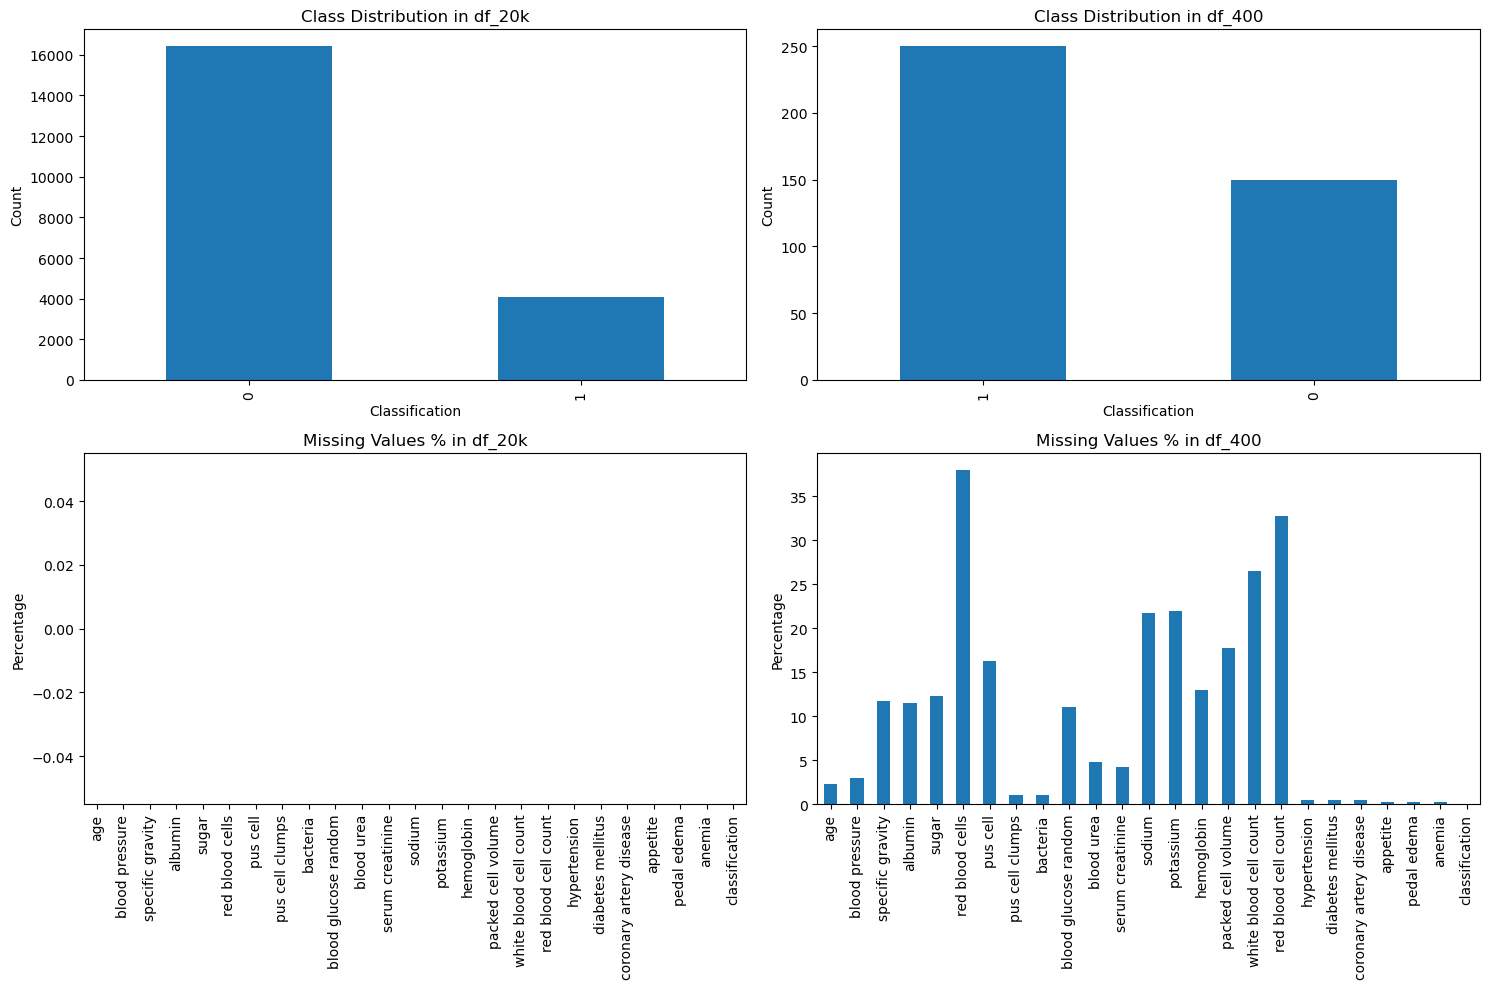

Statistical Summary Comparison for Numerical Features:

Feature: age

df_20k Statistics:
count    20538.000000
mean        47.477895
std         24.941947
min          5.000000
25%         26.000000
50%         47.000000
75%         69.000000
max         90.000000
Name: age, dtype: float64

df_400 Statistics:
count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64
--------------------------------------------------

Feature: blood pressure

df_20k Statistics:
count    20538.000000
mean       130.352079
std         29.063838
min         80.000000
25%        105.000000
50%        131.000000
75%        156.000000
max        180.000000
Name: blood pressure, dtype: float64

df_400 Statistics:
count    388.000000
mean      76.469072
std       13.683637
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: blood pr

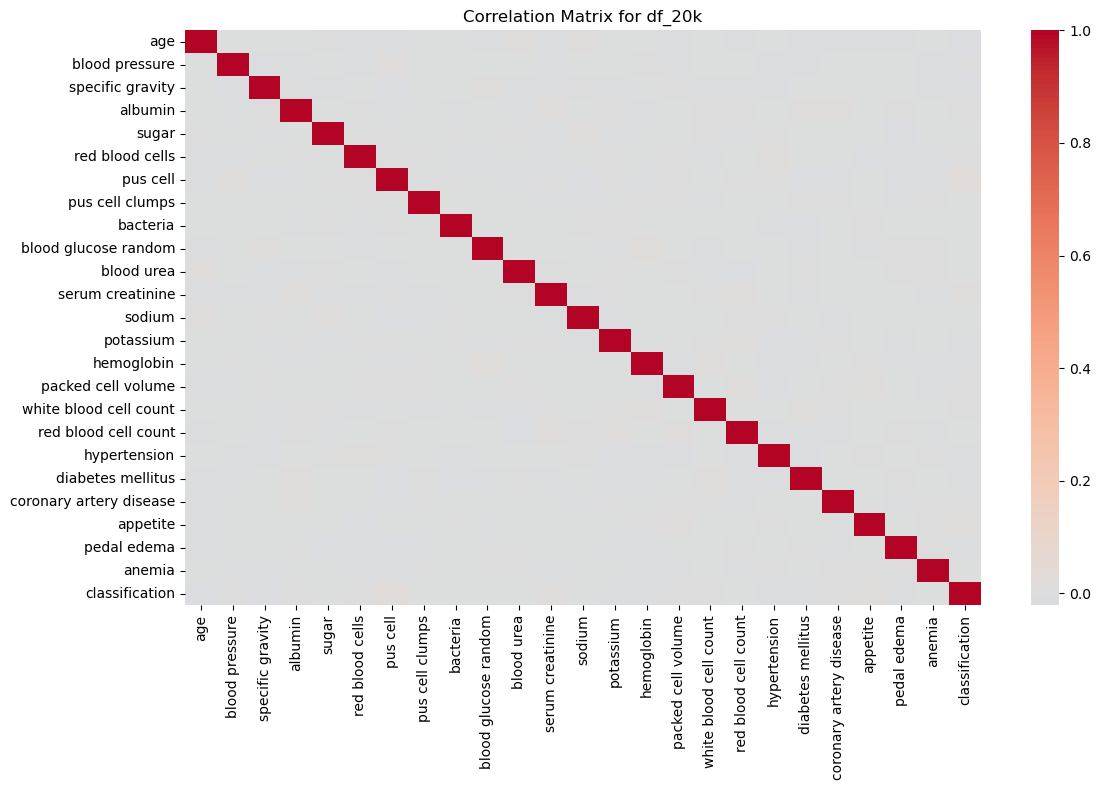


Key Findings:
1. Total samples: df_20k: 20538, df_400: 400
2. Missing values: df_20k max: 0.00%, df_400 max: 38.00%
3. Number of features: 25
4. Main differences between datasets:
   - Sample size
   - Missing value patterns
   - Data distribution


In [ ]:
import seaborn as sns

# Import required visualization libraries
import matplotlib.pyplot as plt

# Set up the figure size for plots
plt.figure(figsize=(15, 10))

# 1. Dataset Size Comparison
print("Dataset Size Comparison:")
print(f"df_20k shape: {df_20k.shape}")
print(f"df_400 shape: {df_400.shape}")
print("\n")

# 2. Compare class distribution
plt.subplot(2, 2, 1)
df_20k['classification'].value_counts().plot(kind='bar')
plt.title('Class Distribution in df_20k')
plt.xlabel('Classification')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
df_400['classification'].value_counts().plot(kind='bar')
plt.title('Class Distribution in df_400')
plt.xlabel('Classification')
plt.ylabel('Count')

# 3. Missing Values Analysis
plt.subplot(2, 2, 3)
missing_20k = (df_20k.isnull().sum() / len(df_20k)) * 100
missing_20k.plot(kind='bar')
plt.title('Missing Values % in df_20k')
plt.xticks(rotation=90)
plt.ylabel('Percentage')

plt.subplot(2, 2, 4)
missing_400 = (df_400.isnull().sum() / len(df_400)) * 100
missing_400.plot(kind='bar')
plt.title('Missing Values % in df_400')
plt.xticks(rotation=90)
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# 4. Statistical Summary Comparison
print("Statistical Summary Comparison for Numerical Features:")
numerical_cols = df_20k.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols[:5]:  # Show first 5 features as example
    print(f"\nFeature: {col}")
    print("\ndf_20k Statistics:")
    print(df_20k[col].describe())
    print("\ndf_400 Statistics:")
    print(df_400[col].describe())
    print("-"*50)

# 5. Correlation Analysis for df_20k
plt.figure(figsize=(12, 8))
sns.heatmap(df_20k.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix for df_20k')
plt.tight_layout()
plt.show()

# Print key findings
print("\nKey Findings:")
print(f"1. Total samples: df_20k: {len(df_20k)}, df_400: {len(df_400)}")
print(f"2. Missing values: df_20k max: {missing_20k.max():.2f}%, df_400 max: {missing_400.max():.2f}%")
print(f"3. Number of features: {len(df_20k.columns)}")
print("4. Main differences between datasets:")
print("   - Sample size")
print("   - Missing value patterns")
print("   - Data distribution")

In [ ]:
merged = pd.concat([df_20k, df_400])

Shape: (20938, 25)

Data types:
 float64    24
int64       1
Name: count, dtype: int64

First 5 rows:


age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  54.0           167.0             1.023      1.0    4.0              0.0   
1  42.0           127.0             1.023      3.0    2.0              0.0   
2  38.0           148.0             1.016      0.0    0.0              1.0   
3   7.0            98.0             1.017      4.0    0.0              1.0   
4  67.0           174.0             1.015      1.0    1.0              0.0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0       1.0              0.0       0.0                  96.0  ...   
1       0.0              0.0       1.0                  73.0  ...   
2       0.0              0.0       0.0                  77.0  ...   
3       0.0              0.0       1.0                 225.0  ...   
4       1.0              0.0       0.0                 376.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                35.0                  5791.0                   5.6   
1                25.0                  5390.0                   4.6   
2                46.0                 12098.0                   4.7   
3                24.0                  6747.0                   4.8   
4                46.0                  5759.0                   5.7   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0           1.0                1.0                      0.0       0.0   
1           0.0                1.0                      0.0       0.0   
2           0.0                0.0                      1.0       0.0   
3           0.0                0.0                      1.0       0.0   
4           0.0                0.0                      0.0       0.0   

   pedal edema  anemia  classification  
0          0.0     0.0               0  
1          1.0     1.0               1  
2          1.0     0.0               0  
3          0.0     1.0               0  
4          1.0     1.0               0  

[5 rows x 25 columns]


Numeric summary (describe):


count         mean          std       min  \
age                      20929.0    47.552726    24.824701     2.000   
blood pressure           20926.0   129.353006    29.754734    50.000   
specific gravity         20891.0     1.015081     0.005799     1.005   
albumin                  20892.0     2.476115     1.702618     0.000   
sugar                    20889.0     2.460242     1.712974     0.000   
red blood cells          20786.0     0.496151     0.499997     0.000   
pus cell                 20873.0     0.495856     0.499995     0.000   
pus cell clumps          20934.0     0.493933     0.499975     0.000   
bacteria                 20934.0     0.487580     0.499858     0.000   
blood glucose random     20894.0   282.302958   125.252034    22.000   
blood urea               20919.0   103.244261    55.983559     1.500   
serum creatinine         20921.0     7.695650     4.260560     0.400   
sodium                   20851.0   135.113456     8.684840     4.500   
potassium                20850.0     4.986851     0.949455     2.500   
hemoglobin               20886.0    11.967375     3.442624     3.100   
packed cell volume       20867.0    37.520822    10.394186     9.000   
white blood cell count   20832.0  9024.219134  3475.495416  2200.000   
red blood cell count     20807.0     4.250959     1.012406     2.100   
hypertension             20936.0     0.499522     0.500012     0.000   
diabetes mellitus        20936.0     0.495558     0.499992     0.000   
coronary artery disease  20936.0     0.493743     0.499973     0.000   
appetite                 20937.0     0.488895     0.499889     0.000   
pedal edema              20937.0     0.494961     0.499987     0.000   
anemia                   20937.0     0.499690     0.500012     0.000   
classification           20938.0     0.208043     0.405917     0.000   

                                 25%          50%           75%        max  
age                        26.000000    48.000000     69.000000     90.000  
blood pressure            104.000000   130.000000    155.000000    180.000  
specific gravity            1.010000     1.015000      1.020000      1.025  
albumin                     1.000000     2.000000      4.000000      5.000  
sugar                       1.000000     2.000000      4.000000      5.000  
red blood cells             0.000000     0.000000      1.000000      1.000  
pus cell                    0.000000     0.000000      1.000000      1.000  
pus cell clumps             0.000000     0.000000      1.000000      1.000  
bacteria                    0.000000     0.000000      1.000000      1.000  
blood glucose random      172.000000   281.000000    391.000000    500.000  
blood urea                 54.136971   103.005442    151.783018    391.000  
serum creatinine            4.030000     7.670000     11.380000     76.000  
sodium                    127.644044   135.142600    142.590377    163.000  
potassium                   4.219809     4.977134      5.739465     47.000  
hemoglobin                  9.000000    11.900000     14.900000     18.000  
packed cell volume         28.000000    38.000000     47.000000     55.000  
white blood cell count   6023.000000  9065.500000  12034.250000  26400.000  
red blood cell count        3.400000     4.300000      5.100000      8.000  
hypertension                0.000000     0.000000      1.000000      1.000  
diabetes mellitus           0.000000     0.000000      1.000000      1.000  
coronary artery disease     0.000000     0.000000      1.000000      1.000  
appetite                    0.000000     0.000000      1.000000      1.000  
pedal edema                 0.000000     0.000000      1.000000      1.000  
anemia                      0.000000     0.000000      1.000000      1.000  
classification              0.000000     0.000000      0.000000      1.000


Missing values (sorted):


missing_count  missing_pct
red blood cells                    152         0.73
red blood cell count               131         0.63
white blood cell count             106         0.51
potassium                           88         0.42
sodium                              87         0.42
packed cell volume                  71         0.34
pus cell                            65         0.31
hemoglobin                          52         0.25
sugar                               49         0.23
specific gravity                    47         0.22
albumin                             46         0.22
blood glucose random                44         0.21
blood urea                          19         0.09
serum creatinine                    17         0.08
blood pressure                      12         0.06
age                                  9         0.04
bacteria                             4         0.02
pus cell clumps                      4         0.02
hypertension                         2         0.01
diabetes mellitus                    2         0.01
coronary artery disease              2         0.01
appetite                             1         0.00
pedal edema                          1         0.00
anemia                               1         0.00


Target distribution (classification):


class  counts
0      0   16582
1      1    4356

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged, palette='pastel')


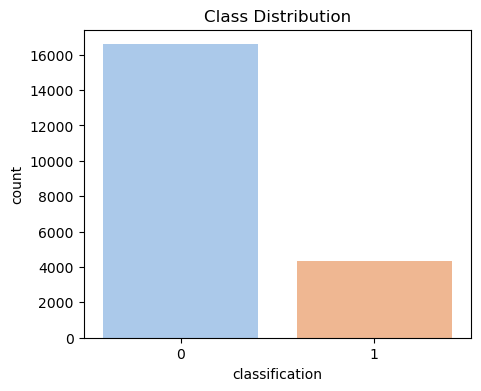


Columns with <=10 unique values (candidate categorical/binary): ['pedal edema', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'appetite', 'coronary artery disease', 'diabetes mellitus', 'anemia', 'hypertension', 'albumin', 'sugar']


ValueError: cannot reindex on an axis with duplicate labels

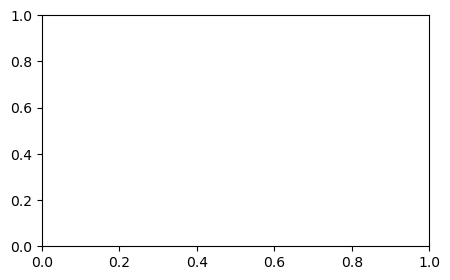

In [ ]:
# EDA for merged dataset
# Assumes `merged`, `numerical_cols`, `np`, `sns`, and `plt` are already available in the notebook

# Quick overview
print("Shape:", merged.shape)
print("\nData types:\n", merged.dtypes.value_counts())
print("\nFirst 5 rows:")
display(merged.head())

# Basic numeric summary
print("\nNumeric summary (describe):")
display(merged.describe().T)

# Missing values (count and percent)
miss = merged.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': miss, 'missing_pct': miss_percent})
print("\nMissing values (sorted):")
display(missing_df[missing_df['missing_count'] > 0])

# Target distribution
print("\nTarget distribution (classification):")
display(merged['classification'].value_counts().rename_axis('class').reset_index(name='counts'))
plt.figure(figsize=(5,4))
sns.countplot(x='classification', data=merged, palette='pastel')
plt.title('Class Distribution')
plt.show()

# Identify binary/categorical-like columns (small unique values)
nunique = merged.nunique().sort_values()
small_cardinality = nunique[nunique <= 10].index.tolist()
small_cardinality = [c for c in small_cardinality if c != 'classification']
print(f"\nColumns with <=10 unique values (candidate categorical/binary): {small_cardinality}")

# Show value counts for these columns
for col in small_cardinality:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=merged, palette='muted')
    plt.title(f"Value counts: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Binary columns detection (0/1 or two unique values)
binary_cols = []
for c in merged.columns:
    vals = merged[c].dropna().unique()
    if len(vals) == 2 and set(np.unique(vals)).issubset({0,1}):
        binary_cols.append(c)
print("\nDetected binary columns:", binary_cols)

# Correlation with target
num_cols = [c for c in numerical_cols if c in merged.columns and c != 'classification']
corr_with_target = merged[num_cols + ['classification']].corr()['classification'].abs().sort_values(ascending=False)
print("\nTop features by absolute correlation with classification:")
display(corr_with_target.head(12))

# Correlation heatmap (sampleed for speed if many rows)
plt.figure(figsize=(12,10))
corr = merged[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1, vmin=-1, linewidths=0.2)
plt.title('Correlation Matrix (numerical features)')
plt.tight_layout()
plt.show()

# Distribution plots for top correlated features
top_feats = corr_with_target.index[1:9].tolist()  # skip 'classification'
print("\nPlotting distributions for top correlated features:", top_feats)
for c in top_feats:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(merged[c].dropna(), kde=True, color='skyblue')
    plt.title(f"Histogram: {c}")
    plt.subplot(1,2,2)
    sns.boxplot(x='classification', y=c, data=merged, palette='Set2')
    plt.title(f"Boxplot by class: {c}")
    plt.tight_layout()
    plt.show()

# Histograms for numeric features (paged)
print("\nHistograms for numeric features (paged):")
cols_per_row = 4
num_only = num_cols.copy()
for i in range(0, len(num_only), cols_per_row*3):
    slice_cols = num_only[i:i + cols_per_row*3]
    n = len(slice_cols)
    rows = int(np.ceil(n/cols_per_row))
    plt.figure(figsize=(cols_per_row*4, rows*3.5))
    for j, col in enumerate(slice_cols, 1):
        plt.subplot(rows, cols_per_row, j)
        sns.histplot(merged[col].dropna(), kde=False, color='steelblue')
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Outlier detection (IQR method) - show columns with highest outlier fractions
outlier_info = {}
for c in num_cols:
    series = merged[c].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_info[c] = 0.0
        continue
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    out_frac = ((series < lower) | (series > upper)).mean()
    outlier_info[c] = out_frac

outlier_df = pd.Series(outlier_info).sort_values(ascending=False).to_frame('outlier_frac')
print("\nTop features by outlier fraction (IQR):")
display(outlier_df.head(10))

# Missingness heatmap (if any missing)
if merged.isnull().any().any():
    plt.figure(figsize=(12,4))
    sns.heatmap(merged.isnull().T, cbar=False)
    plt.title('Missingness (rows x columns)')
    plt.xlabel('row index')
    plt.ylabel('columns')
    plt.show()
else:
    print("\nNo missing values detected in merged dataset.")

# Pairwise relationships for a small set of important features
pair_feats = top_feats[:5]
if len(pair_feats) >= 2:
    print("\nPairplot for top features:", pair_feats)
    sns.pairplot(merged[pair_feats + ['classification']].dropna(), hue='classification', corner=True, plot_kws={'alpha':0.5})
    plt.show()

# Final notes
print("\nEDA complete. Use the outputs above to guide feature engineering and cleaning (imputation, encoding, scaling).")

In [ ]:
merged['classification'].value_counts()

classification
0    16582
1     4356
Name: count, dtype: int64

In [ ]:
merged.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  54.0           167.0             1.023      1.0    4.0              0.0   
1  42.0           127.0             1.023      3.0    2.0              0.0   
2  38.0           148.0             1.016      0.0    0.0              1.0   
3   7.0            98.0             1.017      4.0    0.0              1.0   
4  67.0           174.0             1.015      1.0    1.0              0.0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0       1.0              0.0       0.0                  96.0  ...   
1       0.0              0.0       1.0                  73.0  ...   
2       0.0              0.0       0.0                  77.0  ...   
3       0.0              0.0       1.0                 225.0  ...   
4       1.0              0.0       0.0                 376.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                35.0                  5791.0                   5.6   
1                25.0                  5390.0                   4.6   
2                46.0                 12098.0                   4.7   
3                24.0                  6747.0                   4.8   
4                46.0                  5759.0                   5.7   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0           1.0                1.0                      0.0       0.0   
1           0.0                1.0                      0.0       0.0   
2           0.0                0.0                      1.0       0.0   
3           0.0                0.0                      1.0       0.0   
4           0.0                0.0                      0.0       0.0   

   pedal edema  anemia  classification  
0          0.0     0.0               0  
1          1.0     1.0               1  
2          1.0     0.0               0  
3          0.0     1.0               0  
4          1.0     1.0               0  

[5 rows x 25 columns]

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20929 non-null  float64
 1   blood pressure           20926 non-null  float64
 2   specific gravity         20891 non-null  float64
 3   albumin                  20892 non-null  float64
 4   sugar                    20889 non-null  float64
 5   red blood cells          20786 non-null  float64
 6   pus cell                 20873 non-null  float64
 7   pus cell clumps          20934 non-null  float64
 8   bacteria                 20934 non-null  float64
 9   blood glucose random     20894 non-null  float64
 10  blood urea               20919 non-null  float64
 11  serum creatinine         20921 non-null  float64
 12  sodium                   20851 non-null  float64
 13  potassium                20850 non-null  float64
 14  hemoglobin               2088

In [ ]:
binary_cols = []
for col in merged.columns:
    unique_values = merged[col].dropna().unique()
    if np.array_equal(np.sort(unique_values), np.array([0.0, 1.0])):
        binary_cols.append(col)

for col in binary_cols:
    print(f"Value counts for column '{col}':")
    display(merged[col].value_counts())
    print("-" * 20)

Value counts for column 'red blood cells':


red blood cells
0.0    10473
1.0    10313
Name: count, dtype: int64

--------------------
Value counts for column 'pus cell':


pus cell
0.0    10523
1.0    10350
Name: count, dtype: int64

--------------------
Value counts for column 'pus cell clumps':


pus cell clumps
0.0    10594
1.0    10340
Name: count, dtype: int64

--------------------
Value counts for column 'bacteria':


bacteria
0.0    10727
1.0    10207
Name: count, dtype: int64

--------------------
Value counts for column 'hypertension':


hypertension
0.0    10478
1.0    10458
Name: count, dtype: int64

--------------------
Value counts for column 'diabetes mellitus':


diabetes mellitus
0.0    10561
1.0    10375
Name: count, dtype: int64

--------------------
Value counts for column 'coronary artery disease':


coronary artery disease
0.0    10599
1.0    10337
Name: count, dtype: int64

--------------------
Value counts for column 'appetite':


appetite
0.0    10701
1.0    10236
Name: count, dtype: int64

--------------------
Value counts for column 'pedal edema':


pedal edema
0.0    10574
1.0    10363
Name: count, dtype: int64

--------------------
Value counts for column 'anemia':


anemia
0.0    10475
1.0    10462
Name: count, dtype: int64

--------------------
Value counts for column 'classification':


classification
0    16582
1     4356
Name: count, dtype: int64

--------------------


In [ ]:
for col in binary_cols:
    mode_value = merged[col].mode()[0]
    merged[col] = merged[col].fillna(mode_value)

print("Null values after imputation:")
display(merged[binary_cols].isnull().sum())

Null values after imputation:


red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64

In [ ]:
numerical_cols = merged.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in binary_cols]

for col in numerical_cols:
    mean_value = merged[col].mean()
    merged[col] = merged[col].fillna(mean_value)

print("Null values after imputing numerical columns:")
display(merged[numerical_cols].isnull().sum())

Null values after imputing numerical columns:


age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [ ]:
merged.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  54.0           167.0             1.023      1.0    4.0              0.0   
1  42.0           127.0             1.023      3.0    2.0              0.0   
2  38.0           148.0             1.016      0.0    0.0              1.0   
3   7.0            98.0             1.017      4.0    0.0              1.0   
4  67.0           174.0             1.015      1.0    1.0              0.0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0       1.0              0.0       0.0                  96.0  ...   
1       0.0              0.0       1.0                  73.0  ...   
2       0.0              0.0       0.0                  77.0  ...   
3       0.0              0.0       1.0                 225.0  ...   
4       1.0              0.0       0.0                 376.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                35.0                  5791.0                   5.6   
1                25.0                  5390.0                   4.6   
2                46.0                 12098.0                   4.7   
3                24.0                  6747.0                   4.8   
4                46.0                  5759.0                   5.7   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0           1.0                1.0                      0.0       0.0   
1           0.0                1.0                      0.0       0.0   
2           0.0                0.0                      1.0       0.0   
3           0.0                0.0                      1.0       0.0   
4           0.0                0.0                      0.0       0.0   

   pedal edema  anemia  classification  
0          0.0     0.0               0  
1          1.0     1.0               1  
2          1.0     0.0               0  
3          0.0     1.0               0  
4          1.0     1.0               0  

[5 rows x 25 columns]

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20938 non-null  float64
 1   blood pressure           20938 non-null  float64
 2   specific gravity         20938 non-null  float64
 3   albumin                  20938 non-null  float64
 4   sugar                    20938 non-null  float64
 5   red blood cells          20938 non-null  float64
 6   pus cell                 20938 non-null  float64
 7   pus cell clumps          20938 non-null  float64
 8   bacteria                 20938 non-null  float64
 9   blood glucose random     20938 non-null  float64
 10  blood urea               20938 non-null  float64
 11  serum creatinine         20938 non-null  float64
 12  sodium                   20938 non-null  float64
 13  potassium                20938 non-null  float64
 14  hemoglobin               2093

In [ ]:
for col in binary_cols:
    merged[col] = merged[col].astype('int64')

print("Binary columns converted to int64:")
print(merged[binary_cols].dtypes)

Binary columns converted to int64:
red blood cells            int64
pus cell                   int64
pus cell clumps            int64
bacteria                   int64
hypertension               int64
diabetes mellitus          int64
coronary artery disease    int64
appetite                   int64
pedal edema                int64
anemia                     int64
classification             int64
dtype: object


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20938 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      20938 non-null  float64
 1   blood pressure           20938 non-null  float64
 2   specific gravity         20938 non-null  float64
 3   albumin                  20938 non-null  float64
 4   sugar                    20938 non-null  float64
 5   red blood cells          20938 non-null  int64  
 6   pus cell                 20938 non-null  int64  
 7   pus cell clumps          20938 non-null  int64  
 8   bacteria                 20938 non-null  int64  
 9   blood glucose random     20938 non-null  float64
 10  blood urea               20938 non-null  float64
 11  serum creatinine         20938 non-null  float64
 12  sodium                   20938 non-null  float64
 13  potassium                20938 non-null  float64
 14  hemoglobin               2093

Shape: (20938, 25)

Data types:
 float64    14
int64      11
Name: count, dtype: int64

First 5 rows:


age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  54.0           167.0             1.023      1.0    4.0                0   
1  42.0           127.0             1.023      3.0    2.0                0   
2  38.0           148.0             1.016      0.0    0.0                1   
3   7.0            98.0             1.017      4.0    0.0                1   
4  67.0           174.0             1.015      1.0    1.0                0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0         1                0         0                  96.0  ...   
1         0                0         1                  73.0  ...   
2         0                0         0                  77.0  ...   
3         0                0         1                 225.0  ...   
4         1                0         0                 376.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                35.0                  5791.0                   5.6   
1                25.0                  5390.0                   4.6   
2                46.0                 12098.0                   4.7   
3                24.0                  6747.0                   4.8   
4                46.0                  5759.0                   5.7   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             1                  1                        0         0   
1             0                  1                        0         0   
2             0                  0                        1         0   
3             0                  0                        1         0   
4             0                  0                        0         0   

   pedal edema  anemia  classification  
0            0       0               0  
1            1       1               1  
2            1       0               0  
3            0       1               0  
4            1       1               0  

[5 rows x 25 columns]


Numeric summary (describe):


count         mean          std       min  \
age                      20938.0    47.552726    24.819365     2.000   
blood pressure           20938.0   129.353006    29.746206    50.000   
specific gravity         20938.0     1.015081     0.005793     1.005   
albumin                  20938.0     2.476115     1.700746     0.000   
sugar                    20938.0     2.460242     1.710968     0.000   
red blood cells          20938.0     0.492549     0.499956     0.000   
pus cell                 20938.0     0.494317     0.499980     0.000   
pus cell clumps          20938.0     0.493839     0.499974     0.000   
bacteria                 20938.0     0.487487     0.499855     0.000   
blood glucose random     20938.0   282.302958   125.120353    22.000   
blood urea               20938.0   103.244261    55.958151     1.500   
serum creatinine         20938.0     7.695650     4.258830     0.400   
sodium                   20938.0   135.113456     8.666777     4.500   
potassium                20938.0     4.986851     0.947457     2.500   
hemoglobin               20938.0    11.967375     3.438347     3.100   
packed cell volume       20938.0    37.520822    10.376547     9.000   
white blood cell count   20938.0  9024.219134  3466.686370  2200.000   
red blood cell count     20938.0     4.250959     1.009234     2.100   
hypertension             20938.0     0.499475     0.500012     0.000   
diabetes mellitus        20938.0     0.495511     0.499992     0.000   
coronary artery disease  20938.0     0.493696     0.499972     0.000   
appetite                 20938.0     0.488872     0.499888     0.000   
pedal edema              20938.0     0.494937     0.499986     0.000   
anemia                   20938.0     0.499666     0.500012     0.000   
classification           20938.0     0.208043     0.405917     0.000   

                                 25%          50%           75%        max  
age                        26.000000    47.552726     69.000000     90.000  
blood pressure            104.000000   130.000000    155.000000    180.000  
specific gravity            1.010000     1.015000      1.020000      1.025  
albumin                     1.000000     2.000000      4.000000      5.000  
sugar                       1.000000     2.000000      4.000000      5.000  
red blood cells             0.000000     0.000000      1.000000      1.000  
pus cell                    0.000000     0.000000      1.000000      1.000  
pus cell clumps             0.000000     0.000000      1.000000      1.000  
bacteria                    0.000000     0.000000      1.000000      1.000  
blood glucose random      172.000000   282.000000    391.000000    500.000  
blood urea                 54.177566   103.050866    151.762303    391.000  
serum creatinine            4.030000     7.670000     11.370000     76.000  
sodium                    127.679184   135.113456    142.556380    163.000  
potassium                   4.224741     4.983727      5.736191     47.000  
hemoglobin                  9.000000    11.967375     14.900000     18.000  
packed cell volume         28.000000    38.000000     47.000000     55.000  
white blood cell count   6036.000000  9028.000000  12020.750000  26400.000  
red blood cell count        3.400000     4.250959      5.100000      8.000  
hypertension                0.000000     0.000000      1.000000      1.000  
diabetes mellitus           0.000000     0.000000      1.000000      1.000  
coronary artery disease     0.000000     0.000000      1.000000      1.000  
appetite                    0.000000     0.000000      1.000000      1.000  
pedal edema                 0.000000     0.000000      1.000000      1.000  
anemia                      0.000000     0.000000      1.000000      1.000  
classification              0.000000     0.000000      0.000000      1.000


Missing values (sorted):


Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []


Target distribution (classification):


class  counts
0      0   16582
1      1    4356

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged, palette='pastel')


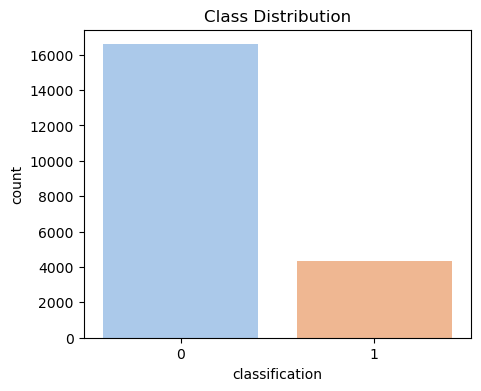


Columns with <=10 unique values (candidate categorical/binary): ['pedal edema', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'appetite', 'coronary artery disease', 'diabetes mellitus', 'anemia', 'hypertension', 'albumin', 'sugar']


C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


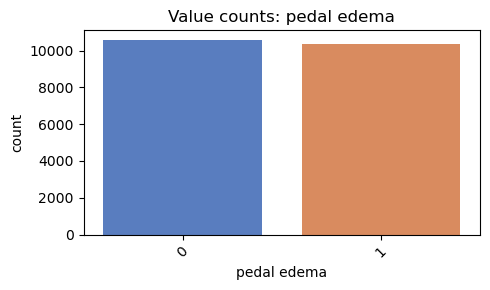

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


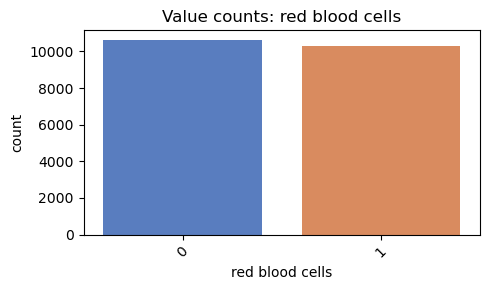

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


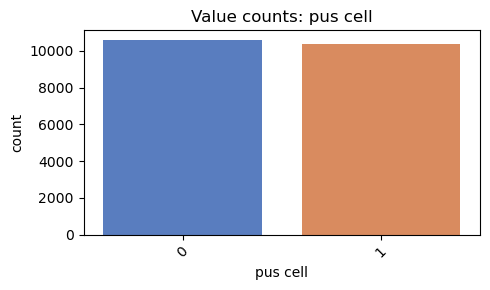

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


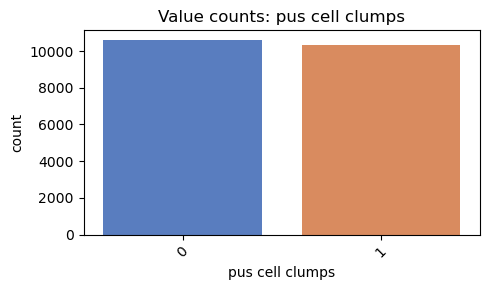

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


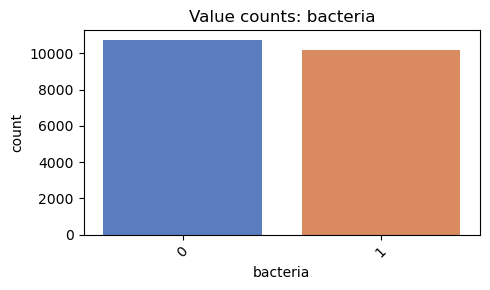

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


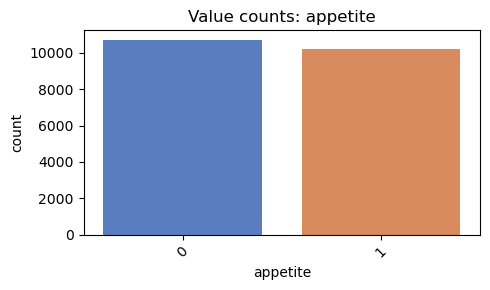

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


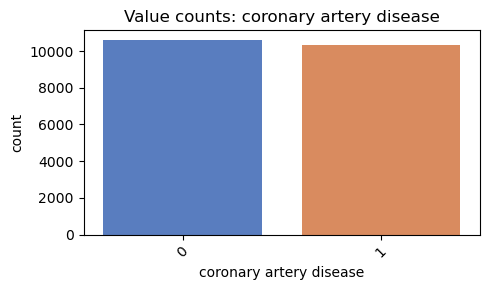

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


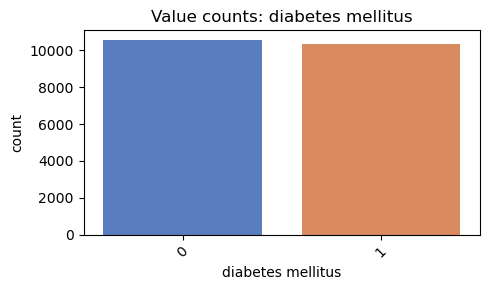

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


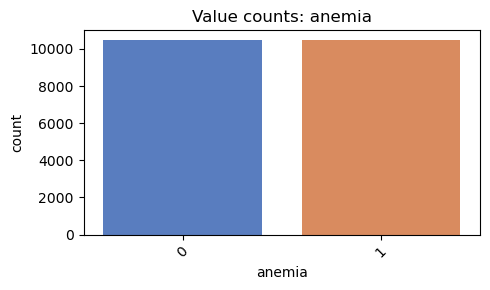

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


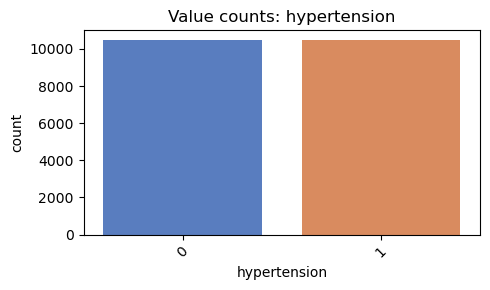

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


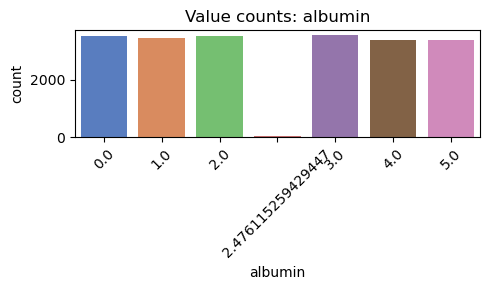

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=merged, palette='muted')


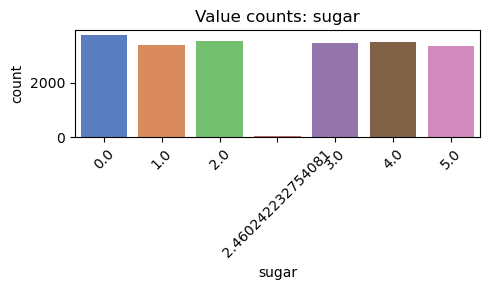


Detected binary columns: ['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'classification']

Top features by absolute correlation with classification:


classification            1.000000
specific gravity          0.023817
blood pressure            0.022955
hemoglobin                0.020724
blood glucose random      0.014252
sugar                     0.014068
blood urea                0.009910
white blood cell count    0.009297
age                       0.008056
red blood cell count      0.006536
albumin                   0.006058
packed cell volume        0.004647
Name: classification, dtype: float64

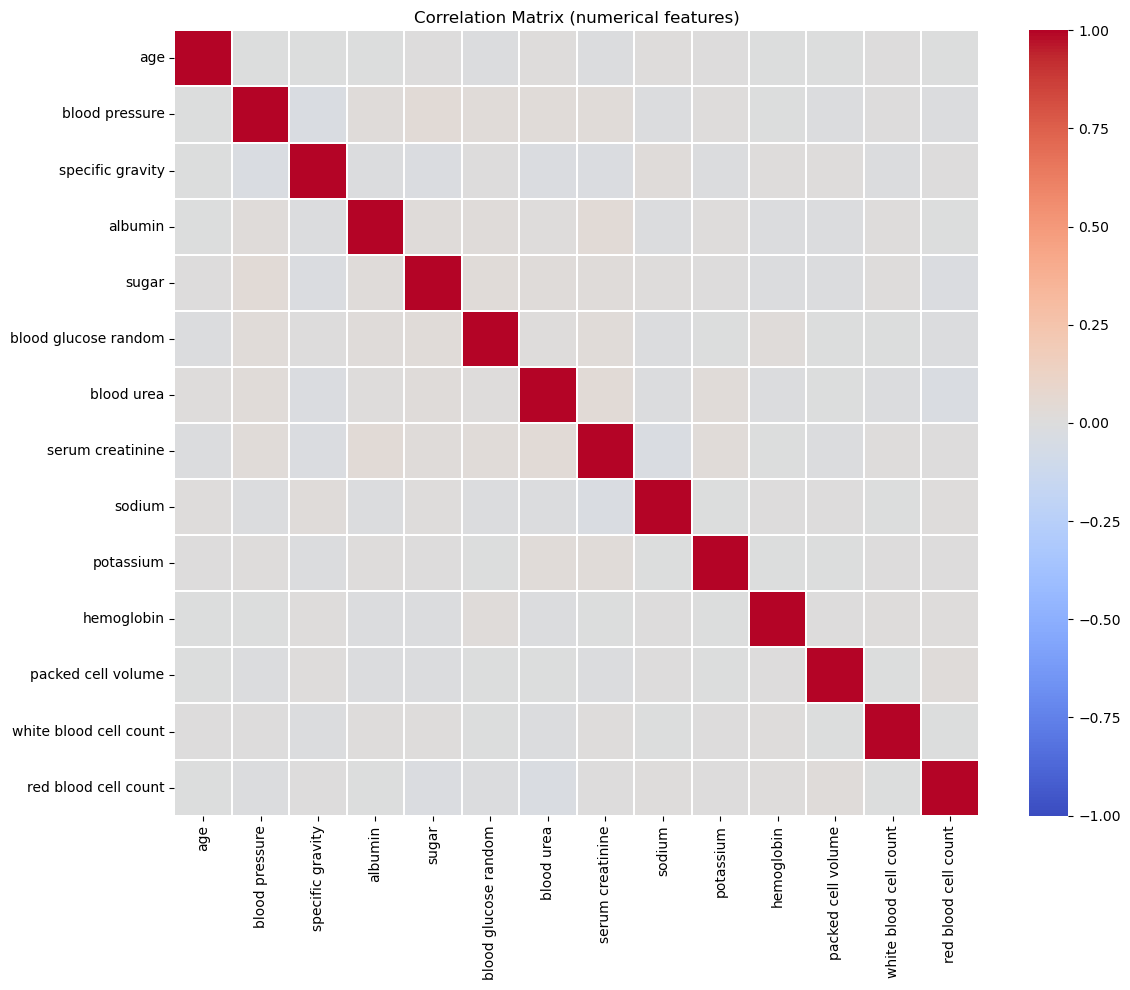


Plotting distributions for top correlated features: ['specific gravity', 'blood pressure', 'hemoglobin', 'blood glucose random', 'sugar', 'blood urea', 'white blood cell count', 'age']


C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


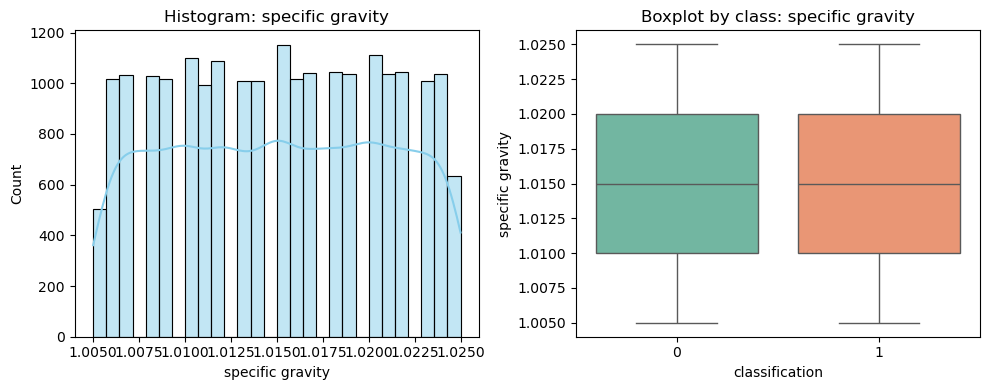

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


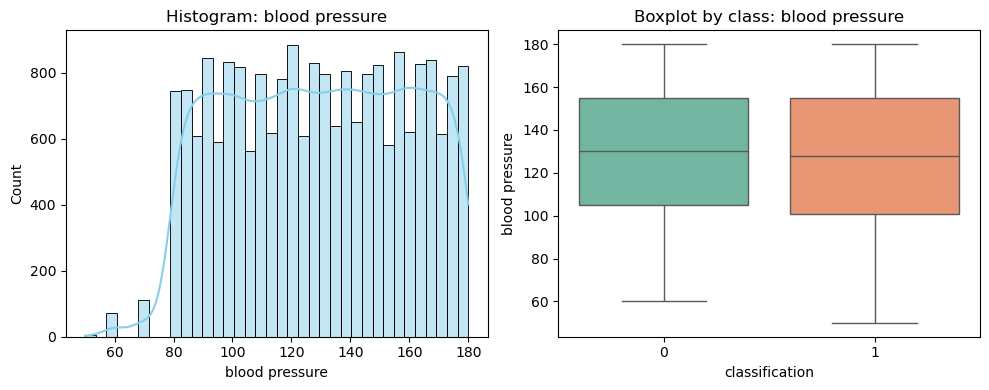

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


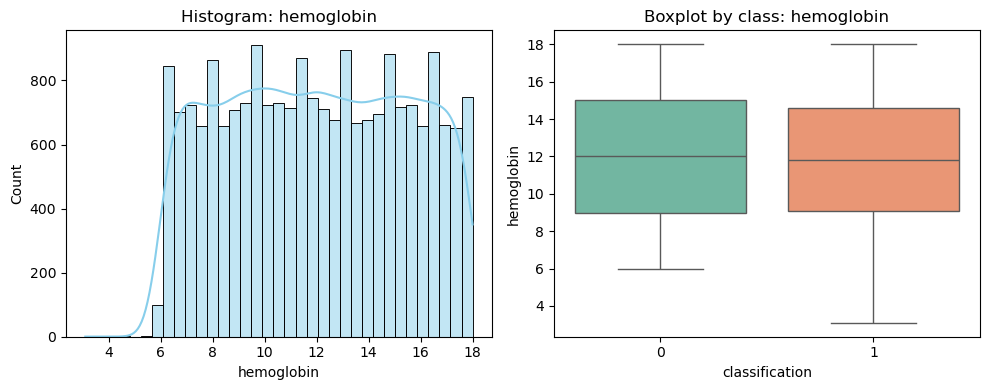

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


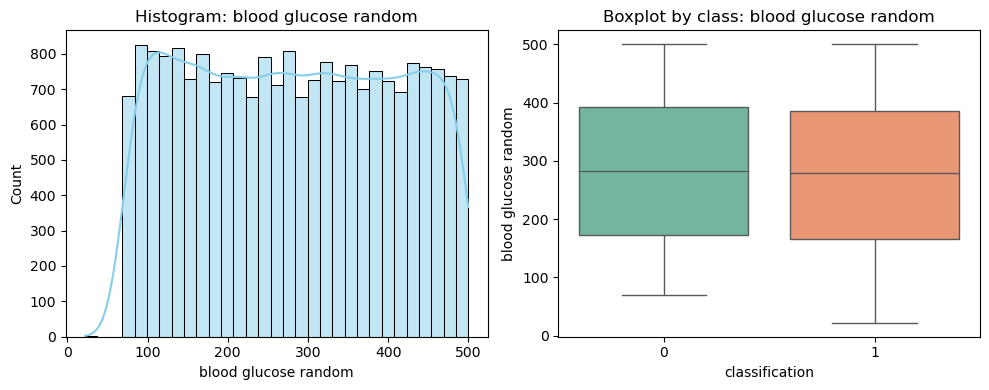

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


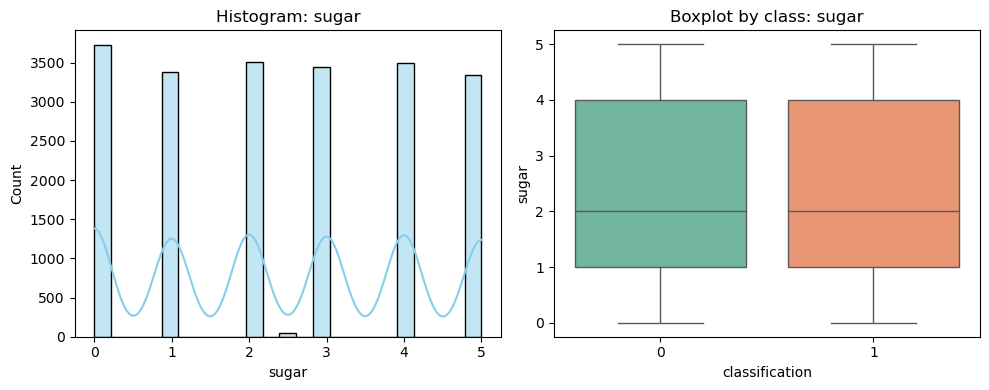

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


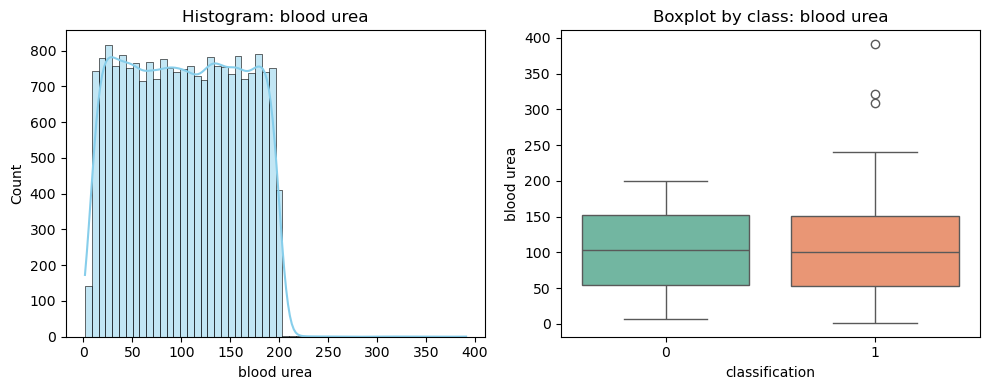

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


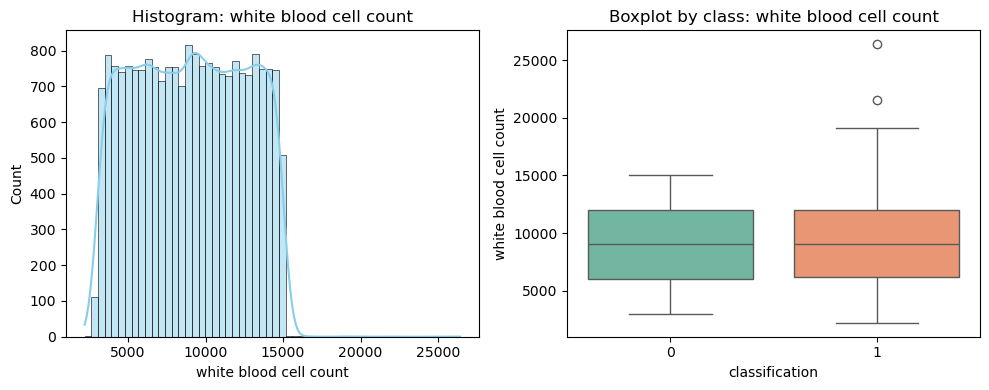

C:\Users\User\AppData\Local\Temp\ipykernel_19560\1070083834.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y=c, data=merged, palette='Set2')


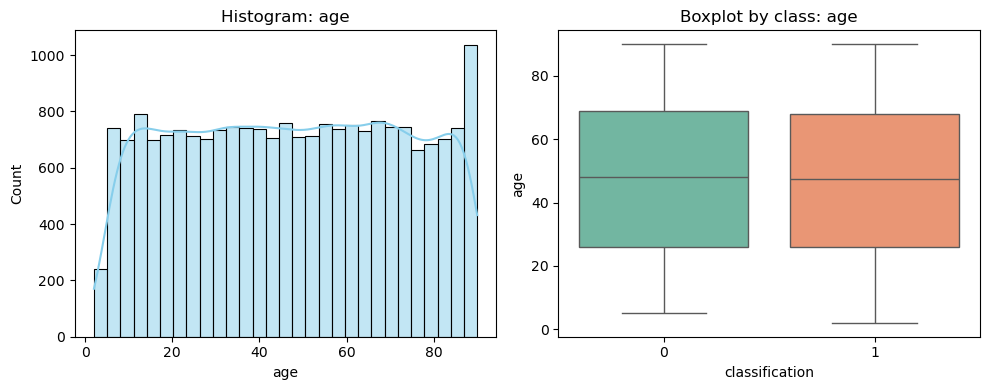


Histograms for numeric features (paged):


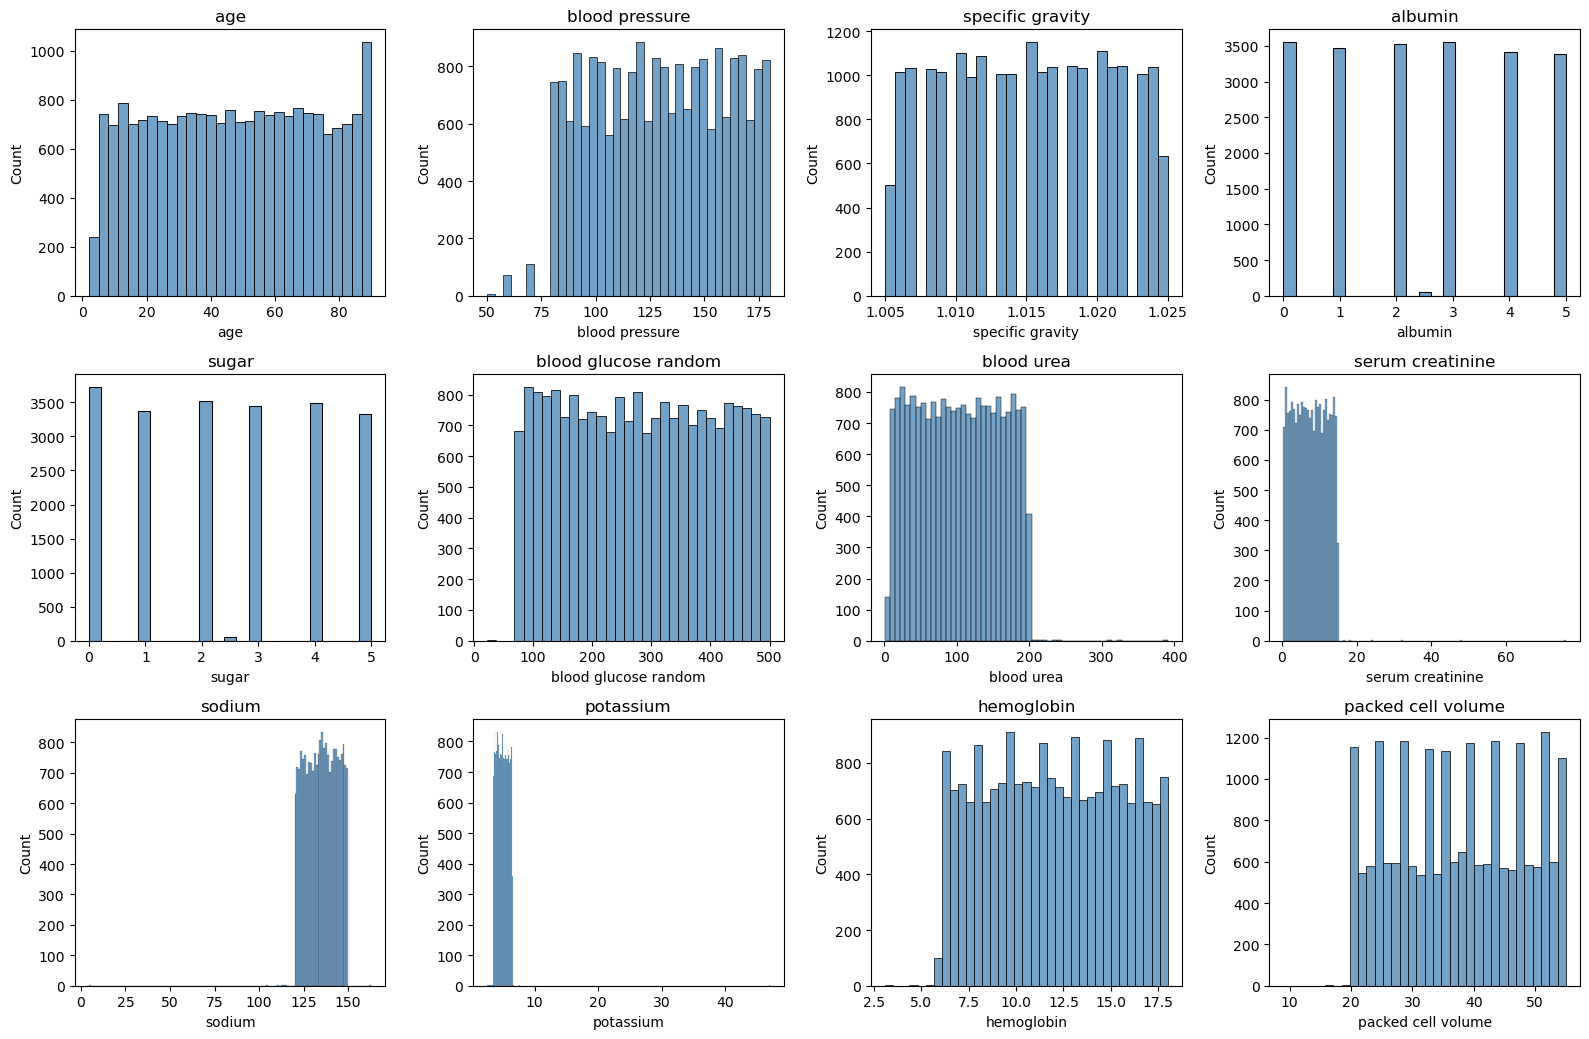

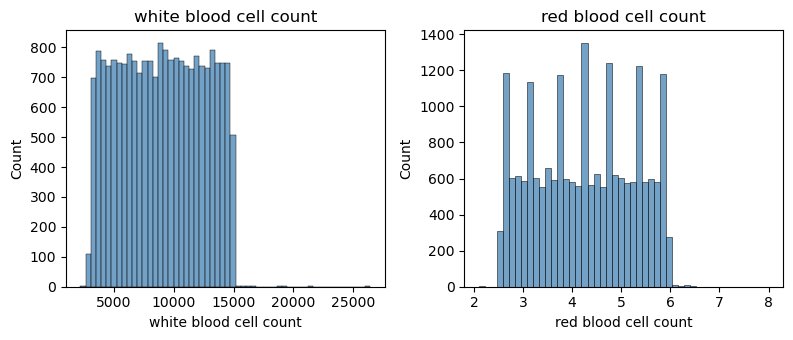


Top features by outlier fraction (IQR):


outlier_frac
serum creatinine            0.000191
blood urea                  0.000143
sodium                      0.000096
potassium                   0.000096
white blood cell count      0.000096
red blood cell count        0.000048
age                         0.000000
blood pressure              0.000000
specific gravity            0.000000
albumin                     0.000000


No missing values detected in merged dataset.

Pairplot for top features: ['specific gravity', 'blood pressure', 'hemoglobin', 'blood glucose random', 'sugar']


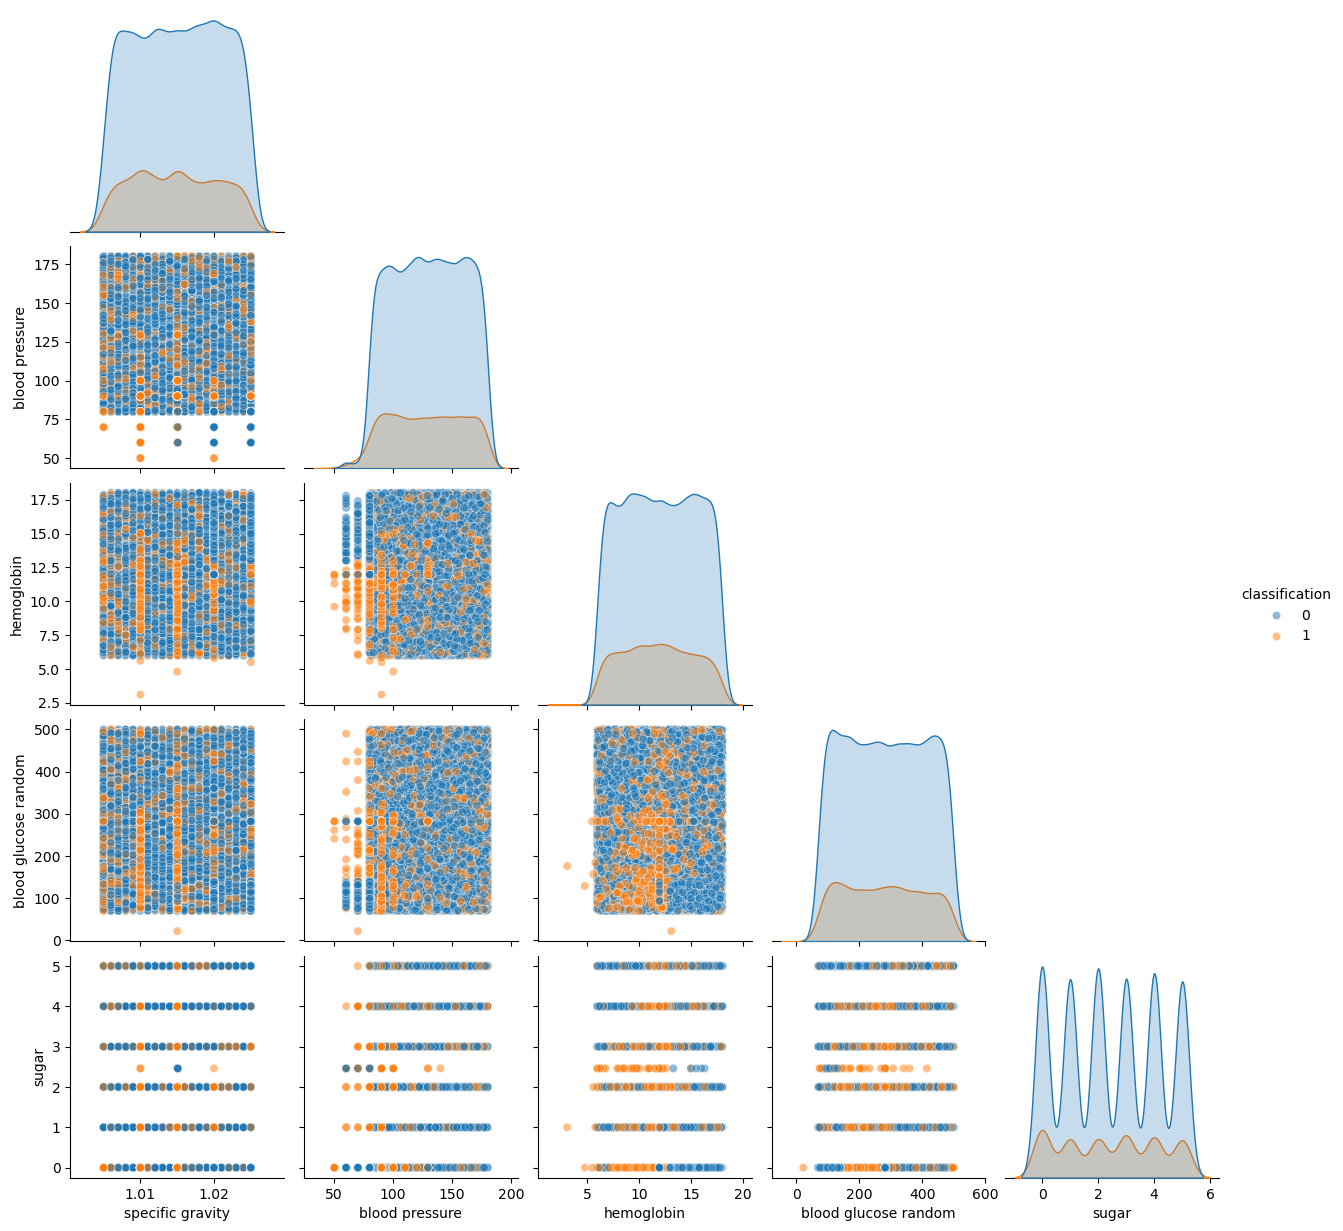


EDA complete. Use the outputs above to guide feature engineering and cleaning (imputation, encoding, scaling).


In [ ]:
# EDA for merged dataset
# Assumes `merged`, `numerical_cols`, `np`, `sns`, and `plt` are already available in the notebook

# Quick overview
print("Shape:", merged.shape)
print("\nData types:\n", merged.dtypes.value_counts())
print("\nFirst 5 rows:")
display(merged.head())

# Basic numeric summary
print("\nNumeric summary (describe):")
display(merged.describe().T)

# Missing values (count and percent)
miss = merged.isnull().sum().sort_values(ascending=False)
miss_percent = (miss / len(merged) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': miss, 'missing_pct': miss_percent})
print("\nMissing values (sorted):")
display(missing_df[missing_df['missing_count'] > 0])

# Target distribution
print("\nTarget distribution (classification):")
display(merged['classification'].value_counts().rename_axis('class').reset_index(name='counts'))
plt.figure(figsize=(5,4))
sns.countplot(x='classification', data=merged, palette='pastel')
plt.title('Class Distribution')
plt.show()

# Identify binary/categorical-like columns (small unique values)
nunique = merged.nunique().sort_values()
small_cardinality = nunique[nunique <= 10].index.tolist()
small_cardinality = [c for c in small_cardinality if c != 'classification']
print(f"\nColumns with <=10 unique values (candidate categorical/binary): {small_cardinality}")

# Show value counts for these columns
for col in small_cardinality:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=merged, palette='muted')
    plt.title(f"Value counts: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Binary columns detection (0/1 or two unique values)
binary_cols = []
for c in merged.columns:
    vals = merged[c].dropna().unique()
    if len(vals) == 2 and set(np.unique(vals)).issubset({0,1}):
        binary_cols.append(c)
print("\nDetected binary columns:", binary_cols)

# Correlation with target
num_cols = [c for c in numerical_cols if c in merged.columns and c != 'classification']
corr_with_target = merged[num_cols + ['classification']].corr()['classification'].abs().sort_values(ascending=False)
print("\nTop features by absolute correlation with classification:")
display(corr_with_target.head(12))

# Correlation heatmap (sampleed for speed if many rows)
plt.figure(figsize=(12,10))
corr = merged[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, vmax=1, vmin=-1, linewidths=0.2)
plt.title('Correlation Matrix (numerical features)')
plt.tight_layout()
plt.show()

# Distribution plots for top correlated features
top_feats = corr_with_target.index[1:9].tolist()  # skip 'classification'
print("\nPlotting distributions for top correlated features:", top_feats)
for c in top_feats:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(merged[c].dropna(), kde=True, color='skyblue')
    plt.title(f"Histogram: {c}")
    plt.subplot(1,2,2)
    sns.boxplot(x='classification', y=c, data=merged, palette='Set2')
    plt.title(f"Boxplot by class: {c}")
    plt.tight_layout()
    plt.show()

# Histograms for numeric features (paged)
print("\nHistograms for numeric features (paged):")
cols_per_row = 4
num_only = num_cols.copy()
for i in range(0, len(num_only), cols_per_row*3):
    slice_cols = num_only[i:i + cols_per_row*3]
    n = len(slice_cols)
    rows = int(np.ceil(n/cols_per_row))
    plt.figure(figsize=(cols_per_row*4, rows*3.5))
    for j, col in enumerate(slice_cols, 1):
        plt.subplot(rows, cols_per_row, j)
        sns.histplot(merged[col].dropna(), kde=False, color='steelblue')
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Outlier detection (IQR method) - show columns with highest outlier fractions
outlier_info = {}
for c in num_cols:
    series = merged[c].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:
        outlier_info[c] = 0.0
        continue
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    out_frac = ((series < lower) | (series > upper)).mean()
    outlier_info[c] = out_frac

outlier_df = pd.Series(outlier_info).sort_values(ascending=False).to_frame('outlier_frac')
print("\nTop features by outlier fraction (IQR):")
display(outlier_df.head(10))

# Missingness heatmap (if any missing)
if merged.isnull().any().any():
    plt.figure(figsize=(12,4))
    sns.heatmap(merged.isnull().T, cbar=False)
    plt.title('Missingness (rows x columns)')
    plt.xlabel('row index')
    plt.ylabel('columns')
    plt.show()
else:
    print("\nNo missing values detected in merged dataset.")

# Pairwise relationships for a small set of important features
pair_feats = top_feats[:5]
if len(pair_feats) >= 2:
    print("\nPairplot for top features:", pair_feats)
    sns.pairplot(merged[pair_feats + ['classification']].dropna(), hue='classification', corner=True, plot_kws={'alpha':0.5})
    plt.show()

# Final notes
print("\nEDA complete. Use the outputs above to guide feature engineering and cleaning (imputation, encoding, scaling).")

# Work Start

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
file_link = "https://drive.google.com/file/d/1InWoda-GWlyozroaVWzsj8rKuFg2bmeZ/view?usp=drive_link"
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df_20k = pd.read_csv(new_link)
df = df_20k.copy()

In [ ]:
# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Traditional ML

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")  # Uncomment when you load the actual dataset

# Selected Features
selected_features = ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random',
                     'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume',
                     'white blood cell count', 'red blood cell count']

# Drop non-informative columns and select the 12 features
df_cleaned = df[selected_features + ['classification']]  # Keep only selected features and target
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary with models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Loop over the models
for model_name, model in models.items():
    print(f"Training and Evaluating {model_name}...\n")

    # Train the model
    model.fit(X_train_res_scaled, y_train_res)

    # Predict on test data
    y_pred = model.predict(X_test_scaled)

    # Print model evaluation metrics
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 80)


Training and Evaluating Random Forest...

Random Forest Accuracy: 0.7956064947468959
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      3317
           1       0.61      0.05      0.09       871

    accuracy                           0.80      4188
   macro avg       0.71      0.52      0.49      4188
weighted avg       0.76      0.80      0.72      4188

--------------------------------------------------------------------------------
Training and Evaluating SVM...

SVM Accuracy: 0.6327602674307545
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      3317
           1       0.22      0.29      0.25       871

    accuracy                           0.63      4188
   macro avg       0.51      0.51      0.50      4188
weighted avg       0.68      0.63      0.65      4188

-------------------------------------------------

# RF selector

Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
ROC AUC: 0.8723305110943813
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87      3345
           1       0.97      0.72      0.82      3288

    accuracy                           0.85      6633
   macro avg       0.87      0.85      0.84      6633
weighted avg       0.87      0.85      0.84      6633



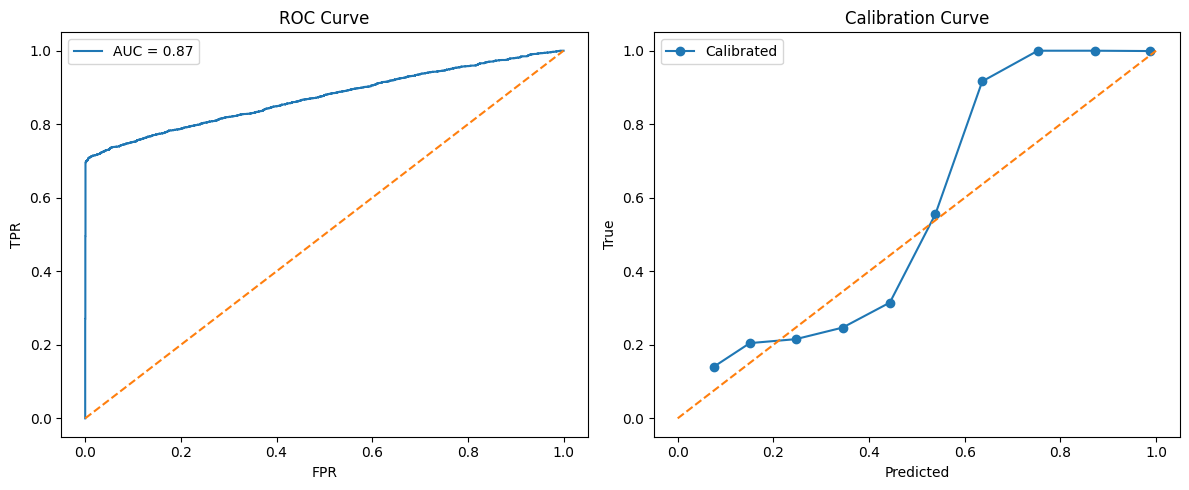

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

# Base models
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)


# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features:", selected_features)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

# Calibration
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()

plt.tight_layout()
plt.show()

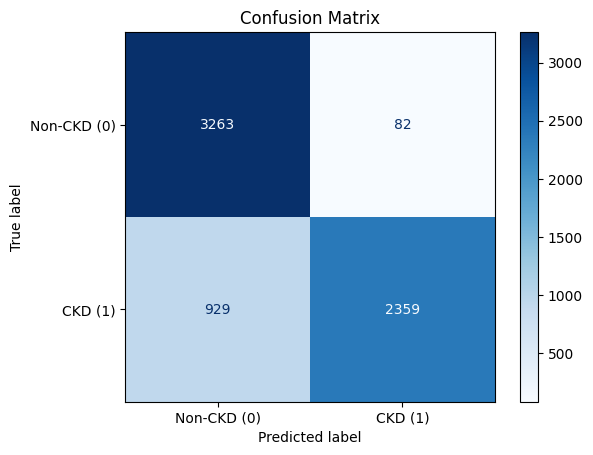

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = ensemble.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-CKD (0)", "CKD (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Forward Feature selection

Starting Forward Feature Selection...
Selected Features: [17]
Current Best ROC AUC: 0.8531
Selected Features: [17, 11]
Current Best ROC AUC: 0.8592
No improvement - stopping feature selection

FINAL RESULTS
Selected Features (indices): [17, 11]
Best ROC AUC (from Forward Selection): 0.8592186926050793
Final ROC AUC: 0.8590443938914529
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84      3345
           1       0.90      0.74      0.81      3288

    accuracy                           0.83      6633
   macro avg       0.84      0.83      0.83      6633
weighted avg       0.84      0.83      0.83      6633



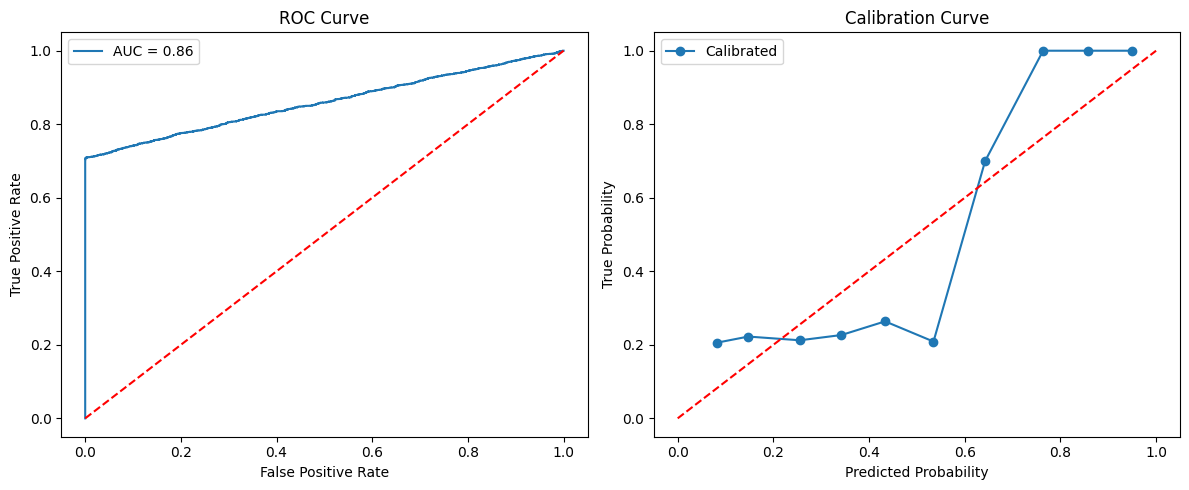

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data FIRST, then split (important for proper scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# IMPROVED Base models with better parameters
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# FIXED MLP with better convergence parameters
mlp = MLPClassifier(
    random_state=42,
    max_iter=2000,  # Increased iterations
    learning_rate_init=0.01,  # Slightly higher learning rate
    alpha=0.001,  # Regularization
    early_stopping=True,  # Stop if no improvement
    n_iter_no_change=50,  # Stop after 50 iterations without improvement
    tol=1e-4,
    hidden_layer_sizes=(100, 50),  # Better architecture
    solver='adam'
)

gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Function for Forward Feature Selection
def forward_feature_selection(X_train, X_test, y_train, y_test, base_models, scoring_metric=roc_auc_score):
    selected_features = []
    remaining_features = list(range(X_train.shape[1]))  # Use column indices since we have numpy arrays

    # Convert to DataFrame for column selection
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)

    best_score = 0

    while remaining_features:
        scores = []
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            X_train_temp = X_train_df.iloc[:, temp_features]
            X_test_temp = X_test_df.iloc[:, temp_features]

            # Train the stacking model with error handling
            try:
                ensemble = StackingClassifier(
                    estimators=[('lr', base_models[0]), ('mlp', base_models[1]), ('gb', base_models[2])],
                    final_estimator=LogisticRegression(max_iter=1000),
                    cv=3  # Reduced for speed
                )
                ensemble.fit(X_train_temp, y_train)
                y_probs = ensemble.predict_proba(X_test_temp)[:, 1]

                # Calculate the performance score
                score = scoring_metric(y_test, y_probs)
                scores.append((score, feature))
            except Exception as e:
                # Skip features that cause errors
                print(f"Error with feature {feature}: {e}")
                scores.append((0, feature))
                continue

        if not scores:
            break

        # Select the best feature
        scores.sort(reverse=True, key=lambda x: x[0])
        best_score_current, best_feature = scores[0]

        # Check if adding this feature improves performance
        if len(selected_features) == 0 or best_score_current > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_score_current

            print(f"Selected Features: {selected_features}")
            print(f"Current Best ROC AUC: {best_score:.4f}")
        else:
            # Stop if no improvement
            print("No improvement - stopping feature selection")
            break

    return selected_features, best_score

# Perform Forward Feature Selection
print("Starting Forward Feature Selection...")
selected_features, best_score = forward_feature_selection(X_train, X_test, y_train, y_test, [logreg, mlp, gb])

# Train final model using selected features
X_train_selected = X_train[:, selected_features]  # Use numpy indexing
X_test_selected = X_test[:, selected_features]

# IMPROVED Stacking Ensemble with better parameters
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)
y_probs = ensemble.predict_proba(X_test_selected)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=3)  # Reduced for speed
calibrated_model.fit(X_train_selected, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print("Selected Features (indices):", selected_features)
print("Best ROC AUC (from Forward Selection):", best_score)
print("Final ROC AUC:", roc_auc)
print("Classification Report:\n", report)
report = classification_report(y_test, y_pred)
# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Get the actual feature names from your original dataset
feature_names = list(df_cleaned.drop(columns=["classification"]).columns)

# Convert selected feature indices to actual feature names
selected_feature_names = [feature_names[i] for i in selected_features]

print("\n" + "="*60)
print("SELECTED FEATURE ANALYSIS")
print("="*60)
print(f"Number of selected features: {len(selected_feature_names)}")
print(f"Selected feature indices: {selected_features}")
print(f"Selected feature names: {selected_feature_names}")

# Print each feature name with its index
print("\nDetailed feature mapping:")
for i, feature_idx in enumerate(selected_features):
    print(f"  Index {feature_idx}: {feature_names[feature_idx]}")

# Calculate how many features were selected vs total available
total_features = len(feature_names)
print(f"\nFeature selection summary:")
print(f"Total available features: {total_features}")
print(f"Features selected: {len(selected_feature_names)}")
print(f"Features removed: {total_features - len(selected_feature_names)}")
print(f"Reduction: {((total_features - len(selected_feature_names)) / total_features * 100):.1f}%")

# If you want to see all available features for comparison
print(f"\nAll available features ({total_features} total):")
for i, feature in enumerate(feature_names):
    selected_status = "SELECTED" if i in selected_features else "not selected"
    print(f"  {i:2d}: {feature:30} [{selected_status}]")


SELECTED FEATURE ANALYSIS
Number of selected features: 2
Selected feature indices: [17, 11]
Selected feature names: ['red blood cell count', 'serum creatinine']

Detailed feature mapping:
  Index 17: red blood cell count
  Index 11: serum creatinine

Feature selection summary:
Total available features: 24
Features selected: 2
Features removed: 22
Reduction: 91.7%

All available features (24 total):
   0: age                            [not selected]
   1: blood pressure                 [not selected]
   2: specific gravity               [not selected]
   3: albumin                        [not selected]
   4: sugar                          [not selected]
   5: red blood cells                [not selected]
   6: pus cell                       [not selected]
   7: pus cell clumps                [not selected]
   8: bacteria                       [not selected]
   9: blood glucose random           [not selected]
  10: blood urea                     [not selected]
  11: serum creatinine   

# Backward feature selection

Starting Backward Feature Selection, limiting to 12 features...

Baseline AUC with all 24 features: 0.9155

Testing removal of 'diabetes mellitus'...
  AUC without 'diabetes mellitus': 0.9079
✓ Removed 'diabetes mellitus' (no significant drop)

Testing removal of 'hypertension'...
  AUC without 'hypertension': 0.9158
🎯 NEW BEST: AUC = 0.9158 with 22 features

Testing removal of 'red blood cells'...
  AUC without 'red blood cells': 0.9141
✓ Removed 'red blood cells' (no significant drop)

Testing removal of 'pus cell clumps'...
  AUC without 'pus cell clumps': 0.9075
✓ Removed 'pus cell clumps' (no significant drop)

Testing removal of 'coronary artery disease'...
  AUC without 'coronary artery disease': 0.9065
✓ Removed 'coronary artery disease' (no significant drop)

Testing removal of 'appetite'...
  AUC without 'appetite': 0.9026
✓ Removed 'appetite' (no significant drop)

Testing removal of 'bacteria'...
  AUC without 'bacteria': 0.9033
✓ Removed 'bacteria' (no significant drop)

T

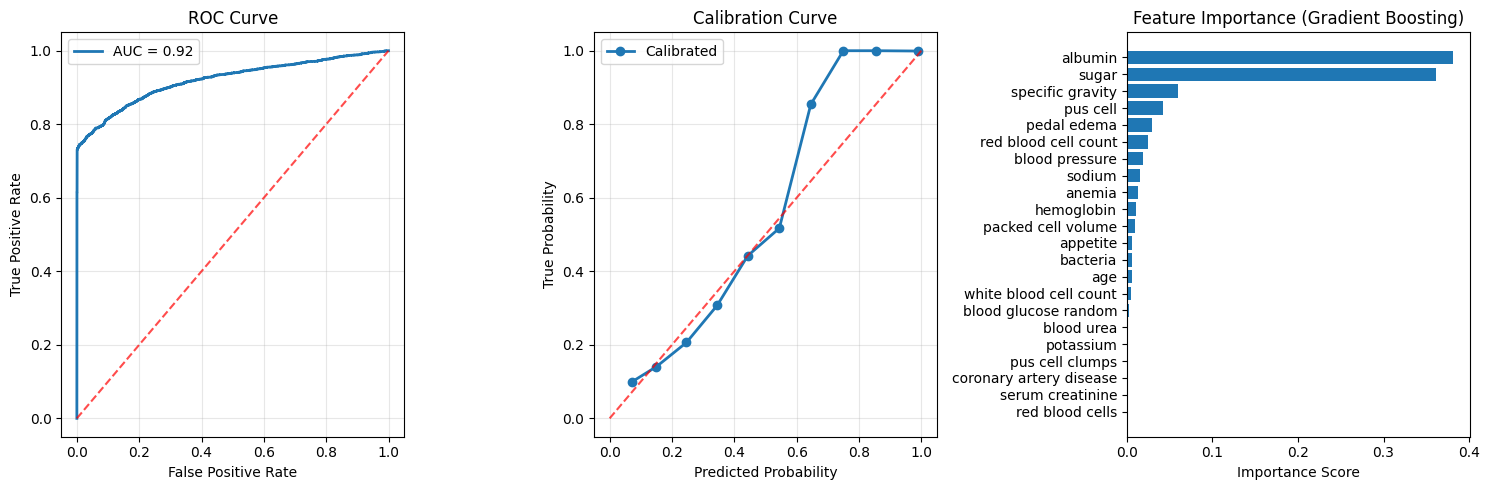


FEATURE IMPORTANCE IN FINAL MODEL
albumin: 0.3816
sugar: 0.3619
specific gravity: 0.0598
pus cell: 0.0421
pedal edema: 0.0295
red blood cell count: 0.0246
blood pressure: 0.0184
sodium: 0.0157
anemia: 0.0135
hemoglobin: 0.0105
packed cell volume: 0.0095
appetite: 0.0064
bacteria: 0.0059
age: 0.0056
white blood cell count: 0.0050
blood glucose random: 0.0025
blood urea: 0.0019
potassium: 0.0018
pus cell clumps: 0.0014
coronary artery disease: 0.0012
serum creatinine: 0.0011
red blood cells: 0.0000

 Final selected features: ['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar', 'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'blood urea', 'serum creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia']
 Most important feature: albumin


In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Store feature names for later use
feature_names = X.columns.tolist()

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Convert back to DataFrame to preserve feature names
X_smote_df = pd.DataFrame(X_smote, columns=feature_names)

# Backward Feature Selection (Limited to Top 12 Features)
def backward_feature_selection(X_train, X_test, y_train, y_test, base_models, feature_names, target_feature_count=12):
    print(f"Starting Backward Feature Selection, limiting to {target_feature_count} features...")

    # Step 1: Use Random Forest to rank features by importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importance and sort from most to least important
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    # Start with all features
    selected_features = feature_names.copy()
    best_score = 0
    best_feature_set = selected_features.copy()

    # Get baseline performance with all features
    ensemble = StackingClassifier(
        estimators=[('lr', base_models[0]), ('mlp', base_models[1]), ('gb', base_models[2])],
        final_estimator=LogisticRegression(max_iter=500),
        cv=5
    )
    ensemble.fit(X_train[selected_features], y_train)
    y_probs = ensemble.predict_proba(X_test[selected_features])[:, 1]
    baseline_score = roc_auc_score(y_test, y_probs)
    best_score = baseline_score

    print(f"\nBaseline AUC with all {len(selected_features)} features: {baseline_score:.4f}")

    # Step 2: Remove features in order of least importance until we reach 12 features
    removal_order = importance_df['feature'].tolist()

    while len(selected_features) > target_feature_count:
        feature_to_remove = removal_order[-1]  # Least important feature
        removal_order = removal_order[:-1]  # Remove it from the removal list

        if feature_to_remove not in selected_features:
            continue

        temp_features = [f for f in selected_features if f != feature_to_remove]

        print(f"\nTesting removal of '{feature_to_remove}'...")

        # Use faster ensemble with reduced CV
        try:
            ensemble = StackingClassifier(
                estimators=[('lr', base_models[0]), ('mlp', base_models[1]), ('gb', base_models[2])],
                final_estimator=LogisticRegression(max_iter=500),
                cv=2  # Reduced CV folds
            )
            ensemble.fit(X_train[temp_features], y_train)
            y_probs = ensemble.predict_proba(X_test[temp_features])[:, 1]
            current_score = roc_auc_score(y_test, y_probs)

            print(f"  AUC without '{feature_to_remove}': {current_score:.4f}")

            # If performance doesn't drop significantly, remove the feature
            if current_score >= best_score - 0.02:  # Allow small degradation
                selected_features = temp_features
                if current_score > best_score:
                    best_score = current_score
                    best_feature_set = temp_features.copy()
                    print(f"🎯 NEW BEST: AUC = {best_score:.4f} with {len(best_feature_set)} features")
                else:
                    print(f"✓ Removed '{feature_to_remove}' (no significant drop)")

            else:
                print(f"✗ Kept '{feature_to_remove}' (performance would drop)")

        except Exception as e:
            print(f"✗ Error with '{feature_to_remove}': {str(e)[:50]}...")
            continue

    return best_feature_set, best_score

# Run Backward Feature Selection with limit of 12 features
selected_features, best_score = backward_feature_selection(
    X_train_df, X_test_df, y_train, y_test,
    [logreg, mlp, gb], feature_names, target_feature_count=12
)

# Convert selected features back to numpy arrays for final training
X_train_selected = X_train_df[selected_features].values
X_test_selected = X_test_df[selected_features].values

# FINAL MODEL with selected features
print("\n" + "="*60)
print("TRAINING FINAL MODEL")
print("="*60)

# Use slightly better parameters for final model
final_mlp = MLPClassifier(
    random_state=42,
    max_iter=1000,
    learning_rate_init=0.01,
    early_stopping=True,
    n_iter_no_change=20,
    hidden_layer_sizes=(100, 50)
)

final_gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', final_mlp), ('gb', final_gb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)
y_probs = ensemble.predict_proba(X_test_selected)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=3)
calibrated_model.fit(X_train_selected, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Best ROC AUC (from Feature Selection): {best_score:.4f}")
print(f"Final ROC AUC: {roc_auc:.4f}")
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")
print("\nClassification Report:\n", report)

# Feature importance from Gradient Boosting model for visualization
gb_single = GradientBoostingClassifier(random_state=42, n_estimators=50)
gb_single.fit(X_train_selected, y_train)

feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': gb_single.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance Ranking:")
for i, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.3)

# Calibration Curve
plt.subplot(1, 3, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance Plot - FIXED: Use the fitted individual model
plt.subplot(1, 3, 3)
feature_imp_values = gb_single.feature_importances_
sorted_idx = np.argsort(feature_imp_values)
plt.barh(range(len(selected_features)), feature_imp_values[sorted_idx])
plt.yticks(range(len(selected_features)), [selected_features[i] for i in sorted_idx])
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()

plt.show()

# Print feature importance values
print("\n" + "="*50)
print("FEATURE IMPORTANCE IN FINAL MODEL")
print("="*50)
for i in sorted_idx[::-1]:  # Print from most important to least
    print(f"{selected_features[i]}: {feature_imp_values[i]:.4f}")

print(f"\n Final selected features: {selected_features}")
print(f" Most important feature: {selected_features[sorted_idx[-1]]}")


# ULTRA FAST BACKWARD Feature Selection

METHOD 2: Ultra-Fast Feature Selection
Starting ULTRA-FAST Feature Selection using Random Forest...
Top features by importance:
  albumin: 0.0955
  sugar: 0.0898
  sodium: 0.0581
  specific gravity: 0.0579
  red blood cell count: 0.0558
  blood pressure: 0.0558
  white blood cell count: 0.0545
  hemoglobin: 0.0545
  potassium: 0.0530
  blood urea: 0.0526
  Top 5 features: AUC = 0.8568
  Top 8 features: AUC = 0.8609
  Top 10 features: AUC = 0.8645
  Top 12 features: AUC = 0.8669
  Top 15 features: AUC = 0.8709

TRAINING FINAL MODEL

FINAL RESULTS
Best ROC AUC (from Feature Selection): 0.8709
Final ROC AUC: 0.9071
Number of selected features: 15
Selected features: ['albumin', 'sugar', 'sodium', 'specific gravity', 'red blood cell count', 'blood pressure', 'white blood cell count', 'hemoglobin', 'potassium', 'blood urea', 'blood glucose random', 'packed cell volume', 'age', 'serum creatinine', 'pus cell']

Classification Report:
               precision    recall  f1-score   support

    

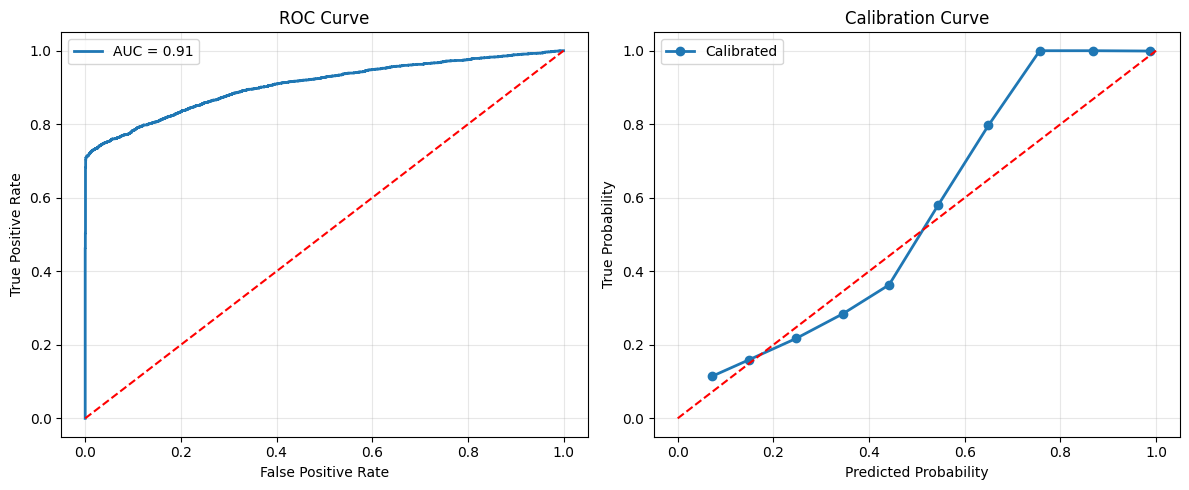


✅ Best feature names: ['albumin', 'sugar', 'sodium', 'specific gravity', 'red blood cell count', 'blood pressure', 'white blood cell count', 'hemoglobin', 'potassium', 'blood urea', 'blood glucose random', 'packed cell volume', 'age', 'serum creatinine', 'pus cell']
🏆 Most important feature: albumin


In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Store feature names for later use
feature_names = list(X.columns)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Convert back to DataFrames with proper feature names for feature selection
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# IMPROVED Base models - LIGHTER versions
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=500)

# LIGHTER MLP for faster training
mlp = MLPClassifier(
    random_state=42,
    max_iter=500,  # Reduced from 2000
    learning_rate_init=0.01,
    early_stopping=True,
    n_iter_no_change=10,  # Reduced
    tol=1e-3,  # Increased tolerance for faster convergence
    hidden_layer_sizes=(50, 25),  # Smaller network
    alpha=0.01
)

gb = GradientBoostingClassifier(random_state=42, n_estimators=50, max_depth=3)  # Reduced trees

# OPTIMIZED Backward Feature Selection - MUCH FASTER
def fast_backward_feature_selection(X_train, X_test, y_train, y_test, base_models, feature_names):
    print("Starting FAST Backward Feature Selection...")

    # Step 1: Use Random Forest to rank features by importance first
    rf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=5)
    rf.fit(X_train, y_train)

    # Get feature importance and sort from least to most important
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance')

    print("Features ranked by importance (least to most important):")
    for i, row in importance_df.iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

    # Start with all features
    selected_features = feature_names.copy()
    best_score = 0
    best_feature_set = selected_features.copy()

    # Get baseline performance with all features
    ensemble = StackingClassifier(
        estimators=[('lr', base_models[0]), ('mlp', base_models[1]), ('gb', base_models[2])],
        final_estimator=LogisticRegression(max_iter=500),
        cv=2  # Reduced CV folds
    )
    ensemble.fit(X_train[selected_features], y_train)
    y_probs = ensemble.predict_proba(X_test[selected_features])[:, 1]
    baseline_score = roc_auc_score(y_test, y_probs)
    best_score = baseline_score

    print(f"\nBaseline AUC with all {len(selected_features)} features: {baseline_score:.4f}")

    # Step 2: Remove features in order of least importance
    removal_order = importance_df['feature'].tolist()

    for i, feature_to_remove in enumerate(removal_order):
        if len(selected_features) <= 5:  # Stop when we have few features
            break

        if feature_to_remove not in selected_features:
            continue

        temp_features = [f for f in selected_features if f != feature_to_remove]

        print(f"\nTesting removal of '{feature_to_remove}' ({i+1}/{len(removal_order)})...")

        try:
            # Use faster ensemble with reduced CV
            ensemble = StackingClassifier(
                estimators=[('lr', base_models[0]), ('mlp', base_models[1]), ('gb', base_models[2])],
                final_estimator=LogisticRegression(max_iter=500),
                cv=2  # Reduced CV
            )
            ensemble.fit(X_train[temp_features], y_train)
            y_probs = ensemble.predict_proba(X_test[temp_features])[:, 1]
            current_score = roc_auc_score(y_test, y_probs)

            print(f"  AUC without '{feature_to_remove}': {current_score:.4f}")

            # If performance doesn't drop significantly, remove the feature
            if current_score >= best_score - 0.02:  # Allow small degradation
                selected_features = temp_features
                if current_score > best_score:
                    best_score = current_score
                    best_feature_set = temp_features.copy()
                    print(f"🎯 NEW BEST: AUC = {best_score:.4f} with {len(best_feature_set)} features")
                else:
                    print(f"✓ Removed '{feature_to_remove}' (no significant drop)")
            else:
                print(f"✗ Kept '{feature_to_remove}' (performance would drop)")

        except Exception as e:
            print(f"✗ Error with '{feature_to_remove}': {str(e)[:50]}...")
            continue

    return best_feature_set, best_score

# Alternative: FAST Feature Selection using only Random Forest (even faster)
def ultra_fast_feature_selection(X_train, X_test, y_train, y_test, feature_names, target_features=8):
    print("Starting ULTRA-FAST Feature Selection using Random Forest...")

    # Use Random Forest for feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Get top features
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top features by importance:")
    for i, row in importance_df.head(10).iterrows():
        print(f"  {row['feature']}: {row['importance']:.4f}")

    # Test different numbers of top features
    best_score = 0
    best_features = []

    # Test only a few feature set sizes for speed
    test_sizes = [5, 8, 10, 12, 15]
    test_sizes = [n for n in test_sizes if n <= len(feature_names)]

    for n_features in test_sizes:
        top_features = importance_df.head(n_features)['feature'].tolist()

        # Quick ensemble
        ensemble = StackingClassifier(
            estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
            final_estimator=LogisticRegression(max_iter=500),
            cv=3
        )
        ensemble.fit(X_train[top_features], y_train)
        y_probs = ensemble.predict_proba(X_test[top_features])[:, 1]
        current_score = roc_auc_score(y_test, y_probs)

        print(f"  Top {n_features} features: AUC = {current_score:.4f}")

        if current_score > best_score:
            best_score = current_score
            best_features = top_features

    return best_features, best_score

# CHOOSE ONE METHOD:

# Method 1: Fast Backward Selection (recommended)
# print("=" * 60)
# print("METHOD 1: Fast Backward Feature Selection")
# print("=" * 60)
# selected_features, best_score = fast_backward_feature_selection(
#     X_train_df, X_test_df, y_train, y_test,
#     [logreg, mlp, gb], feature_names
# )

# # Method 2: Ultra-Fast Selection (even faster)
print("=" * 60)
print("METHOD 2: Ultra-Fast Feature Selection")
print("=" * 60)
selected_features, best_score = ultra_fast_feature_selection(
    X_train_df, X_test_df, y_train, y_test, feature_names
)

# Convert selected features back to numpy arrays for final training
X_train_selected = X_train_df[selected_features].values
X_test_selected = X_test_df[selected_features].values

# FINAL MODEL with selected features
print("\n" + "="*60)
print("TRAINING FINAL MODEL")
print("="*60)

# Use slightly better parameters for final model
final_mlp = MLPClassifier(
    random_state=42,
    max_iter=1000,
    learning_rate_init=0.01,
    early_stopping=True,
    n_iter_no_change=20,
    hidden_layer_sizes=(100, 50)
)

final_gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', final_mlp), ('gb', final_gb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

ensemble.fit(X_train_selected, y_train)
y_pred = ensemble.predict(X_test_selected)
y_probs = ensemble.predict_proba(X_test_selected)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=3)
calibrated_model.fit(X_train_selected, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test_selected)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
print(f"Best ROC AUC (from Feature Selection): {best_score:.4f}")
print(f"Final ROC AUC: {roc_auc:.4f}")
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")
print("\nClassification Report:\n", report)

# Feature importance
gb_single = GradientBoostingClassifier(random_state=42, n_estimators=50)
gb_single.fit(X_train_selected, y_train)

feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': gb_single.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance Ranking:")
for i, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Best feature names: {selected_features}")
print(f"🏆 Most important feature: {feature_importance.iloc[0]['feature']}")

# PCA + RFE

Selected Features (after PCA + RFE): ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
ROC AUC: 0.693570495964853
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      3345
           1       0.63      0.63      0.63      3288

    accuracy                           0.63      6633
   macro avg       0.63      0.63      0.63      6633
weighted avg       0.63      0.63      0.63      6633



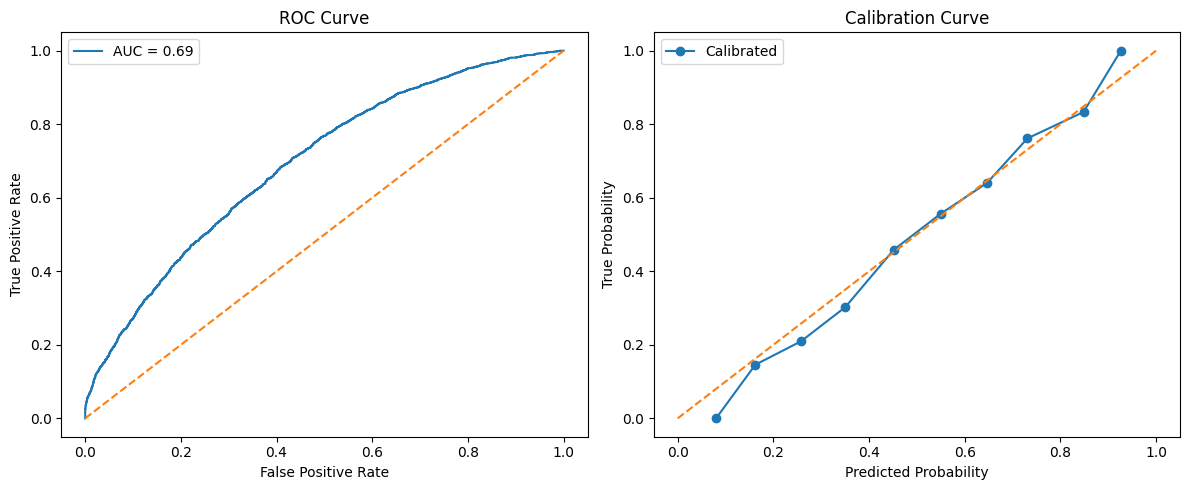

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_smote)

# Perform RFE with Logistic Regression (or any classifier) to select top 12 features
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
rfe = RFE(estimator=logreg, n_features_to_select=12)  # Selecting top 12 features
X_rfe = rfe.fit_transform(X_pca, y_smote)

# Get the names of the selected features after RFE
selected_features = [f"PC{i+1}" for i in range(X_rfe.shape[1])]  # Naming the selected features

# Train-test split with selected features from RFE
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_smote, test_size=0.2, random_state=42)

# Base models for stacking
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Selected Features (after PCA + RFE):", selected_features)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


# ONLY RFE_CV

Optimal number of features selected by RFE-CV: 12
Selected features: ['blood pressure', 'specific gravity', 'sugar', 'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'hemoglobin', 'red blood cell count', 'appetite', 'pedal edema', 'anemia']


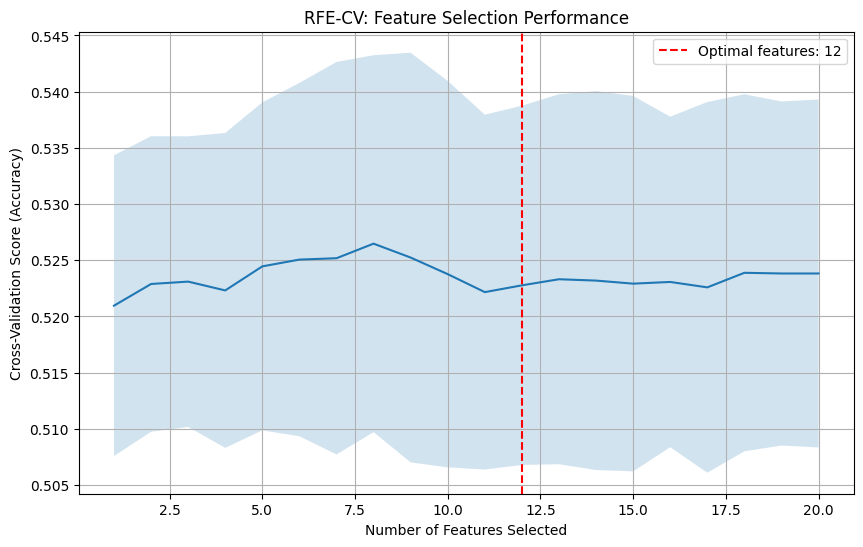

Optimal number of features selected by RFE-CV: 12
Selected Features: ['blood pressure', 'specific gravity', 'sugar', 'pus cell', 'pus cell clumps', 'bacteria', 'blood glucose random', 'hemoglobin', 'red blood cell count', 'appetite', 'pedal edema', 'anemia']
ROC AUC: 0.872470259202281
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      3345
           1       0.95      0.73      0.82      3288

    accuracy                           0.85      6633
   macro avg       0.87      0.84      0.84      6633
weighted avg       0.86      0.85      0.84      6633



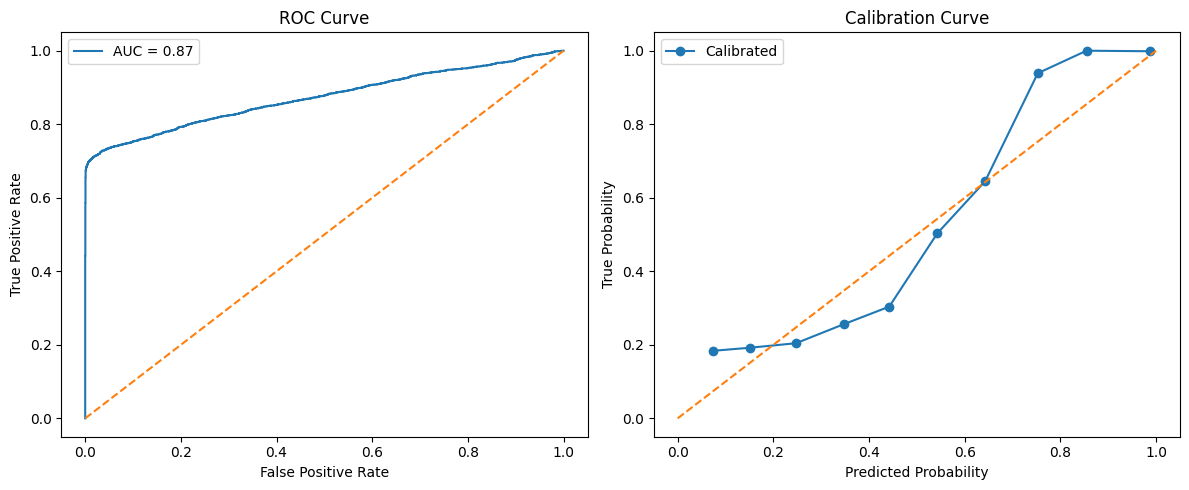


Feature ranking from RFE-CV (1 = selected):
                    Feature  Rank  Selected
1            blood pressure     1      True
2          specific gravity     1      True
6                  pus cell     1      True
4                     sugar     1      True
7           pus cell clumps     1      True
14               hemoglobin     1      True
9      blood glucose random     1      True
8                  bacteria     1      True
21                 appetite     1      True
22              pedal edema     1      True
23                   anemia     1      True
17     red blood cell count     1      True
20  coronary artery disease     2     False
3                   albumin     3     False
13                potassium     4     False
16   white blood cell count     5     False
0                       age     6     False
18             hypertension     7     False
5           red blood cells     8     False
10               blood urea     9     False
19        diabetes mellitus    

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Perform RFE-CV directly on the original features (no PCA)
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
rfe_cv = RFECV(
    estimator=logreg,
    min_features_to_select=5,  # Minimum number of features to keep
    step=1,  # Number of features to remove at each iteration
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all available cores
)

# Fit RFE-CV and transform the data
X_rfe_cv = rfe_cv.fit_transform(X_smote, y_smote)

# Get the optimal number of features and selected features
optimal_features = rfe_cv.n_features_
selected_features_mask = rfe_cv.support_
selected_features = X.columns[selected_features_mask].tolist()

print(f"Optimal number of features selected by RFE-CV: {optimal_features}")
print(f"Selected features: {selected_features}")

# Plot RFE-CV results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfe_cv.cv_results_['mean_test_score']) + 1), rfe_cv.cv_results_['mean_test_score'])
plt.fill_between(
    range(1, len(rfe_cv.cv_results_['mean_test_score']) + 1),
    rfe_cv.cv_results_['mean_test_score'] - rfe_cv.cv_results_['std_test_score'],
    rfe_cv.cv_results_['mean_test_score'] + rfe_cv.cv_results_['std_test_score'],
    alpha=0.2
)
plt.axvline(x=optimal_features, color='r', linestyle='--', label=f'Optimal features: {optimal_features}')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (Accuracy)')
plt.title('RFE-CV: Feature Selection Performance')
plt.legend()
plt.grid(True)
plt.show()

# Train-test split with selected features from RFE-CV
X_train, X_test, y_train, y_test = train_test_split(X_rfe_cv, y_smote, test_size=0.2, random_state=42)

# Base models for stacking
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Optimal number of features selected by RFE-CV:", optimal_features)
print("Selected Features:", selected_features)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()

# Additional: Feature ranking from RFE-CV
print("\nFeature ranking from RFE-CV (1 = selected):")
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe_cv.ranking_,
    'Selected': rfe_cv.support_
}).sort_values('Rank')
print(feature_ranking)


CONFUSION MATRIX METRICS
True Positives (TP): 2529
True Negatives (TN): 3168
False Positives (FP): 177
False Negatives (FN): 759
Accuracy: 0.8589
Precision: 0.9346
Recall (Sensitivity): 0.7692
Specificity: 0.9471
F1-Score: 0.8438

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3345
           1       0.93      0.77      0.84      3288

    accuracy                           0.86      6633
   macro avg       0.87      0.86      0.86      6633
weighted avg       0.87      0.86      0.86      6633



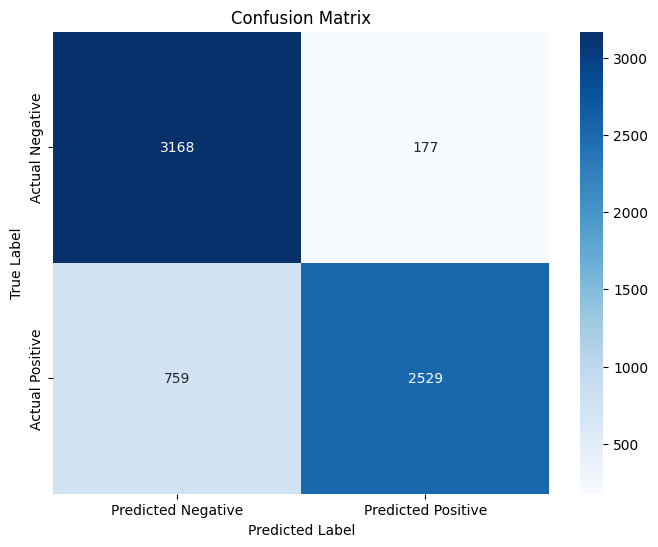

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print confusion matrix metrics
print("\n" + "="*50)
print("CONFUSION MATRIX METRICS")
print("="*50)
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")






# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ranking Algorithm and Information Gain (IG)

Top 12 Features Selected (Based on Random Forest Importance):
1. albumin: 0.1002
2. sugar: 0.0877
3. specific gravity: 0.0596
4. sodium: 0.0580
5. blood pressure: 0.0557
6. red blood cell count: 0.0542
7. white blood cell count: 0.0538
8. hemoglobin: 0.0531
9. packed cell volume: 0.0528
10. potassium: 0.0513
11. blood glucose random: 0.0513
12. blood urea: 0.0511

Top 12 Features Selected (Based on Information Gain):
1. age: 0.3500
2. blood pressure: 0.3496
3. hemoglobin: 0.3493
4. packed cell volume: 0.3424
5. red blood cell count: 0.3414
6. blood glucose random: 0.3236
7. specific gravity: 0.3218
8. serum creatinine: 0.2475
9. albumin: 0.2345
10. sugar: 0.2220
11. anemia: 0.0456
12. bacteria: 0.0436

Training shape: (26531, 12)
Test shape: (6633, 12)

Training ensemble model...
Calibrating model...

FINAL RESULTS
ROC AUC: 0.8951
Number of features used: 12

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      

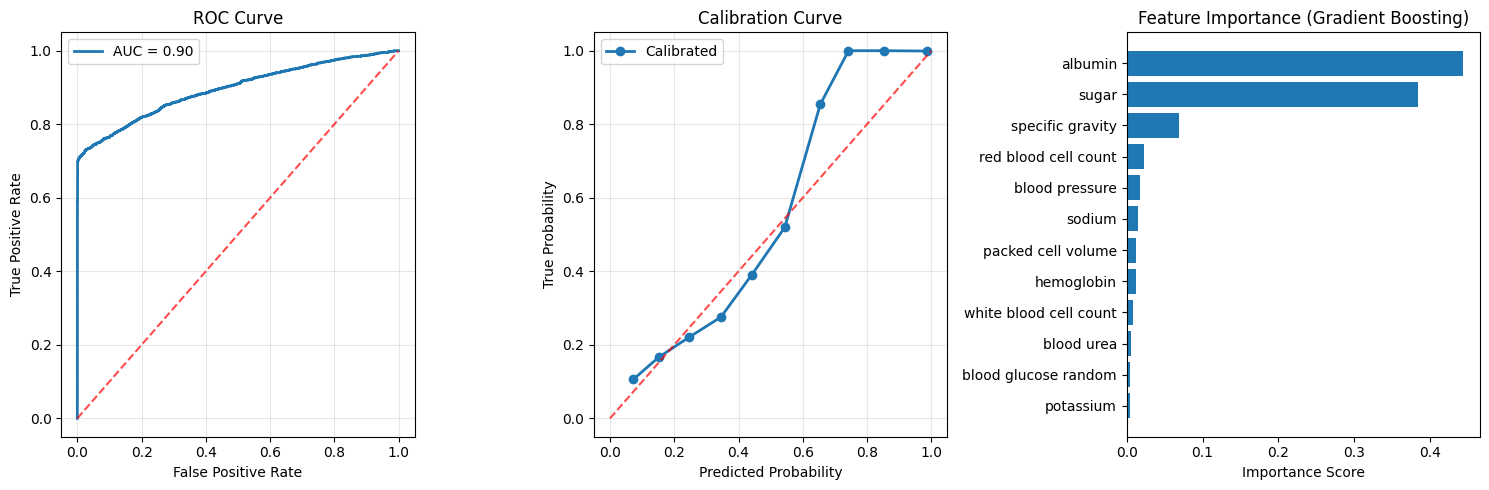


FEATURE IMPORTANCE IN FINAL MODEL
albumin: 0.4433
sugar: 0.3836
specific gravity: 0.0684
red blood cell count: 0.0231
blood pressure: 0.0176
sodium: 0.0153
packed cell volume: 0.0128
hemoglobin: 0.0128
white blood cell count: 0.0081
blood urea: 0.0055
blood glucose random: 0.0050
potassium: 0.0046

 Final selected features: ['albumin', 'sugar', 'specific gravity', 'sodium', 'blood pressure', 'red blood cell count', 'white blood cell count', 'hemoglobin', 'packed cell volume', 'potassium', 'blood glucose random', 'blood urea']
 Most important feature: albumin


In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Store feature names
feature_names = X.columns.tolist()

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Convert back to DataFrame to preserve feature names
X_smote_df = pd.DataFrame(X_smote, columns=feature_names)

# Feature Selection with RandomForest (Ranking Algorithm)
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
feature_importance = rf_selector.feature_importances_

# Rank features based on importance
ranked_features = np.argsort(feature_importance)[::-1]  # Features ranked by importance (highest to lowest)
ranked_feature_names = X.columns[ranked_features]

# Select top 12 features based on Random Forest importance
top_12_features_rf = ranked_feature_names[:12].tolist()

print("Top 12 Features Selected (Based on Random Forest Importance):")
for i, feature in enumerate(top_12_features_rf):
    print(f"{i+1}. {feature}: {feature_importance[ranked_features[i]]:.4f}")

# Information Gain-based Feature Selection (Mutual Information)
mutual_info = mutual_info_classif(X_smote, y_smote)
info_gain_sorted_indices = np.argsort(mutual_info)[::-1]  # Sorting features by Information Gain
info_gain_feature_names = X.columns[info_gain_sorted_indices]

# Select top 12 features based on Information Gain
top_12_features_info_gain = info_gain_feature_names[:12].tolist()

print("\nTop 12 Features Selected (Based on Information Gain):")
for i, feature in enumerate(top_12_features_info_gain):
    print(f"{i+1}. {feature}: {mutual_info[info_gain_sorted_indices[i]]:.4f}")

# Choose either Random Forest or Information Gain for selecting top 12 features
# Here, we will use the top 12 features from Random Forest (you can swap with info_gain_features if preferred)
selected_features = top_12_features_rf

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(
    X_smote_df[selected_features], y_smote, test_size=0.2, random_state=42
)

print(f"\nTraining shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

# IMPROVED Base models for stacking
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)

# Improved MLP to avoid convergence warnings
mlp = MLPClassifier(
    random_state=42,
    max_iter=1000,
    learning_rate_init=0.01,
    early_stopping=True,
    n_iter_no_change=20,
    hidden_layer_sizes=(100, 50)
)

gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Fit the ensemble model
print("\nTraining ensemble model...")
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
print("Calibrating model...")
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Number of features used: {len(selected_features)}")
print("\nClassification Report:\n", report)

# Compare feature selection methods
print("\n" + "="*50)
print("FEATURE SELECTION COMPARISON")
print("="*50)
print("Top 5 Features by Random Forest Importance:")
for i in range(min(5, len(ranked_feature_names))):
    print(f"  {ranked_feature_names[i]}: {feature_importance[ranked_features[i]]:.4f}")

print("\nTop 5 Features by Information Gain:")
for i in range(min(5, len(info_gain_feature_names))):
    print(f"  {info_gain_feature_names[i]}: {mutual_info[info_gain_sorted_indices[i]]:.4f}")

# FIXED: Train a separate GradientBoosting model for feature importance visualization
print("\nTraining separate model for feature importance visualization...")
gb_individual = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_individual.fit(X_train, y_train)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.3)

# Calibration Curve
plt.subplot(1, 3, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance Plot - FIXED: Use the fitted individual model
plt.subplot(1, 3, 3)
feature_imp_values = gb_individual.feature_importances_
sorted_idx = np.argsort(feature_imp_values)
plt.barh(range(len(selected_features)), feature_imp_values[sorted_idx])
plt.yticks(range(len(selected_features)), [selected_features[i] for i in sorted_idx])
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()

plt.show()

# Print feature importance values
print("\n" + "="*50)
print("FEATURE IMPORTANCE IN FINAL MODEL")
print("="*50)
for i in sorted_idx[::-1]:  # Print from most important to least
    print(f"{selected_features[i]}: {feature_imp_values[i]:.4f}")

print(f"\n Final selected features: {selected_features}")
print(f" Most important feature: {selected_features[sorted_idx[-1]]}")


Top 12 Features Selected (Based on Random Forest Importance):
1. albumin: 0.0674
2. sodium: 0.0590
3. hemoglobin: 0.0558
4. serum creatinine: 0.0554
5. sugar: 0.0551
6. potassium: 0.0548
7. red blood cell count: 0.0544
8. specific gravity: 0.0538
9. white blood cell count: 0.0524
10. packed cell volume: 0.0524
11. blood urea: 0.0516
12. blood glucose random: 0.0505

Top 12 Features Selected (Based on Information Gain):
1. red blood cell count: 0.3519
2. hemoglobin: 0.3491
3. blood pressure: 0.3485
4. packed cell volume: 0.3483
5. age: 0.3465
6. specific gravity: 0.3380
7. blood glucose random: 0.3073
8. albumin: 0.2829
9. sugar: 0.2790
10. serum creatinine: 0.2310
11. white blood cell count: 0.0370
12. anemia: 0.0294

Training ensemble model...
Calibrating model...

FINAL RESULTS
ROC AUC: 0.5386
Number of features used: 12

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3354
           1       0.88      0.

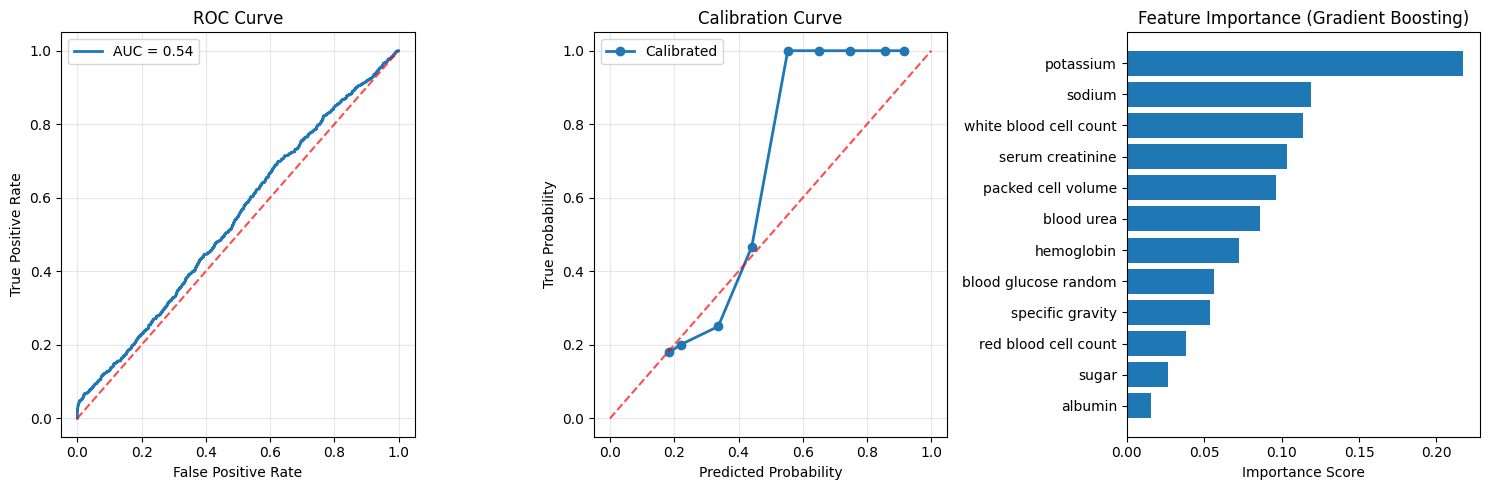


FEATURE IMPORTANCE IN FINAL MODEL
potassium: 0.2172
sodium: 0.1190
white blood cell count: 0.1138
serum creatinine: 0.1037
packed cell volume: 0.0965
blood urea: 0.0862
hemoglobin: 0.0723
blood glucose random: 0.0566
specific gravity: 0.0539
red blood cell count: 0.0382
sugar: 0.0266
albumin: 0.0160

 Final selected features: ['albumin', 'sodium', 'hemoglobin', 'serum creatinine', 'sugar', 'potassium', 'red blood cell count', 'specific gravity', 'white blood cell count', 'packed cell volume', 'blood urea', 'blood glucose random']


In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Store feature names
feature_names = X.columns.tolist()

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Feature scaling: Apply StandardScaler after the split (to avoid data leakage)
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Feature Selection with RandomForest (Ranking Algorithm)
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_train_res_scaled, y_train_res)
feature_importance = rf_selector.feature_importances_

# Rank features based on importance
ranked_features = np.argsort(feature_importance)[::-1]  # Features ranked by importance (highest to lowest)
ranked_feature_names = X.columns[ranked_features]

# Select top 12 features based on Random Forest importance
top_12_features_rf = ranked_feature_names[:12].tolist()

print("Top 12 Features Selected (Based on Random Forest Importance):")
for i, feature in enumerate(top_12_features_rf):
    print(f"{i+1}. {feature}: {feature_importance[ranked_features[i]]:.4f}")

# Information Gain-based Feature Selection (Mutual Information)
mutual_info = mutual_info_classif(X_train_res, y_train_res)
info_gain_sorted_indices = np.argsort(mutual_info)[::-1]  # Sorting features by Information Gain
info_gain_feature_names = X.columns[info_gain_sorted_indices]

# Select top 12 features based on Information Gain
top_12_features_info_gain = info_gain_feature_names[:12].tolist()

print("\nTop 12 Features Selected (Based on Information Gain):")
for i, feature in enumerate(top_12_features_info_gain):
    print(f"{i+1}. {feature}: {mutual_info[info_gain_sorted_indices[i]]:.4f}")

# Choose either Random Forest or Information Gain for selecting top 12 features
# Here, we will use the top 12 features from Random Forest (you can swap with info_gain_features if preferred)
selected_features = top_12_features_rf

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42
)

# IMPROVED Base models for stacking
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)

# Improved MLP to avoid convergence warnings
mlp = MLPClassifier(
    random_state=42,
    max_iter=1000,
    learning_rate_init=0.01,
    early_stopping=True,
    n_iter_no_change=20,
    hidden_layer_sizes=(100, 50)
)

gb = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Fit the ensemble model
print("\nTraining ensemble model...")
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
print("Calibrating model...")
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Number of features used: {len(selected_features)}")
print("\nClassification Report:\n", report)

# Compare feature selection methods
print("\n" + "="*50)
print("FEATURE SELECTION COMPARISON")
print("="*50)
print("Top 5 Features by Random Forest Importance:")
for i in range(min(5, len(ranked_feature_names))):
    print(f"  {ranked_feature_names[i]}: {feature_importance[ranked_features[i]]:.4f}")

print("\nTop 5 Features by Information Gain:")
for i in range(min(5, len(info_gain_feature_names))):
    print(f"  {info_gain_feature_names[i]}: {mutual_info[info_gain_sorted_indices[i]]:.4f}")

# FIXED: Train a separate GradientBoosting model for feature importance visualization
print("\nTraining separate model for feature importance visualization...")
gb_individual = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_individual.fit(X_train, y_train)

# Plotting
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.3)

# Calibration Curve
plt.subplot(1, 3, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', alpha=0.7)
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance Plot - FIXED: Use the fitted individual model
plt.subplot(1, 3, 3)
feature_imp_values = gb_individual.feature_importances_
sorted_idx = np.argsort(feature_imp_values)
plt.barh(range(len(selected_features)), feature_imp_values[sorted_idx])
plt.yticks(range(len(selected_features)), [selected_features[i] for i in sorted_idx])
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.tight_layout()

plt.show()

# Print feature importance values
print("\n" + "="*50)
print("FEATURE IMPORTANCE IN FINAL MODEL")
print("="*50)
for i in sorted_idx[::-1]:  # Print from most important to least
    print(f"{selected_features[i]}: {feature_imp_values[i]:.4f}")

print(f"\n Final selected features: {selected_features}")


# Taking ALL features !!

ROC AUC: 0.8927227332074964
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      3345
           1       0.98      0.75      0.85      3288

    accuracy                           0.87      6633
   macro avg       0.89      0.86      0.86      6633
weighted avg       0.89      0.87      0.86      6633



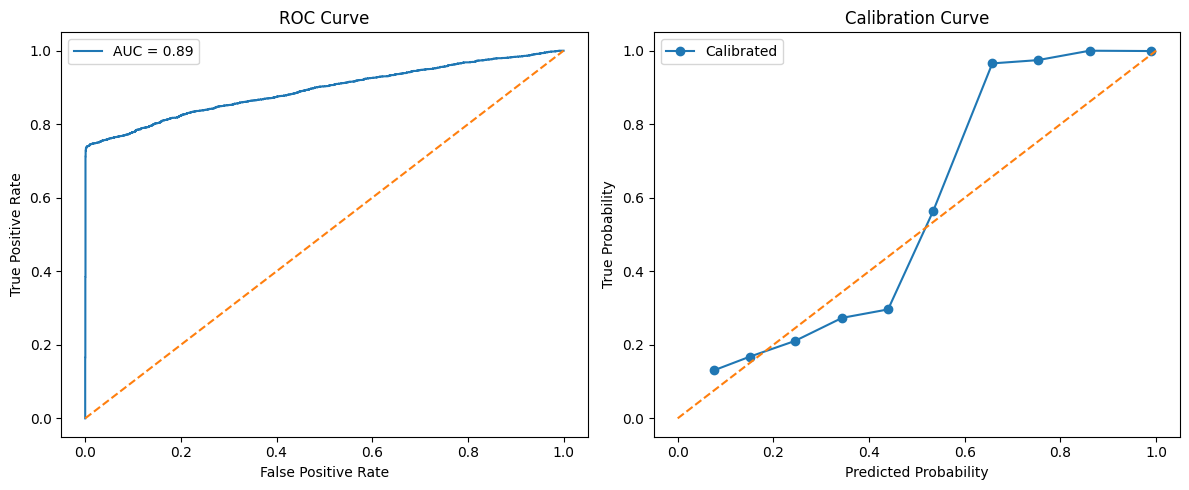

In [ ]:
# !pip install imbalanced-learn scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Drop non-informative columns
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Base models for stacking
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)

# Stacking Ensemble
ensemble = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
y_probs = ensemble.predict_proba(X_test)[:, 1]

# Calibration
calibrated_model = CalibratedClassifierCV(estimator=ensemble, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)
calibrated_probs = calibrated_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=10)

# Metrics
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

# Plotting the results
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calibration Curve
plt.subplot(1, 2, 2)
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()

plt.tight_layout()
plt.show()


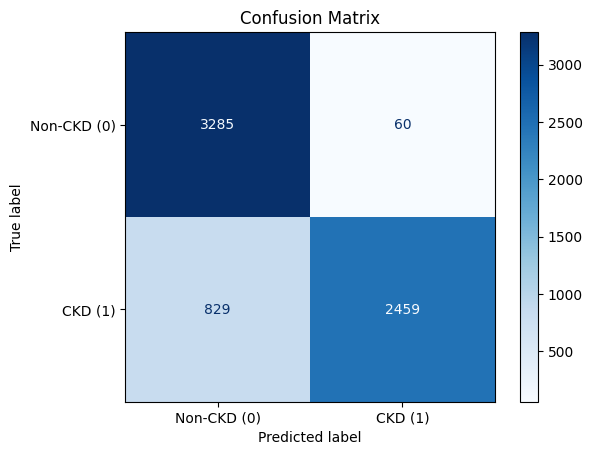

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = ensemble.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-CKD (0)", "CKD (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Other Comparisons !!!

Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Training set shape: (26531, 12)
Test set shape: (6633, 12)

Training Original Stacking...
Original Stacking - Accuracy: 0.848, ROC AUC: 0.872

Training Voting (Hard)...
Voting (Hard) doesn't support probability predictions
Voting (Hard) - Accuracy: 0.812, ROC AUC: N/A

Training Voting (Soft)...
Voting (Soft) - Accuracy: 0.853, ROC AUC: 0.900

Training Enhanced Stacking...
Cross-validation failed for Enhanced Stacking
Enhanced Stacking - Accuracy: 0.877, ROC AUC: 0.916

Training Bagging (DT)...
Cross-validation failed for Bagging (DT)
Bagging (DT) - Accuracy: 0.855, ROC AUC: 0.900

Training AdaBoost...
AdaBoost - Accuracy: 0.793, ROC AUC: 0.848

Training Random Forest...
Random Forest - Accuracy: 0.872, ROC AUC: 0.919

Training Hist Gradient Boosting...
Hist Gradien

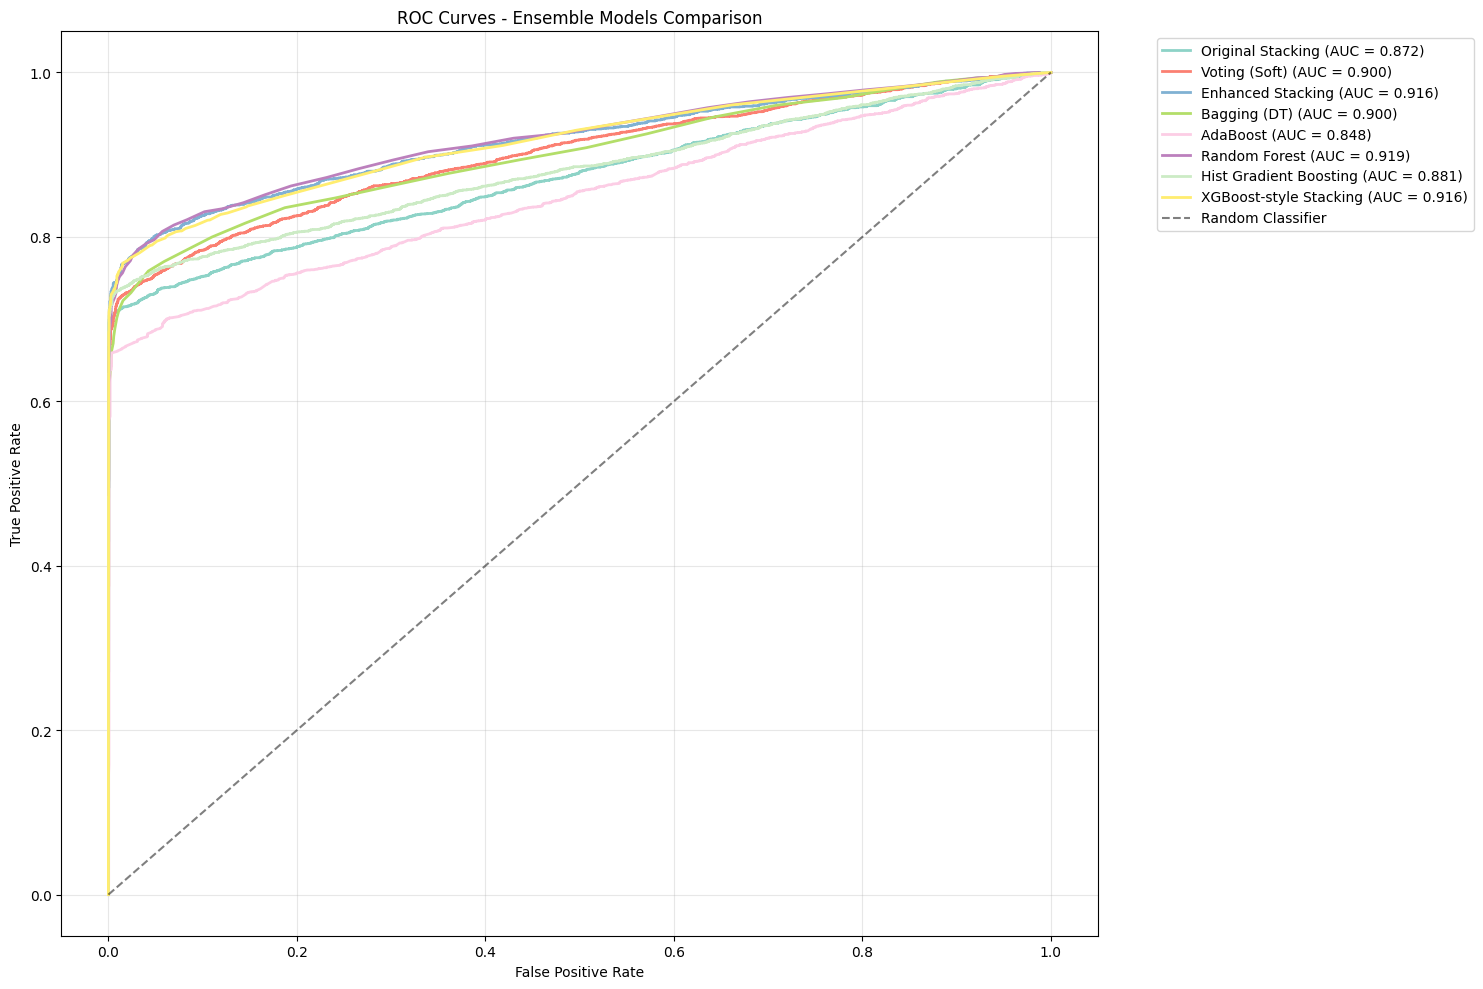


ENSEMBLE MODELS COMPARISON RESULTS

Performance Metrics:
                    Model  ROC AUC  Accuracy   F1_0   F1_1  CV_Mean  CV_Std
6           Random Forest    0.919     0.872  0.886  0.854    0.863   0.168
3       Enhanced Stacking    0.916     0.877  0.888  0.864      NaN     NaN
8  XGBoost-style Stacking    0.916     0.877  0.889  0.861    0.867   0.162
2           Voting (Soft)    0.900     0.853  0.867  0.835    0.849   0.169
4            Bagging (DT)    0.900     0.855  0.872  0.834      NaN     NaN
7  Hist Gradient Boosting    0.881     0.861  0.879  0.838    0.855   0.184
0       Original Stacking    0.872     0.848  0.866  0.824    0.843   0.179
5                AdaBoost    0.848     0.793  0.806  0.778    0.804   0.158
1           Voting (Hard)      NaN     0.812  0.842  0.768    0.809   0.151


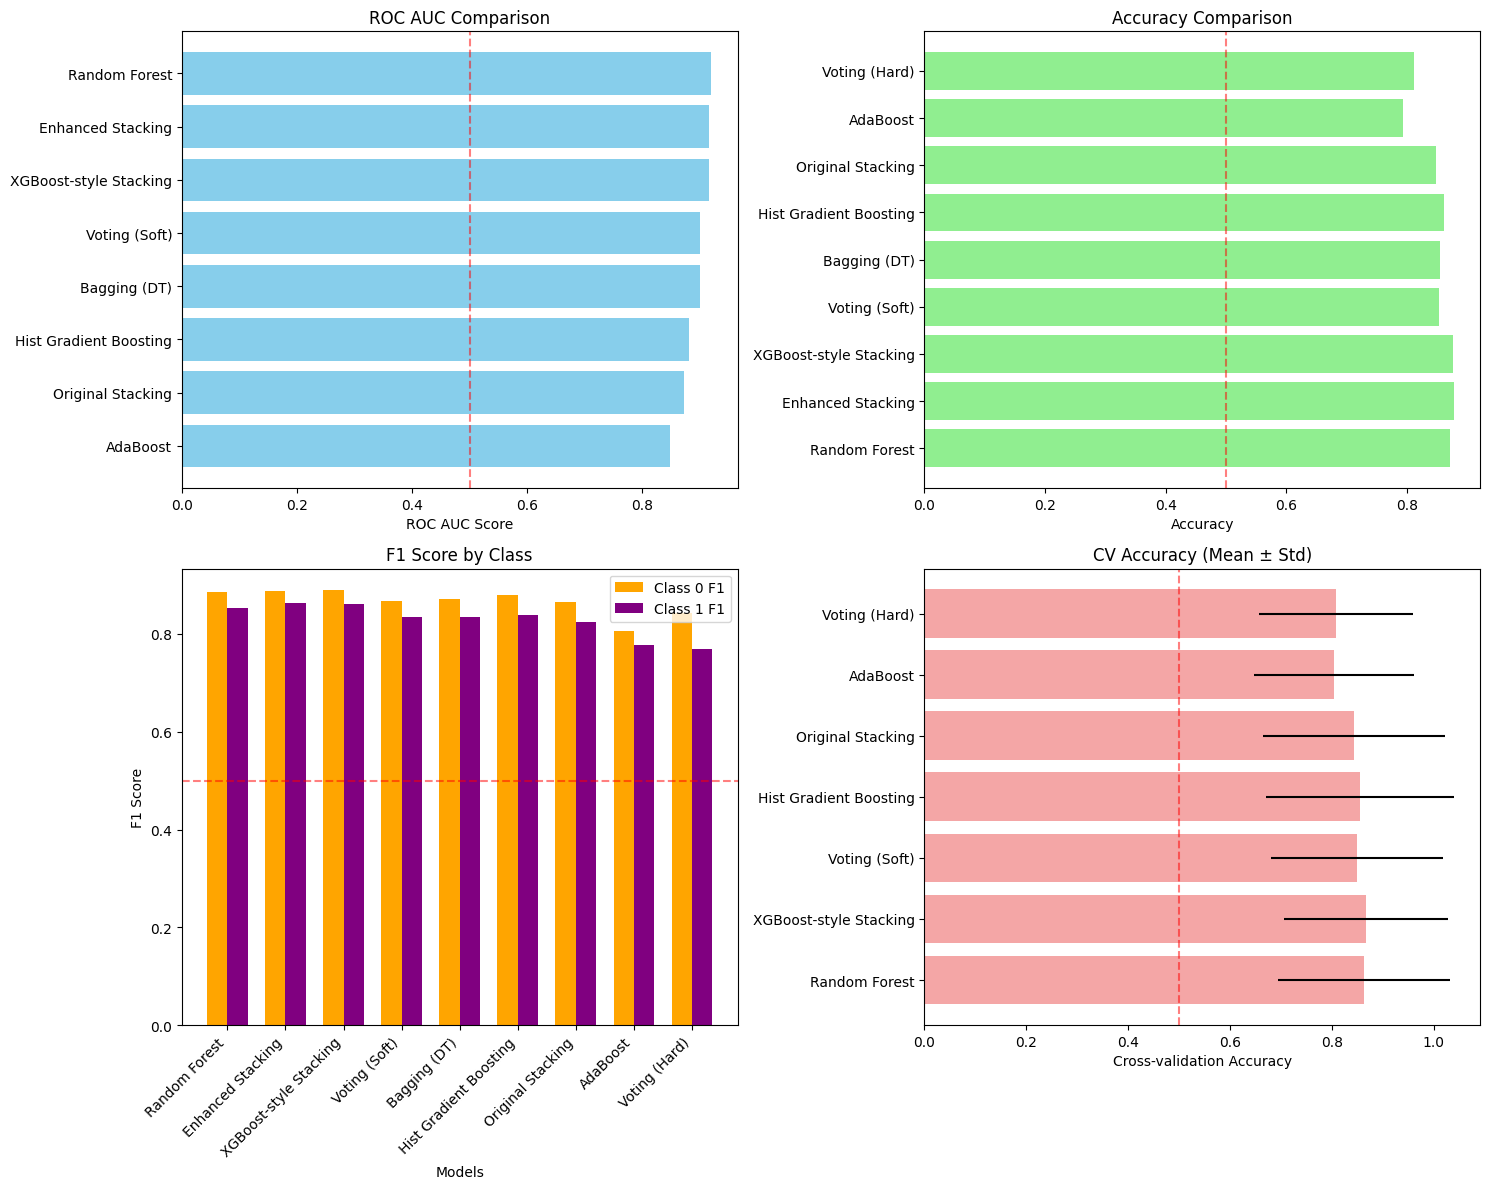


Detailed Performance Metrics:
                    Model  ROC AUC  Accuracy  Precision_0  Recall_0   F1_0  \
6           Random Forest    0.919     0.872        0.804     0.985  0.886   
3       Enhanced Stacking    0.916     0.877        0.821     0.967  0.888   
8  XGBoost-style Stacking    0.916     0.877        0.813     0.980  0.889   
2           Voting (Soft)    0.900     0.853        0.795     0.955  0.867   
4            Bagging (DT)    0.900     0.855        0.788     0.976  0.872   
7  Hist Gradient Boosting    0.881     0.861        0.786     0.996  0.879   
0       Original Stacking    0.872     0.848        0.778     0.975  0.866   
5                AdaBoost    0.848     0.793        0.764     0.853  0.806   
1           Voting (Hard)      NaN     0.812        0.731     0.991  0.842   

   Precision_1  Recall_1   F1_1  CV_Mean  CV_Std  
6        0.980     0.756  0.854    0.863   0.168  
3        0.958     0.786  0.864      NaN     NaN  
8        0.975     0.771  0.861    

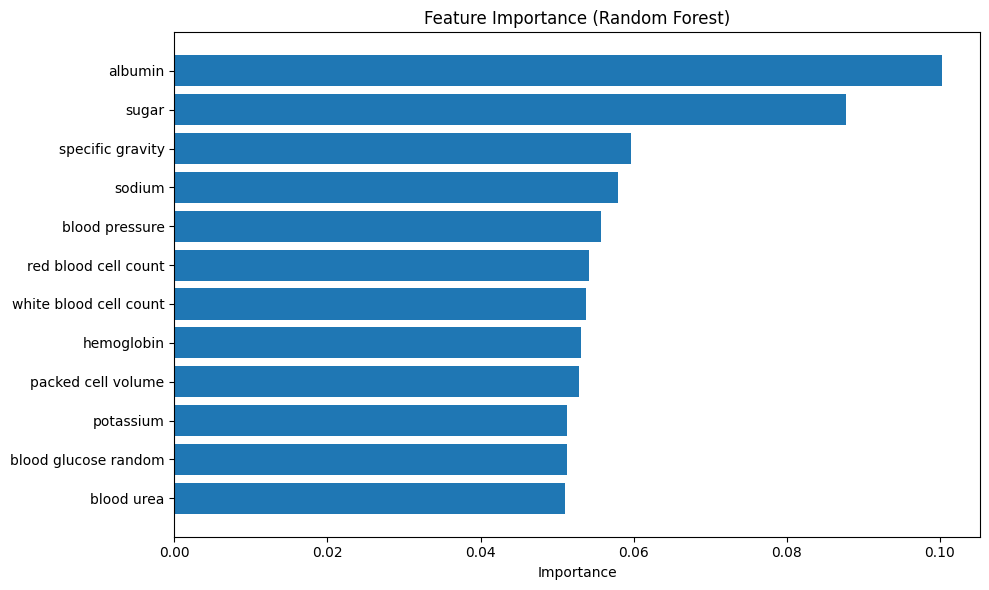


MODEL TYPE ANALYSIS

Performance by Model Type:
               ROC AUC  Accuracy   F1_0   F1_1
Model_Type                                    
Bagging          0.900     0.855  0.872  0.834
Boosting         0.865     0.827  0.842  0.808
Random Forest    0.919     0.872  0.886  0.854
Stacking         0.902     0.867  0.881  0.849
Voting           0.900     0.832  0.855  0.801


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             StackingClassifier, VotingClassifier, BaggingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load dataset (uncomment when you have the data)
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing (using your existing code)
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

print("Selected Features:", selected_features)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Define base models (same as your original)
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# 1. Your Original Stacking Ensemble
original_stacking = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# 2. Voting Classifier (Hard Voting)
voting_hard = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='hard'
)

# 3. Voting Classifier (Soft Voting)
voting_soft = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)

# 4. Enhanced Stacking with More Models
enhanced_stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('mlp', MLPClassifier(random_state=42, max_iter=500))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# 5. Bagging Classifier with Decision Tree
bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

# 6. AdaBoost Classifier
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    random_state=42
)

# 7. Random Forest (as a baseline ensemble)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# 8. Histogram-Based Gradient Boosting
hist_gb = HistGradientBoostingClassifier(random_state=42)

# 9. XGBoost-style Stacking (using GradientBoosting as meta)
xgboost_style_stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=25, random_state=42),
    cv=5
)

# List of all models to compare
models = {
    'Original Stacking': original_stacking,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft,
    'Enhanced Stacking': enhanced_stacking,
    'Bagging (DT)': bagging_dt,
    'AdaBoost': adaboost,
    'Random Forest': random_forest,
    'Hist Gradient Boosting': hist_gb,
    'XGBoost-style Stacking': xgboost_style_stacking
}

# Evaluate each model
results = []

plt.figure(figsize=(15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

for i, (name, model) in enumerate(models.items()):
    print(f"\nTraining {name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities (for models that support predict_proba)
    roc_auc = None
    try:
        y_probs = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_probs)
        fpr, tpr, _ = roc_curve(y_test, y_probs)

        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
    except AttributeError:
        # For models that don't support predict_proba (like hard voting)
        print(f"{name} doesn't support probability predictions")
        # Use decision function or other method if available
        try:
            y_scores = model.decision_function(X_test)
            roc_auc = roc_auc_score(y_test, y_scores)
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
        except:
            # If no probability method is available, skip ROC curve
            pass

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']

    # Cross-validation score
    try:
        cv_scores = cross_val_score(model, X_selected, y_smote, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = np.nan
        cv_std = np.nan
        print(f"Cross-validation failed for {name}")

    # Store results
    results.append({
        'Model': name,
        'ROC AUC': roc_auc if roc_auc is not None else np.nan,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Recall_0': recall_0,
        'F1_0': f1_0,
        'Precision_1': precision_1,
        'Recall_1': recall_1,
        'F1_1': f1_1,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std
    })

    # Fixed print statement
    auc_display = f"{roc_auc:.3f}" if roc_auc is not None else "N/A"
    print(f"{name} - Accuracy: {accuracy:.3f}, ROC AUC: {auc_display}")

# Add diagonal line for ROC plot
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ensemble Models Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create results dataframe
results_df = pd.DataFrame(results)

# Sort by ROC AUC (descending), handling NaN values
if 'ROC AUC' in results_df.columns:
    results_df = results_df.sort_values('ROC AUC', ascending=False, na_position='last')

print("\n" + "="*80)
print("ENSEMBLE MODELS COMPARISON RESULTS")
print("="*80)

# Display results
print("\nPerformance Metrics:")
display_columns = ['Model', 'ROC AUC', 'Accuracy', 'F1_0', 'F1_1', 'CV_Mean', 'CV_Std']
print(results_df[display_columns].round(3))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC AUC Comparison (only for models with ROC AUC)
if 'ROC AUC' in results_df.columns:
    auc_data = results_df.dropna(subset=['ROC AUC']).sort_values('ROC AUC')
    if not auc_data.empty:
        axes[0, 0].barh(auc_data['Model'], auc_data['ROC AUC'], color='skyblue')
        axes[0, 0].set_xlabel('ROC AUC Score')
        axes[0, 0].set_title('ROC AUC Comparison')
        axes[0, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
    else:
        axes[0, 0].text(0.5, 0.5, 'No ROC AUC data available',
                       ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Accuracy Comparison
axes[0, 1].barh(results_df['Model'], results_df['Accuracy'], color='lightgreen')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)

# 3. F1-Score Comparison
models_list = results_df['Model']
f1_0_scores = results_df['F1_0']
f1_1_scores = results_df['F1_1']

x = np.arange(len(models_list))
width = 0.35

axes[1, 0].bar(x - width/2, f1_0_scores, width, label='Class 0 F1', color='orange')
axes[1, 0].bar(x + width/2, f1_1_scores, width, label='Class 1 F1', color='purple')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score by Class')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_list, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

# 4. Cross-validation Results (only for models with CV scores)
cv_data = results_df.dropna(subset=['CV_Mean'])
if not cv_data.empty:
    axes[1, 1].barh(cv_data['Model'], cv_data['CV_Mean'], xerr=cv_data['CV_Std'],
                    color='lightcoral', alpha=0.7)
    axes[1, 1].set_xlabel('Cross-validation Accuracy')
    axes[1, 1].set_title('CV Accuracy (Mean ± Std)')
    axes[1, 1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
else:
    axes[1, 1].text(0.5, 0.5, 'No CV data available',
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# Detailed comparison table
print("\nDetailed Performance Metrics:")
detailed_columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0',
                   'Precision_1', 'Recall_1', 'F1_1', 'CV_Mean', 'CV_Std']
print(results_df[detailed_columns].round(3))

# Find best model based on ROC AUC (if available)
if 'ROC AUC' in results_df.columns and not results_df['ROC AUC'].isna().all():
    valid_models = results_df.dropna(subset=['ROC AUC'])
    if not valid_models.empty:
        best_model_info = valid_models.iloc[0]
        print(f"\n🎯 BEST MODEL: {best_model_info['Model']}")
        print(f"   ROC AUC: {best_model_info['ROC AUC']:.3f}")
        print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
        if not pd.isna(best_model_info['CV_Mean']):
            print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Alternative: Find best model based on Accuracy if no ROC AUC available
else:
    best_model_info = results_df.iloc[results_df['Accuracy'].idxmax()]
    print(f"\n🎯 BEST MODEL (by Accuracy): {best_model_info['Model']}")
    print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
    if not pd.isna(best_model_info['CV_Mean']):
        print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Additional: Feature Importance from Random Forest (if available)
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

rf_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_selector.feature_importances_[selector.get_support()]
}).sort_values('importance', ascending=False)

print(rf_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['feature'], rf_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model type analysis
print("\n" + "="*50)
print("MODEL TYPE ANALYSIS")
print("="*50)

# Group by model type
results_df['Model_Type'] = results_df['Model'].apply(lambda x:
    'Stacking' if 'Stacking' in x else
    'Voting' if 'Voting' in x else
    'Boosting' if 'Boost' in x else
    'Bagging' if 'Bagging' in x else
    'Random Forest' if 'Random Forest' in x else
    'Other'
)

if 'ROC AUC' in results_df.columns:
    model_type_performance = results_df.groupby('Model_Type').agg({
        'ROC AUC': 'mean',
        'Accuracy': 'mean',
        'F1_0': 'mean',
        'F1_1': 'mean'
    }).round(3)

print("\nPerformance by Model Type:")
print(model_type_performance)

# XX YY

Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Training set shape: (26531, 12)
Test set shape: (6633, 12)

Training Original Stacking...
Original Stacking - Accuracy: 0.848, ROC AUC: 0.872
  Training Time: 76.65s, Prediction Time: 0.0064s
  CV Time: 370.90s, Model Size: 168.3 KB

Training Voting (Hard)...
Voting (Hard) doesn't support probability predictions
Voting (Hard) - Accuracy: 0.812, ROC AUC: N/A
  Training Time: 86.05s, Prediction Time: 5.5355s
  CV Time: 494.98s, Model Size: 50110.3 KB

Training Voting (Soft)...
Voting (Soft) - Accuracy: 0.853, ROC AUC: 0.900
  Training Time: 89.08s, Prediction Time: 5.4847s
  CV Time: 458.06s, Model Size: 50110.3 KB

Training Enhanced Stacking...
Enhanced Stacking - Accuracy: 0.877, ROC AUC: 0.916
  Training Time: 444.74s, Prediction Time: 5.5069s
  CV Time: 2228.55s,

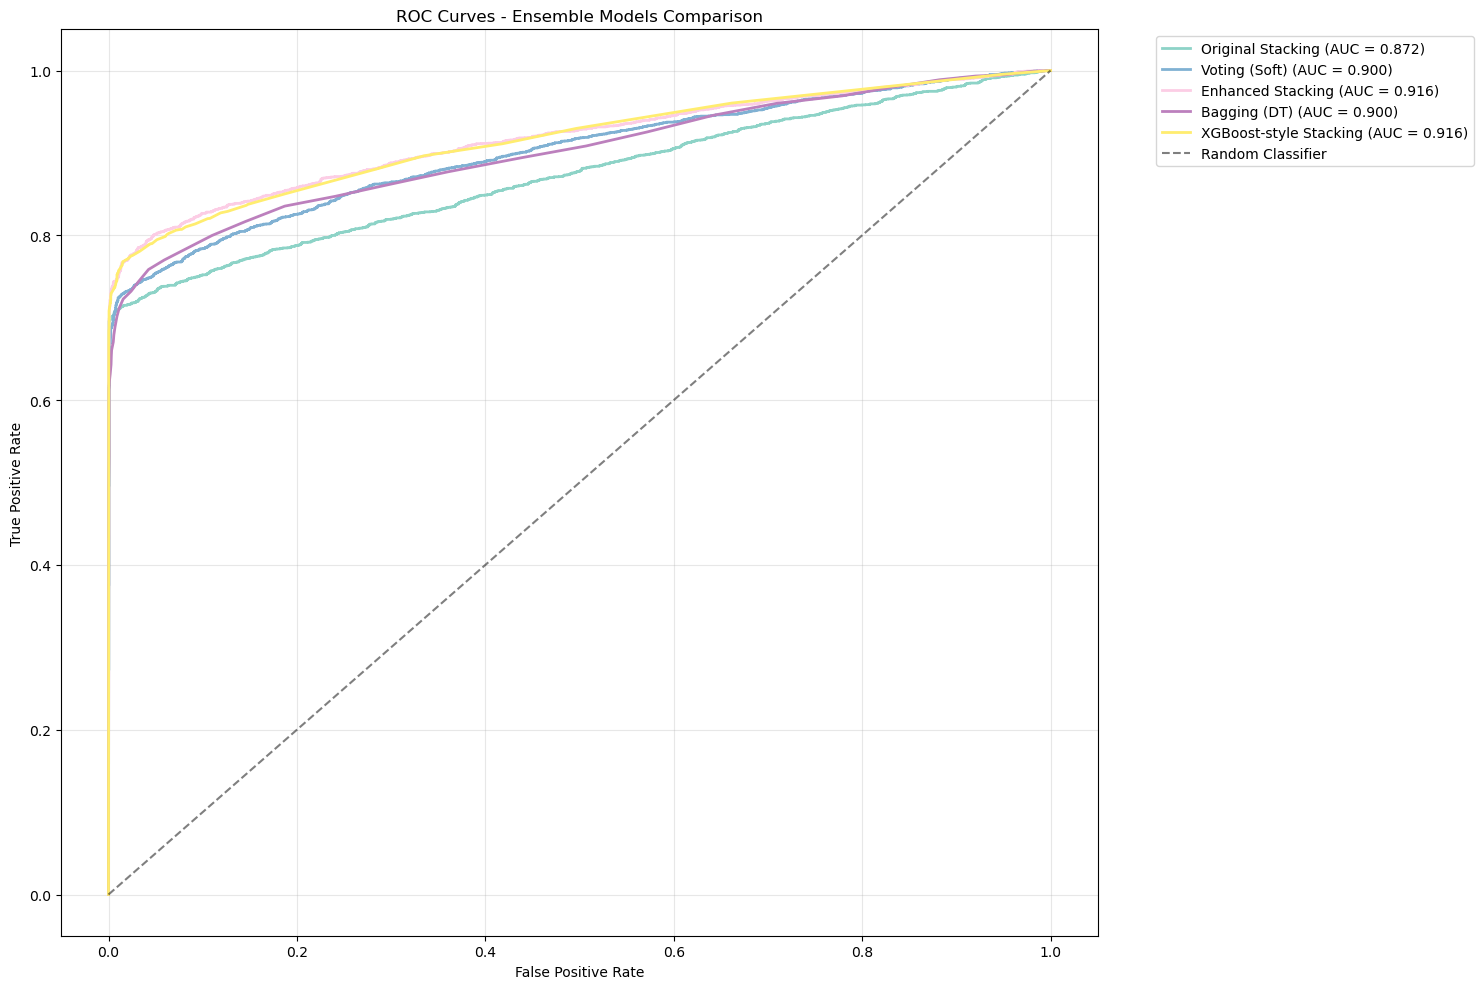


ENSEMBLE MODELS COMPARISON RESULTS

Performance Metrics:
                    Model  ROC AUC  Accuracy   F1_0   F1_1  CV_Mean  CV_Std  \
3       Enhanced Stacking    0.916     0.877  0.888  0.863    0.862   0.164   
5  XGBoost-style Stacking    0.916     0.877  0.889  0.861    0.867   0.162   
2           Voting (Soft)    0.900     0.853  0.867  0.835    0.849   0.169   
4            Bagging (DT)    0.900     0.855  0.872  0.834    0.846   0.161   
0       Original Stacking    0.872     0.848  0.866  0.824    0.843   0.178   
1           Voting (Hard)      NaN     0.812  0.842  0.768    0.809   0.151   

   Training_Time_sec  Prediction_Time_sec  Model_Size_KB  
3            444.736                5.507      50156.936  
5             25.090                0.040      23793.993  
2             89.083                5.485      50110.344  
4              6.900                0.037      16717.354  
0             76.650                0.006        168.321  
1             86.053              

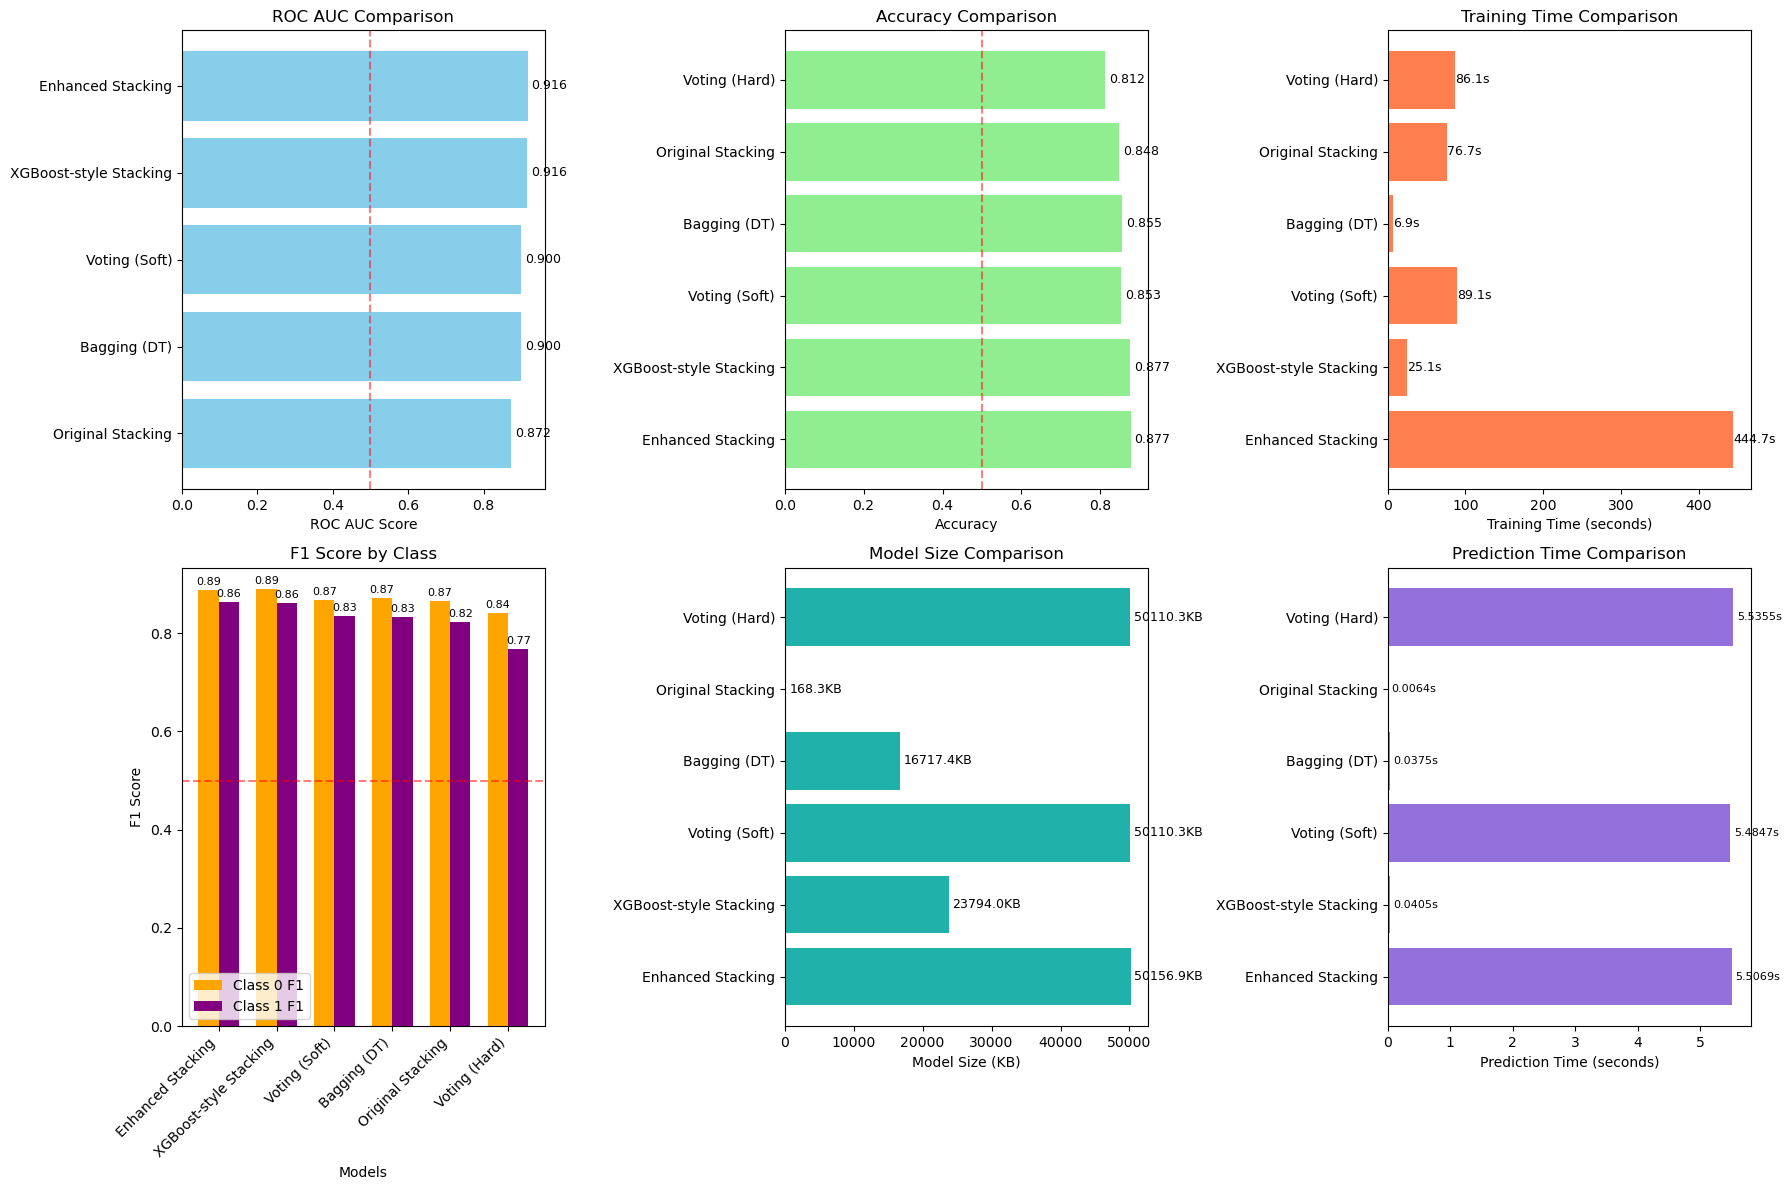


Detailed Performance Metrics:
                    Model  ROC AUC  Accuracy  Precision_0  Recall_0   F1_0  \
3       Enhanced Stacking    0.916     0.877        0.821     0.966  0.888   
5  XGBoost-style Stacking    0.916     0.877        0.813     0.980  0.889   
2           Voting (Soft)    0.900     0.853        0.795     0.955  0.867   
4            Bagging (DT)    0.900     0.855        0.788     0.976  0.872   
0       Original Stacking    0.872     0.848        0.779     0.975  0.866   
1           Voting (Hard)      NaN     0.812        0.731     0.991  0.842   

   Precision_1  Recall_1   F1_1  CV_Mean  CV_Std  Training_Time_sec  \
3        0.958     0.786  0.863    0.862   0.164            444.736   
5        0.975     0.771  0.861    0.867   0.162             25.090   
2        0.942     0.749  0.835    0.849   0.169             89.083   
4        0.968     0.732  0.834    0.846   0.161              6.900   
0        0.966     0.718  0.824    0.843   0.178             76.650

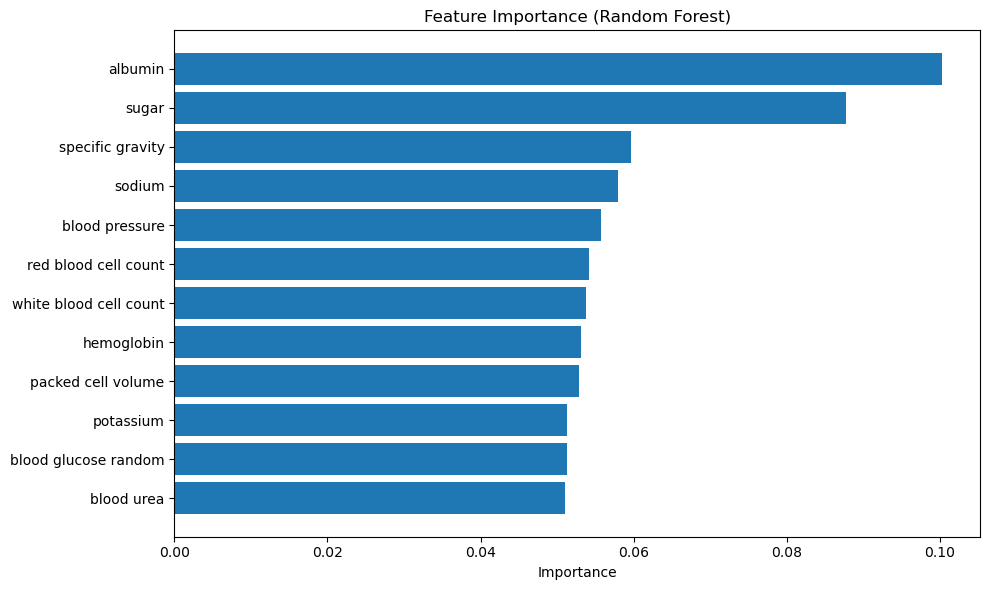


MODEL TYPE ANALYSIS

Performance by Model Type:
            ROC AUC  Accuracy   F1_0   F1_1  Training_Time_sec  \
Model_Type                                                       
Bagging       0.900     0.855  0.872  0.834              6.900   
Stacking      0.902     0.867  0.881  0.849            182.159   
Voting        0.900     0.832  0.855  0.801             87.568   

            Prediction_Time_sec  Model_Size_KB  
Model_Type                                      
Bagging                   0.037      16717.354  
Stacking                  1.851      24706.417  
Voting                    5.510      50110.344  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             StackingClassifier, VotingClassifier, BaggingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
import time
import pickle
from io import BytesIO
warnings.filterwarnings('ignore')

# Load dataset (uncomment when you have the data)
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing (using your existing code)
df_cleaned = df
X = df_cleaned.drop(columns=["classification"])
y = df_cleaned["classification"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Feature Selection with RandomForest
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_smote, y_smote)
selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
X_selected = selector.transform(X_smote)
selected_features = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_smote, test_size=0.2, random_state=42)

print("Selected Features:", selected_features)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Define base models (same as your original)
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=500)
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# 1. Your Original Stacking Ensemble
original_stacking = StackingClassifier(
    estimators=[('lr', logreg), ('mlp', mlp), ('gb', gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# 2. Voting Classifier (Hard Voting)
voting_hard = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='hard'
)

# 3. Voting Classifier (Soft Voting)
voting_soft = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    voting='soft'
)

# 4. Enhanced Stacking with More Models
enhanced_stacking = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('mlp', MLPClassifier(random_state=42, max_iter=500))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# 5. Bagging Classifier with Decision Tree - FIXED VERSION
try:
    # Try with base_estimator (older scikit-learn versions)
    bagging_dt = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=50,
        random_state=42
    )
except TypeError:
    # Fall back to estimator (newer scikit-learn versions)
    bagging_dt = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=50,
        random_state=42
    # )

# 9. XGBoost-style Stacking (using GradientBoosting as meta)
xgboost_style_stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42))
    ],
    final_estimator=GradientBoostingClassifier(n_estimators=25, random_state=42),
    cv=5
)

# List of all models to compare (without Random Forest, Hist Gradient Boosting, AdaBoost)
models = {
    'Original Stacking': original_stacking,
    'Voting (Hard)': voting_hard,
    'Voting (Soft)': voting_soft,
    'Enhanced Stacking': enhanced_stacking,
    'Bagging (DT)': bagging_dt,
    'XGBoost-style Stacking': xgboost_style_stacking
}

# Function to calculate model size
def get_model_size(model):
    """Calculate model size in KB by serializing it"""
    try:
        buffer = BytesIO()
        pickle.dump(model, buffer)
        size_kb = len(buffer.getvalue()) / 1024  # Convert to KB
        return size_kb
    except Exception as e:
        print(f"Error calculating model size: {e}")
        return np.nan

# Evaluate each model
results = []

plt.figure(figsize=(15, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

for i, (name, model) in enumerate(models.items()):
    print(f"\nTraining {name}...")

    # Track training time
    start_time = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Calculate training time
    training_time = time.time() - start_time

    # Calculate model size
    model_size_kb = get_model_size(model)

    # Track prediction time
    pred_start_time = time.time()

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate prediction time
    prediction_time = time.time() - pred_start_time

    # Probabilities (for models that support predict_proba)
    roc_auc = None
    try:
        y_probs = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_probs)
        fpr, tpr, _ = roc_curve(y_test, y_probs)

        # Plot ROC curve
        plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
    except AttributeError:
        # For models that don't support predict_proba (like hard voting)
        print(f"{name} doesn't support probability predictions")
        # Use decision function or other method if available
        try:
            y_scores = model.decision_function(X_test)
            roc_auc = roc_auc_score(y_test, y_scores)
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
        except:
            # If no probability method is available, skip ROC curve
            pass

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    f1_0 = report['0']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    f1_1 = report['1']['f1-score']

    # Cross-validation score with timing
    cv_time_start = time.time()
    try:
        cv_scores = cross_val_score(model, X_selected, y_smote, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = np.nan
        cv_std = np.nan
        print(f"Cross-validation failed for {name}")
    cv_time = time.time() - cv_time_start

    # Store results
    results.append({
        'Model': name,
        'ROC AUC': roc_auc if roc_auc is not None else np.nan,
        'Accuracy': accuracy,
        'Precision_0': precision_0,
        'Recall_0': recall_0,
        'F1_0': f1_0,
        'Precision_1': precision_1,
        'Recall_1': recall_1,
        'F1_1': f1_1,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Training_Time_sec': training_time,
        'Prediction_Time_sec': prediction_time,
        'CV_Time_sec': cv_time,
        'Model_Size_KB': model_size_kb
    })

    # Print detailed performance with runtime and size
    auc_display = f"{roc_auc:.3f}" if roc_auc is not None else "N/A"
    print(f"{name} - Accuracy: {accuracy:.3f}, ROC AUC: {auc_display}")
    print(f"  Training Time: {training_time:.2f}s, Prediction Time: {prediction_time:.4f}s")
    print(f"  CV Time: {cv_time:.2f}s, Model Size: {model_size_kb:.1f} KB")

# Add diagonal line for ROC plot
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ensemble Models Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create results dataframe
results_df = pd.DataFrame(results)

# Sort by ROC AUC (descending), handling NaN values
if 'ROC AUC' in results_df.columns:
    results_df = results_df.sort_values('ROC AUC', ascending=False, na_position='last')

print("\n" + "="*80)
print("ENSEMBLE MODELS COMPARISON RESULTS")
print("="*80)

# Display results
print("\nPerformance Metrics:")
display_columns = ['Model', 'ROC AUC', 'Accuracy', 'F1_0', 'F1_1', 'CV_Mean', 'CV_Std',
                  'Training_Time_sec', 'Prediction_Time_sec', 'Model_Size_KB']
print(results_df[display_columns].round(3))

# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. ROC AUC Comparison (only for models with ROC AUC)
if 'ROC AUC' in results_df.columns:
    auc_data = results_df.dropna(subset=['ROC AUC']).sort_values('ROC AUC')
    if not auc_data.empty:
        axes[0, 0].barh(auc_data['Model'], auc_data['ROC AUC'], color='skyblue')
        axes[0, 0].set_xlabel('ROC AUC Score')
        axes[0, 0].set_title('ROC AUC Comparison')
        axes[0, 0].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
        # Add value labels
        for j, v in enumerate(auc_data['ROC AUC']):
            axes[0, 0].text(v + 0.01, j, f'{v:.3f}', va='center', fontsize=9)
    else:
        axes[0, 0].text(0.5, 0.5, 'No ROC AUC data available',
                       ha='center', va='center', transform=axes[0, 0].transAxes)

# 2. Accuracy Comparison
axes[0, 1].barh(results_df['Model'], results_df['Accuracy'], color='lightgreen')
axes[0, 1].set_xlabel('Accuracy')
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
# Add value labels
for j, v in enumerate(results_df['Accuracy']):
    axes[0, 1].text(v + 0.01, j, f'{v:.3f}', va='center', fontsize=9)

# 3. Training Time Comparison
axes[0, 2].barh(results_df['Model'], results_df['Training_Time_sec'], color='coral')
axes[0, 2].set_xlabel('Training Time (seconds)')
axes[0, 2].set_title('Training Time Comparison')
# Add value labels
for j, v in enumerate(results_df['Training_Time_sec']):
    axes[0, 2].text(v + 0.01, j, f'{v:.1f}s', va='center', fontsize=9)

# 4. F1-Score Comparison
models_list = results_df['Model']
f1_0_scores = results_df['F1_0']
f1_1_scores = results_df['F1_1']

x = np.arange(len(models_list))
width = 0.35

axes[1, 0].bar(x - width/2, f1_0_scores, width, label='Class 0 F1', color='orange')
axes[1, 0].bar(x + width/2, f1_1_scores, width, label='Class 1 F1', color='purple')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].set_title('F1 Score by Class')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models_list, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
# Add value labels
for j, (v0, v1) in enumerate(zip(f1_0_scores, f1_1_scores)):
    axes[1, 0].text(j - width/2, v0 + 0.01, f'{v0:.2f}', ha='center', fontsize=8)
    axes[1, 0].text(j + width/2, v1 + 0.01, f'{v1:.2f}', ha='center', fontsize=8)

# 5. Model Size Comparison
axes[1, 1].barh(results_df['Model'], results_df['Model_Size_KB'], color='lightseagreen')
axes[1, 1].set_xlabel('Model Size (KB)')
axes[1, 1].set_title('Model Size Comparison')
# Add value labels
for j, v in enumerate(results_df['Model_Size_KB']):
    axes[1, 1].text(v + max(results_df['Model_Size_KB']) * 0.01, j, f'{v:.1f}KB', va='center', fontsize=9)

# 6. Prediction Time Comparison
axes[1, 2].barh(results_df['Model'], results_df['Prediction_Time_sec'], color='mediumpurple')
axes[1, 2].set_xlabel('Prediction Time (seconds)')
axes[1, 2].set_title('Prediction Time Comparison')
# Add value labels
for j, v in enumerate(results_df['Prediction_Time_sec']):
    axes[1, 2].text(v + max(results_df['Prediction_Time_sec']) * 0.01, j, f'{v:.4f}s', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Detailed comparison table
print("\nDetailed Performance Metrics:")
detailed_columns = ['Model', 'ROC AUC', 'Accuracy', 'Precision_0', 'Recall_0', 'F1_0',
                   'Precision_1', 'Recall_1', 'F1_1', 'CV_Mean', 'CV_Std',
                   'Training_Time_sec', 'Prediction_Time_sec', 'CV_Time_sec', 'Model_Size_KB']
print(results_df[detailed_columns].round(3))

# Find best model based on ROC AUC (if available)
if 'ROC AUC' in results_df.columns and not results_df['ROC AUC'].isna().all():
    valid_models = results_df.dropna(subset=['ROC AUC'])
    if not valid_models.empty:
        best_model_info = valid_models.iloc[0]
        print(f"\n🎯 BEST MODEL (by ROC AUC): {best_model_info['Model']}")
        print(f"   ROC AUC: {best_model_info['ROC AUC']:.3f}")
        print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
        print(f"   Training Time: {best_model_info['Training_Time_sec']:.2f}s")
        print(f"   Prediction Time: {best_model_info['Prediction_Time_sec']:.4f}s")
        print(f"   Model Size: {best_model_info['Model_Size_KB']:.1f} KB")
        if not pd.isna(best_model_info['CV_Mean']):
            print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Alternative: Find best model based on Accuracy if no ROC AUC available
else:
    best_model_info = results_df.iloc[results_df['Accuracy'].idxmax()]
    print(f"\n🎯 BEST MODEL (by Accuracy): {best_model_info['Model']}")
    print(f"   Accuracy: {best_model_info['Accuracy']:.3f}")
    print(f"   Training Time: {best_model_info['Training_Time_sec']:.2f}s")
    print(f"   Prediction Time: {best_model_info['Prediction_Time_sec']:.4f}s")
    print(f"   Model Size: {best_model_info['Model_Size_KB']:.1f} KB")
    if not pd.isna(best_model_info['CV_Mean']):
        print(f"   CV Accuracy: {best_model_info['CV_Mean']:.3f} ± {best_model_info['CV_Std']:.3f}")

# Find fastest model for prediction
fastest_model = results_df.loc[results_df['Prediction_Time_sec'].idxmin()]
print(f"\n⚡ FASTEST PREDICTION MODEL: {fastest_model['Model']}")
print(f"   Prediction Time: {fastest_model['Prediction_Time_sec']:.4f}s")
print(f"   Accuracy: {fastest_model['Accuracy']:.3f}")

# Find smallest model
smallest_model = results_df.loc[results_df['Model_Size_KB'].idxmin()]
print(f"\n📦 SMALLEST MODEL: {smallest_model['Model']}")
print(f"   Model Size: {smallest_model['Model_Size_KB']:.1f} KB")
print(f"   Accuracy: {smallest_model['Accuracy']:.3f}")

# Additional: Feature Importance from Random Forest (if available)
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

rf_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_selector.feature_importances_[selector.get_support()]
}).sort_values('importance', ascending=False)

print(rf_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['feature'], rf_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model type analysis
print("\n" + "="*50)
print("MODEL TYPE ANALYSIS")
print("="*50)

# Group by model type
results_df['Model_Type'] = results_df['Model'].apply(lambda x:
    'Stacking' if 'Stacking' in x else
    'Voting' if 'Voting' in x else
    'Boosting' if 'Boost' in x else
    'Bagging' if 'Bagging' in x else
    'Random Forest' if 'Random Forest' in x else
    'Other'
)

if 'ROC AUC' in results_df.columns:
    model_type_performance = results_df.groupby('Model_Type').agg({
        'ROC AUC': 'mean',
        'Accuracy': 'mean',
        'F1_0': 'mean',
        'F1_1': 'mean',
        'Training_Time_sec': 'mean',
        'Prediction_Time_sec': 'mean',
        'Model_Size_KB': 'mean'
    }).round(3)

print("\nPerformance by Model Type:")
print(model_type_performance)

other comparisions small code from gpt

# NN

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

Training Shallow_NN_1Layer
Epoch 1/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.5109 - loss: 0.9103 - val_accuracy: 0.5233 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 2/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.5088 - loss: 0.6950 - val_accuracy: 0.5142 - val_loss: 0.6947 - learning_rate: 0.0010
Epoch 3/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.5100 - loss: 0.6946 - val_accuracy: 0.5224 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 4/100
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.5119 - loss: 0.6946 - val_accuracy: 0.5222 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 5/100
830/83

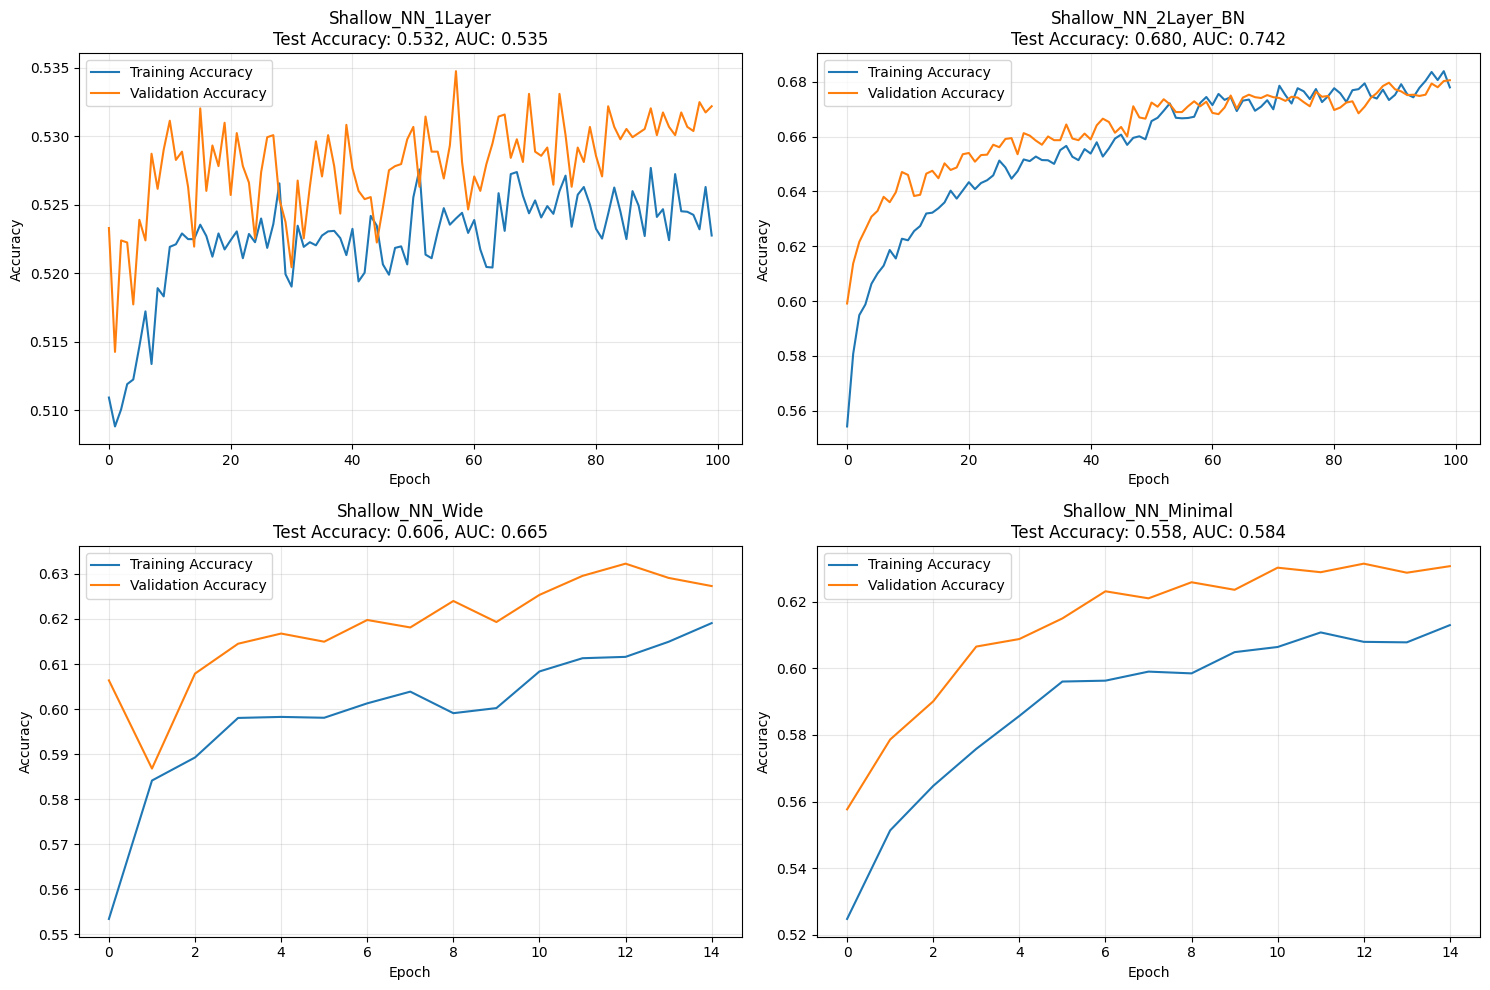


Shallow Neural Networks Results:
                  Model                                       Architecture  \
0     Shallow_NN_1Layer  [<Dense name=dense, built=True>, <Dropout name...   
1  Shallow_NN_2Layer_BN  [<Dense name=dense_2, built=True>, <BatchNorma...   
2       Shallow_NN_Wide  [<Dense name=dense_5, built=True>, <BatchNorma...   
3    Shallow_NN_Minimal  [<Dense name=dense_8, built=True>, <Dropout na...   

   Test_Accuracy  Test_Loss  ROC_AUC  Precision_0  Recall_0   F1_0  \
0          0.532      0.691    0.535        0.562     0.290  0.382   
1          0.680      0.605    0.742        0.677     0.688  0.683   
2          0.606      0.850    0.665        0.660     0.440  0.528   
3          0.558      0.685    0.584        0.574     0.448  0.503   

   Precision_1  Recall_1   F1_1  Training_Epochs  
0        0.521     0.774  0.623              100  
1        0.683     0.672  0.678              100  
2        0.580     0.773  0.663               15  
3        0.547     0

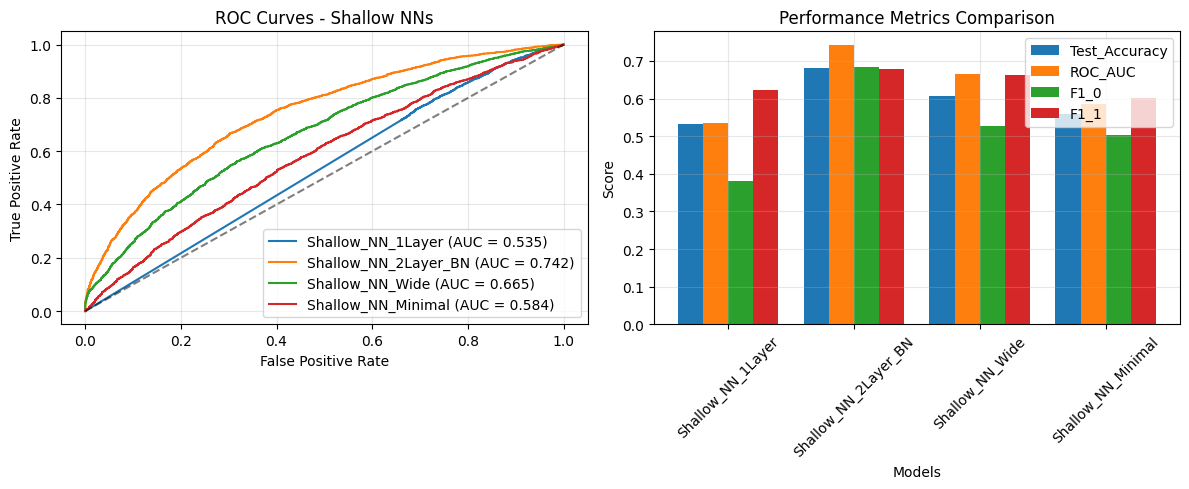

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


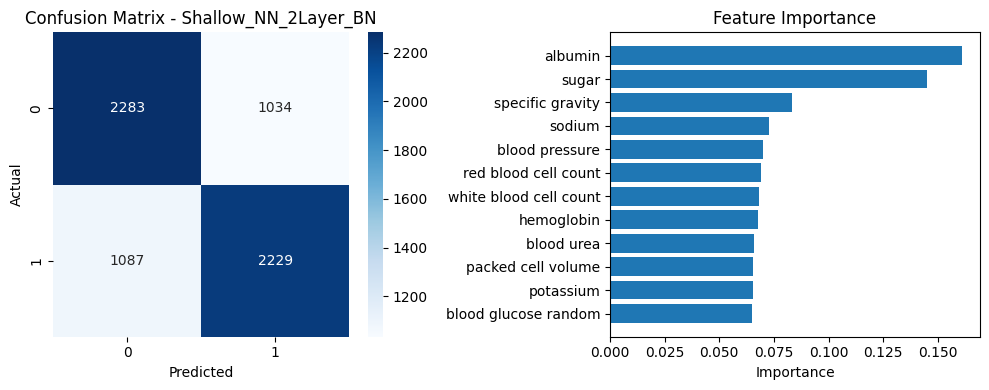


Feature Importance:
                   Feature  Importance
2                  albumin      0.1613
3                    sugar      0.1452
1         specific gravity      0.0831
6                   sodium      0.0729
0           blood pressure      0.0700
11    red blood cell count      0.0692
10  white blood cell count      0.0683
8               hemoglobin      0.0678
5               blood urea      0.0658
9       packed cell volume      0.0656
7                potassium      0.0656
4     blood glucose random      0.0651

Model Architectures Summary:

Shallow_NN_1Layer:
Layers: 2 dense layers
Parameters: 962

Shallow_NN_2Layer_BN:
Layers: 3 dense layers
Parameters: 10,562

Shallow_NN_Wide:
Layers: 3 dense layers
Parameters: 37,506

Shallow_NN_Minimal:
Layers: 3 dense layers
Parameters: 978


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)

    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()

    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Define shallow neural network architectures
def create_shallow_nn_1(input_dim):
    """Simple 1-hidden layer NN"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_2(input_dim):
    """2-hidden layer NN with batch normalization"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_3(input_dim):
    """Wide shallow network"""
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,), kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(2, activation='softmax')
    ])
    return model

def create_shallow_nn_4(input_dim):
    """Minimalist shallow network"""
    model = Sequential([
        Dense(32, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    return model

# Compile and train shallow models
shallow_models = {
    'Shallow_NN_1Layer': create_shallow_nn_1(X_train.shape[1]),
    'Shallow_NN_2Layer_BN': create_shallow_nn_2(X_train.shape[1]),
    'Shallow_NN_Wide': create_shallow_nn_3(X_train.shape[1]),
    'Shallow_NN_Minimal': create_shallow_nn_4(X_train.shape[1])
}

# Training configuration
epochs = 100
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
]

# Train and evaluate shallow models
results_shallow = []

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(shallow_models.items()):
    print(f"\n{'='*50}")
    print(f"Training {name}")
    print(f"{'='*50}")

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_shallow.append({
        'Model': name,
        'Architecture': str(model.layers),
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': len(history.history['loss'])
    })

    # Plot training history
    plt.subplot(2, 2, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name}\nTest Accuracy: {test_accuracy:.3f}, AUC: {roc_auc:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results analysis
results_df_shallow = pd.DataFrame(results_shallow)
print("\nShallow Neural Networks Results:")
print("="*60)
print(results_df_shallow.round(3))

# Best shallow model
best_shallow = results_df_shallow.loc[results_df_shallow['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST SHALLOW MODEL: {best_shallow['Model']}")
print(f"   ROC AUC: {best_shallow['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_shallow['Test_Accuracy']:.3f}")

# ROC Curve comparison
plt.figure(figsize=(12, 5))

# ROC Curves
plt.subplot(1, 2, 1)
for i, (name, model) in enumerate(shallow_models.items()):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Shallow NNs')
plt.legend()
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(1, 2, 2)
metrics = ['Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1']
x = np.arange(len(results_df_shallow))
width = 0.2

for j, metric in enumerate(metrics):
    values = results_df_shallow[metric].values
    plt.bar(x + j*width, values, width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x + width*1.5, results_df_shallow['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion matrix for best model
best_model_name = best_shallow['Model']
best_model = shallow_models[best_model_name]
y_pred_best = np.argmax(best_model.predict(X_test), axis=1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': RandomForestClassifier(random_state=42).fit(X_processed, y_processed).feature_importances_
}).sort_values('Importance', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance.round(4))

# Model architectures summary
print("\nModel Architectures Summary:")
for result in results_shallow:
    print(f"\n{result['Model']}:")
    print(f"Layers: {len(result['Architecture'].split('Dense')) - 1} dense layers")
    print(f"Parameters: {shallow_models[result['Model']].count_params():,}")

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

Training Deep_NN_6Layer
Model Parameters: 184,866
Epoch 1/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5459 - loss: 1.2099 - val_accuracy: 0.5994 - val_loss: 1.0693 - learning_rate: 0.0010
Epoch 2/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5891 - loss: 0.9925 - val_accuracy: 0.6222 - val_loss: 0.8990 - learning_rate: 0.0010
Epoch 3/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6043 - loss: 0.8465 - val_accuracy: 0.6252 - val_loss: 0.7886 - learning_rate: 0.0010
Epoch 4/150
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6069 - loss: 0.7668 - val_accuracy: 0.6213 - val_loss: 0.7384 - learning_rate: 0.0010
Epo

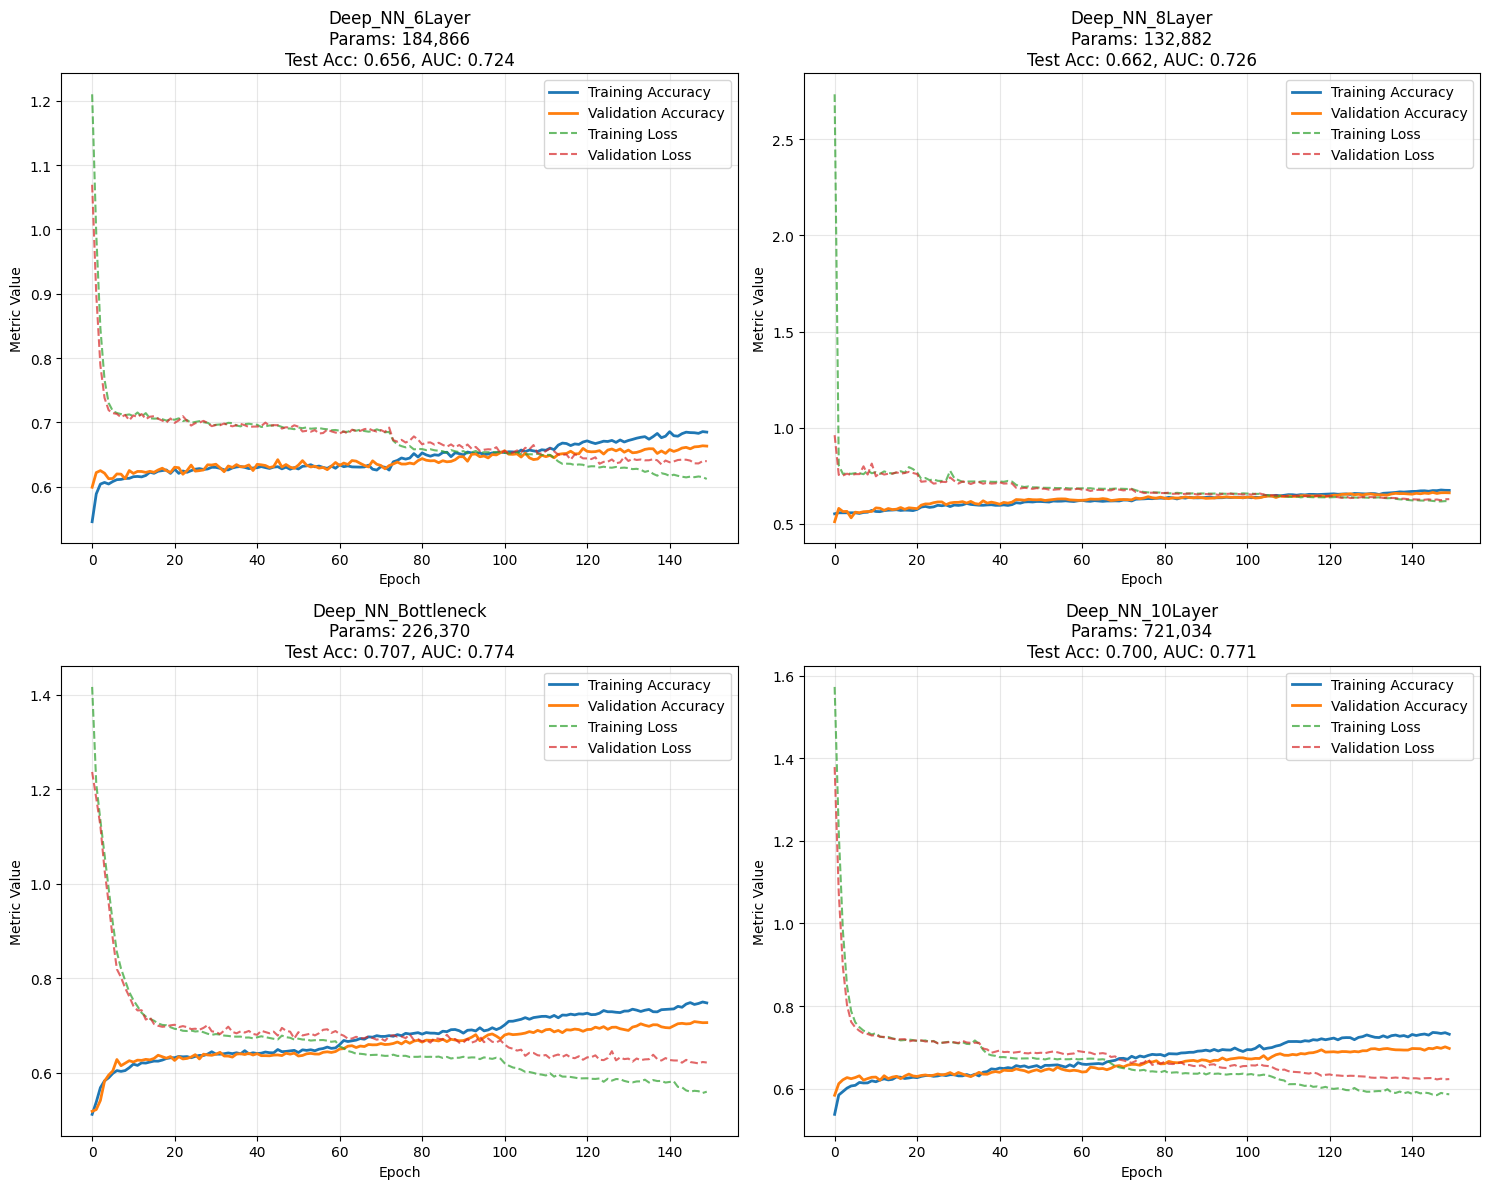


Deep Neural Networks Results:
                Model  Parameters  Layers  Test_Accuracy  Test_Loss  ROC_AUC  \
0      Deep_NN_6Layer      184866      14          0.656      0.635    0.724   
1      Deep_NN_8Layer      132882      27          0.662      0.623    0.726   
2  Deep_NN_Bottleneck      226370      19          0.707      0.620    0.774   
3     Deep_NN_10Layer      721034      21          0.700      0.622    0.771   

   Precision_0  Recall_0   F1_0  Precision_1  Recall_1   F1_1  Training_Epochs  
0        0.656     0.655  0.655        0.655     0.657  0.656              150  
1        0.639     0.744  0.687        0.693     0.580  0.631              150  
2        0.715     0.688  0.701        0.699     0.726  0.713              150  
3        0.701     0.698  0.699        0.699     0.702  0.700              150  

🎯 BEST DEEP MODEL: Deep_NN_Bottleneck
   ROC AUC: 0.774
   Accuracy: 0.707
   Parameters: 226,370
   Layers: 19
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
208/208

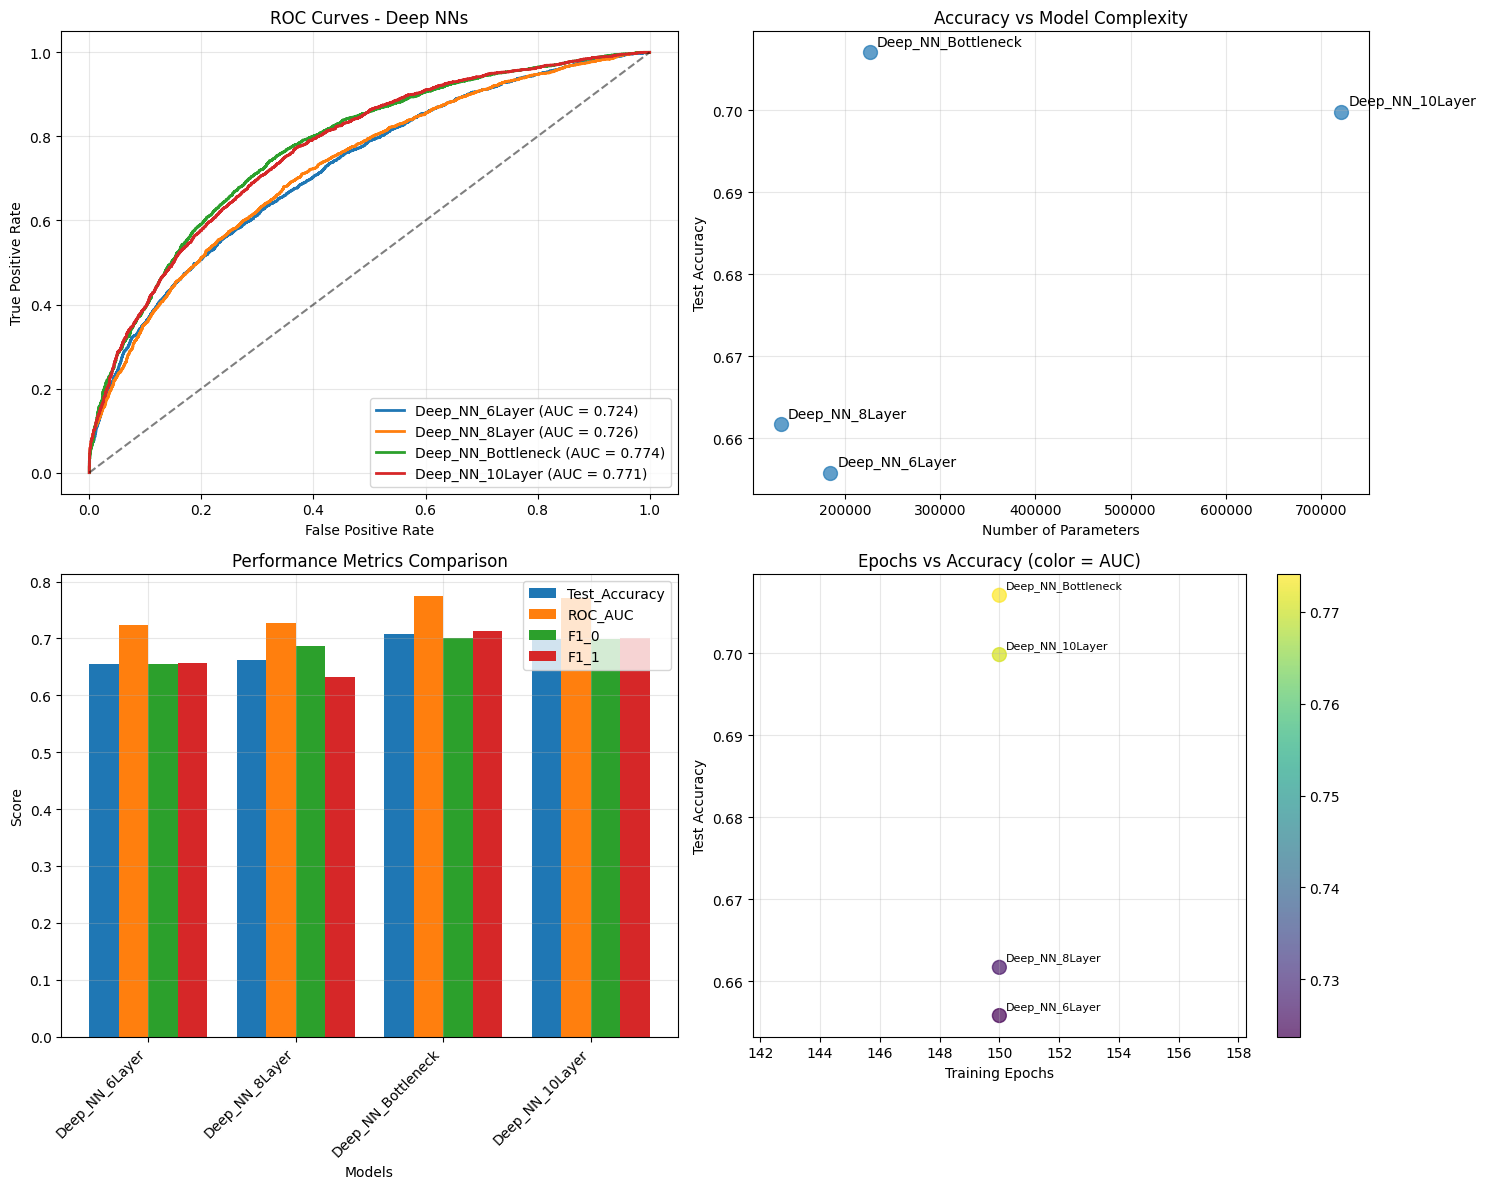

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


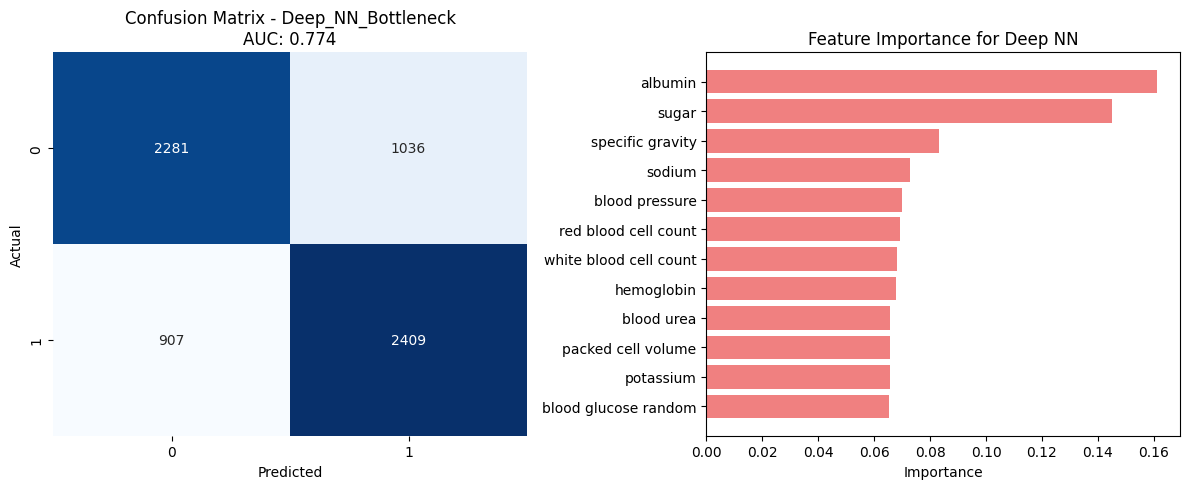


Detailed Deep Neural Networks Performance:
                Model  Parameters  Layers  Test_Accuracy  ROC_AUC   F1_0  \
0      Deep_NN_6Layer      184866      14          0.656    0.724  0.655   
1      Deep_NN_8Layer      132882      27          0.662    0.726  0.687   
2  Deep_NN_Bottleneck      226370      19          0.707    0.774  0.701   
3     Deep_NN_10Layer      721034      21          0.700    0.771  0.699   

    F1_1  Training_Epochs  
0  0.656              150  
1  0.631              150  
2  0.713              150  
3  0.700              150  

📊 Model Architecture Insights:
Average Parameters: 316,288
Average Layers: 20.2
Average Training Epochs: 150.0

🔍 Overfitting Analysis:
Deep_NN_6Layer: Train Acc 0.700 vs Test Acc 0.656 | Gap: 0.044
Deep_NN_8Layer: Train Acc 0.706 vs Test Acc 0.662 | Gap: 0.045
Deep_NN_Bottleneck: Train Acc 0.813 vs Test Acc 0.707 | Gap: 0.106
Deep_NN_10Layer: Train Acc 0.791 vs Test Acc 0.700 | Gap: 0.091


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)

    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()

    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Define deep neural network architectures
def create_deep_nn_1(input_dim):
    """Deep network with gradual decrease in units"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_2(input_dim):
    """Very deep network with residual-style connections"""
    model = Sequential([
        Dense(256, input_shape=(input_dim,), kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        Dense(256, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        Dense(128, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(128, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(64, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(32, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.1),

        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_3(input_dim):
    """Bottleneck architecture"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),  # Bottleneck
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(2, activation='softmax')
    ])
    return model

def create_deep_nn_4(input_dim):
    """Deep network with varying layer sizes"""
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.1),

        Dense(8, activation='relu'),
        Dropout(0.1),

        Dense(2, activation='softmax')
    ])
    return model

# Compile and train deep models
deep_models = {
    'Deep_NN_6Layer': create_deep_nn_1(X_train.shape[1]),
    'Deep_NN_8Layer': create_deep_nn_2(X_train.shape[1]),
    'Deep_NN_Bottleneck': create_deep_nn_3(X_train.shape[1]),
    'Deep_NN_10Layer': create_deep_nn_4(X_train.shape[1])
}

# Enhanced training configuration
epochs = 150
batch_size = 32

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1),
] + [
    ModelCheckpoint(f'best_{name}.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
    for name in deep_models.keys()
]

# Train and evaluate deep models
results_deep = []

plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(deep_models.items()):
    print(f"\n{'='*60}")
    print(f"Training {name}")
    print(f"Model Parameters: {model.count_params():,}")
    print(f"{'='*60}")

    # Custom optimizer for deeper networks
    if '10Layer' in name or 'Bottleneck' in name:
        optimizer = Adam(learning_rate=0.0005)
    else:
        optimizer = Adam(learning_rate=0.001)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
        ],
        verbose=1
    )

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_deep.append({
        'Model': name,
        'Parameters': model.count_params(),
        'Layers': len(model.layers),
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': len(history.history['loss'])
    })

    # Plot training history
    plt.subplot(2, 2, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
    plt.title(f'{name}\nParams: {model.count_params():,}\nTest Acc: {test_accuracy:.3f}, AUC: {roc_auc:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results analysis
results_df_deep = pd.DataFrame(results_deep)
print("\nDeep Neural Networks Results:")
print("="*70)
print(results_df_deep.round(3))

# Best deep model
best_deep = results_df_deep.loc[results_df_deep['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST DEEP MODEL: {best_deep['Model']}")
print(f"   ROC AUC: {best_deep['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_deep['Test_Accuracy']:.3f}")
print(f"   Parameters: {best_deep['Parameters']:,}")
print(f"   Layers: {best_deep['Layers']}")

# Comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC Curves
for i, (name, model) in enumerate(deep_models.items()):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

axes[0, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves - Deep NNs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Accuracy vs Model Complexity
axes[0, 1].scatter(results_df_deep['Parameters'], results_df_deep['Test_Accuracy'], s=100, alpha=0.7)
for i, row in results_df_deep.iterrows():
    axes[0, 1].annotate(row['Model'], (row['Parameters'], row['Test_Accuracy']),
                       xytext=(5, 5), textcoords='offset points')
axes[0, 1].set_xlabel('Number of Parameters')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].set_title('Accuracy vs Model Complexity')
axes[0, 1].grid(True, alpha=0.3)

# 3. Performance metrics comparison
metrics = ['Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1']
x = np.arange(len(results_df_deep))
width = 0.2

for j, metric in enumerate(metrics):
    values = results_df_deep[metric].values
    axes[1, 0].bar(x + j*width, values, width, label=metric)

axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Performance Metrics Comparison')
axes[1, 0].set_xticks(x + width*1.5)
axes[1, 0].set_xticklabels(results_df_deep['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Training epochs vs performance
scatter = axes[1, 1].scatter(results_df_deep['Training_Epochs'], results_df_deep['Test_Accuracy'],
                            c=results_df_deep['ROC_AUC'], s=100, cmap='viridis', alpha=0.7)
for i, row in results_df_deep.iterrows():
    axes[1, 1].annotate(row['Model'], (row['Training_Epochs'], row['Test_Accuracy']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Training Epochs')
axes[1, 1].set_ylabel('Test Accuracy')
axes[1, 1].set_title('Epochs vs Accuracy (color = AUC)')
plt.colorbar(scatter, ax=axes[1, 1])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix for best deep model
best_deep_model_name = best_deep['Model']
best_deep_model = deep_models[best_deep_model_name]
y_pred_best_deep = np.argmax(best_deep_model.predict(X_test), axis=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best_deep)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_deep_model_name}\nAUC: {best_deep["ROC_AUC"]:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': RandomForestClassifier(random_state=42).fit(X_processed, y_processed).feature_importances_
}).sort_values('Importance', ascending=True)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance for Deep NN')
plt.tight_layout()
plt.show()

# Final comparison table
print("\nDetailed Deep Neural Networks Performance:")
detailed_cols = ['Model', 'Parameters', 'Layers', 'Test_Accuracy', 'ROC_AUC',
                'F1_0', 'F1_1', 'Training_Epochs']
print(results_df_deep[detailed_cols].round(3))

# Model architecture insights
print("\n📊 Model Architecture Insights:")
print(f"Average Parameters: {results_df_deep['Parameters'].mean():,.0f}")
print(f"Average Layers: {results_df_deep['Layers'].mean():.1f}")
print(f"Average Training Epochs: {results_df_deep['Training_Epochs'].mean():.1f}")

# Check for overfitting
print("\n🔍 Overfitting Analysis:")
for i, row in results_df_deep.iterrows():
    model = deep_models[row['Model']]
    train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
    test_loss, test_acc = row['Test_Loss'], row['Test_Accuracy']
    overfit_gap = train_acc - test_acc
    print(f"{row['Model']}: Train Acc {train_acc:.3f} vs Test Acc {test_acc:.3f} | Gap: {overfit_gap:.3f}")

# Bottleneck more layer added with runtime and size

TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

MODEL ARCHITECTURES AND SIZES

Enhanced_Bottleneck_16L:
Total layers: 43
Total parameters: 1,076,274

Layer details:
  Layer 1: Dense - 1024 units
  Layer 2: BatchNormalization - N/A units
  Layer 3: Dropout - N/A units
  Layer 4: Dense - 512 units
  Layer 5: BatchNormalization - N/A units
  Layer 6: Dropout - N/A units
  Layer 7: Dense - 256 units
  Layer 8: BatchNormalization - N/A units
  Layer 9: Dropout - N/A units
  Layer 10: Dense - 128 units
  Layer 11: BatchNormalization - N/A units
  Layer 12: Dropout - N/A units
  Layer 13: Dense - 64 units
  Layer 14: BatchNormalization - N/A units
  Layer 15: Dropout - N/A units
  Layer 16: Dense - 32 units
  L

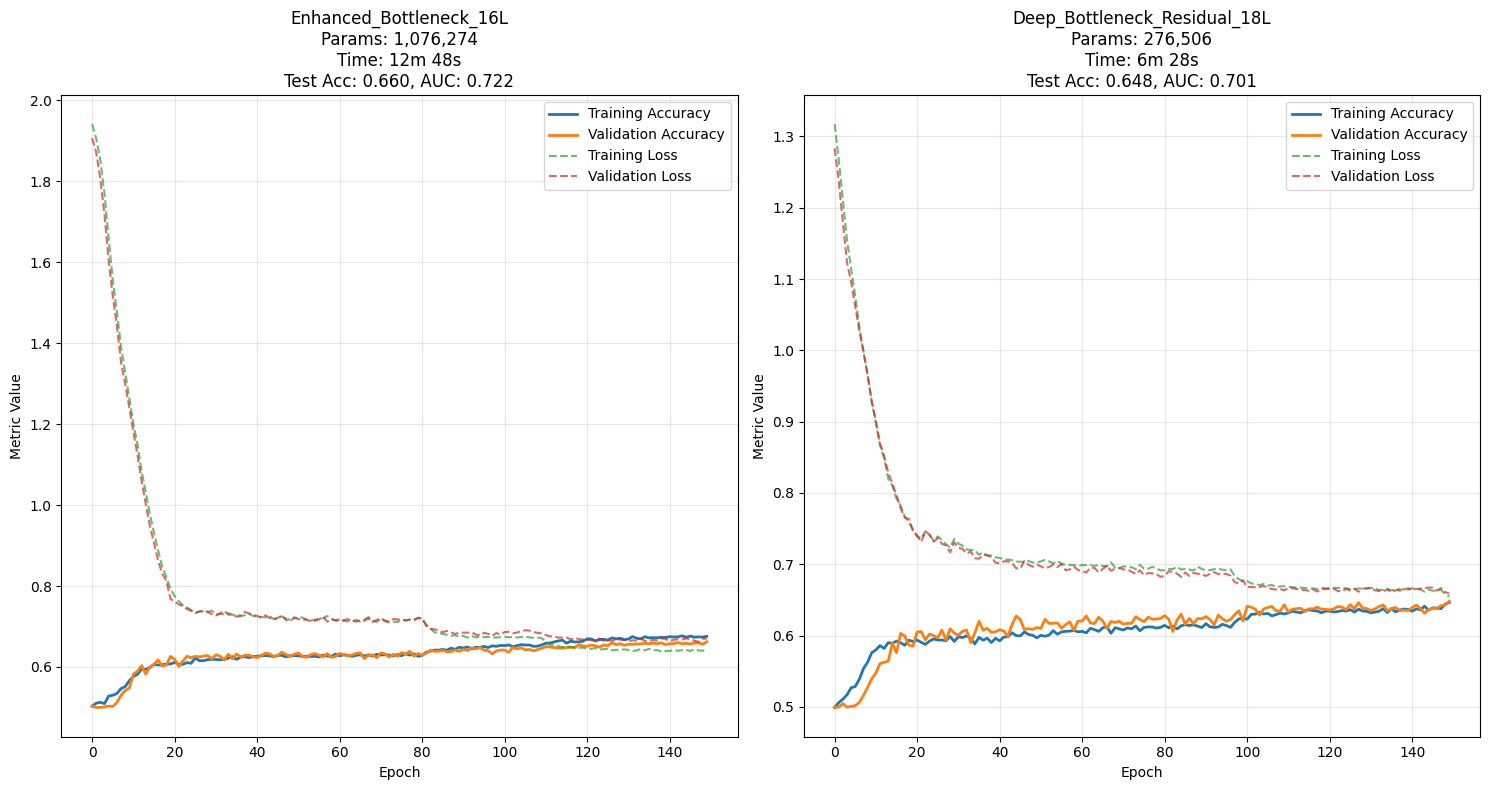


Enhanced Bottleneck Models Results:
                          Model  Parameters  Layers  Training_Time_Seconds  \
0       Enhanced_Bottleneck_16L     1076274      43                768.881   
1  Deep_Bottleneck_Residual_18L      276506      56                388.918   

  Training_Time_Formatted  Test_Accuracy  Test_Loss  ROC_AUC  Precision_0  \
0                 12m 48s          0.660      0.662    0.722        0.667   
1                  6m 28s          0.648      0.659    0.701        0.650   

   Recall_0   F1_0  Precision_1  Recall_1   F1_1  Training_Epochs  
0     0.638  0.652        0.653     0.681  0.667              150  
1     0.643  0.646        0.647     0.654  0.650              150  

🎯 BEST ENHANCED BOTTLENECK MODEL: Enhanced_Bottleneck_16L
   ROC AUC: 0.722
   Accuracy: 0.660
   Parameters: 1,076,274
   Layers: 43
   Training Time: 12m 48s


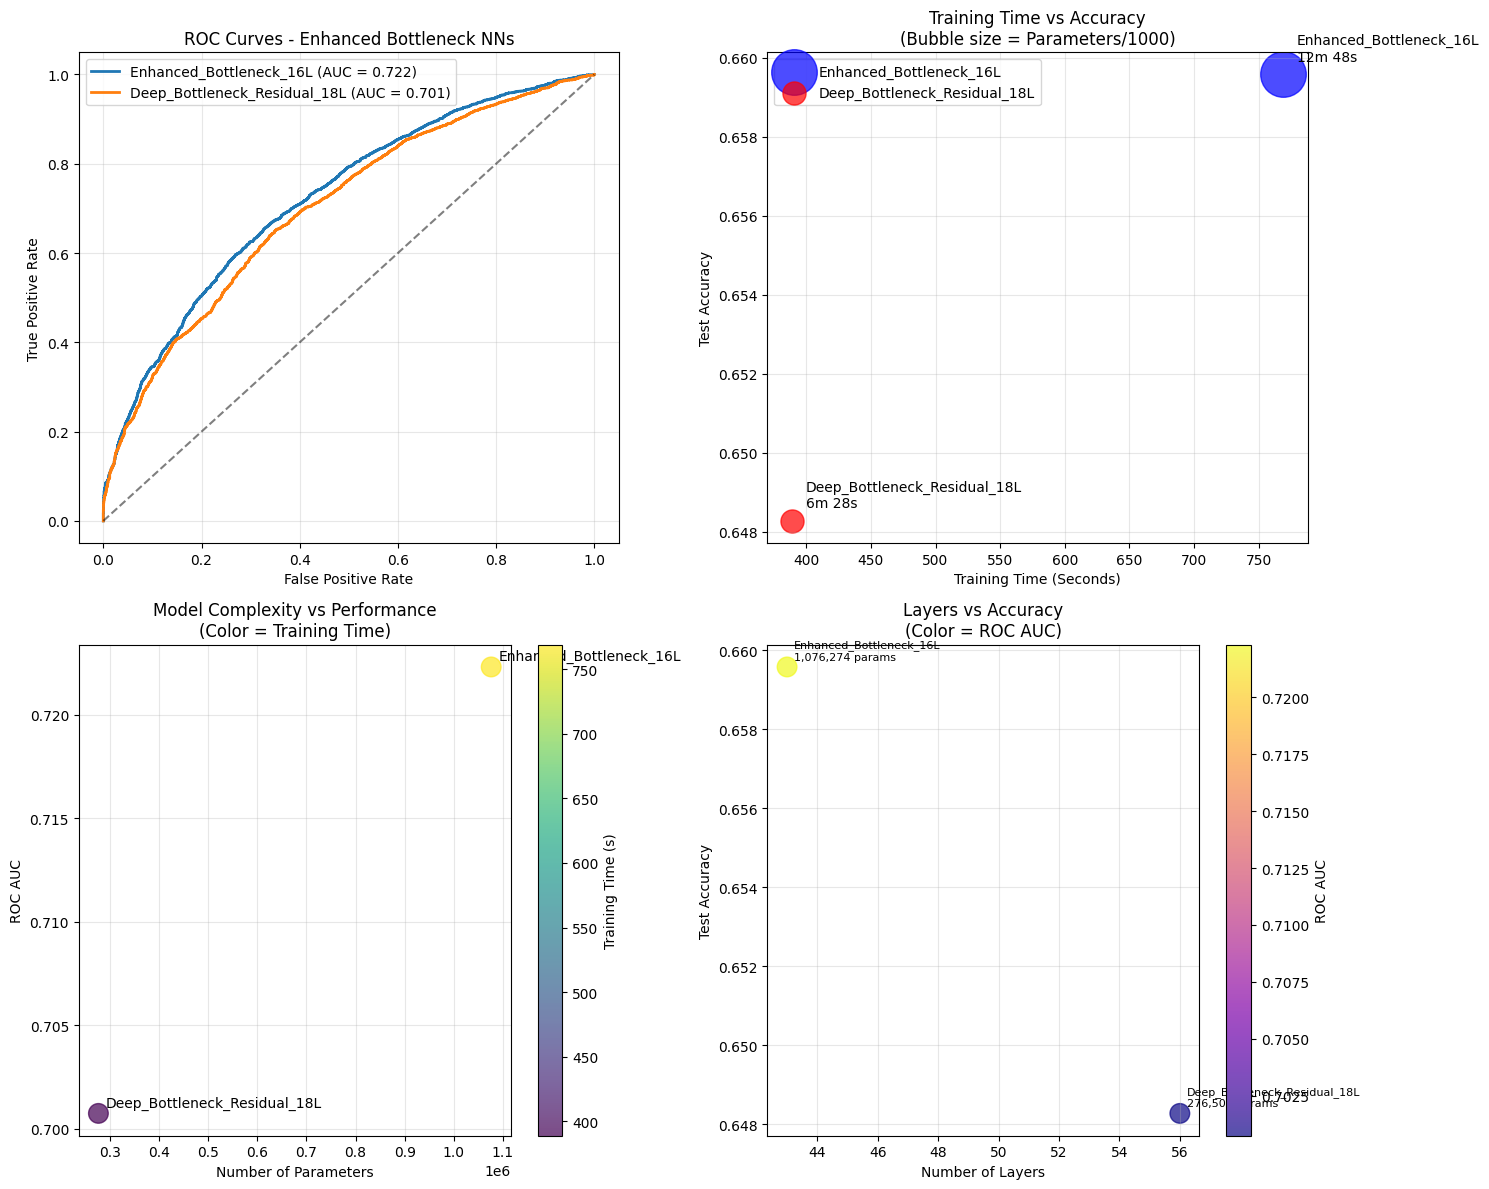

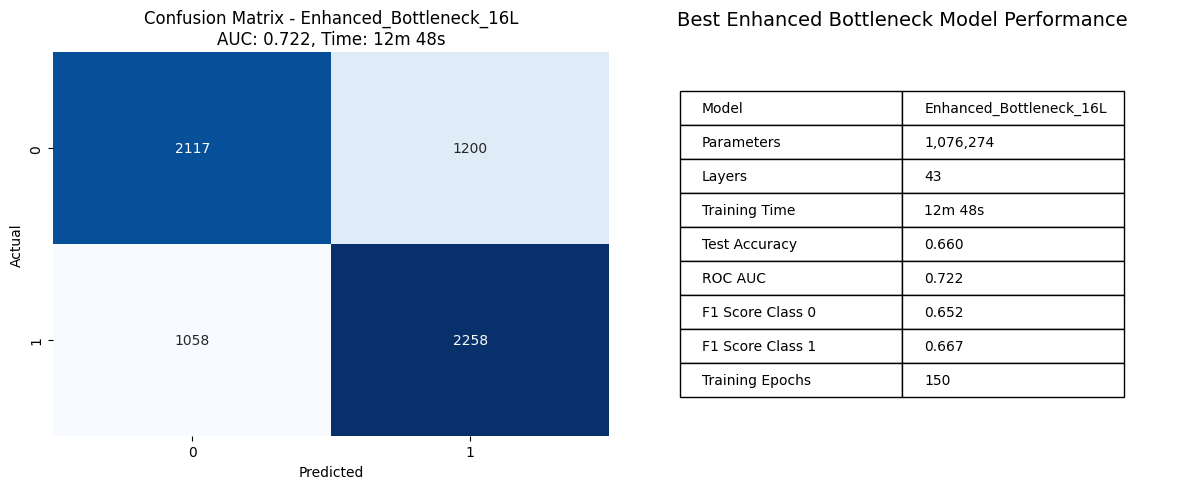


📊 ENHANCED BOTTLENECK MODELS - DETAILED PERFORMANCE:
                          Model  Layers  Parameters Training_Time_Formatted  \
0       Enhanced_Bottleneck_16L      43     1076274                 12m 48s   
1  Deep_Bottleneck_Residual_18L      56      276506                  6m 28s   

   Test_Accuracy  ROC_AUC   F1_0   F1_1  Training_Epochs  
0          0.660    0.722  0.652  0.667              150  
1          0.648    0.701  0.646  0.650              150  

⚡ EFFICIENCY ANALYSIS:
Enhanced_Bottleneck_16L:
  Efficiency: 0.0564 AUC per training minute
  Parameters per layer: 25,030
  Performance-to-size ratio: 0.6711
Deep_Bottleneck_Residual_18L:
  Efficiency: 0.1081 AUC per training minute
  Parameters per layer: 4,938
  Performance-to-size ratio: 2.5343

🏆 BEST OVERALL: Enhanced_Bottleneck_16L
   Achieved 0.722 AUC in 12m 48s
   With 1,076,274 parameters across 43 layers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import time
from datetime import datetime

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)

    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()

    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

def create_enhanced_bottleneck(input_dim):
    """Enhanced bottleneck architecture with more layers and skip connections"""
    model = Sequential([
        # Encoder - Expanding
        Dense(1024, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Bottleneck - Compressed representation
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu', name='bottleneck'),  # Main bottleneck
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),  # Additional compression
        BatchNormalization(),
        Dropout(0.2),

        # Decoder - Expanding back
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Final layers
        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.1),

        Dense(16, activation='relu'),
        Dropout(0.1),

        Dense(2, activation='softmax')
    ])
    return model

def create_deep_bottleneck_residual(input_dim):
    """Very deep bottleneck with residual-inspired architecture"""
    model = Sequential([
        # Input and first expansion
        Dense(512, input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        # First compression block
        Dense(256, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        Dense(128, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        # Bottleneck core - highly compressed
        Dense(64, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(32, name='bottleneck_core'),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(16),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        # Expansion back
        Dense(32),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(256),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.4),

        Dense(128),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.3),

        Dense(64),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        Dense(32),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.2),

        # Output preparation
        Dense(16, activation='relu'),
        Dropout(0.1),

        Dense(8, activation='relu'),

        Dense(2, activation='softmax')
    ])
    return model

# Create enhanced bottleneck models
enhanced_models = {
    'Enhanced_Bottleneck_16L': create_enhanced_bottleneck(X_train.shape[1]),
    'Deep_Bottleneck_Residual_18L': create_deep_bottleneck_residual(X_train.shape[1])
}

# Print model architectures and sizes
print("\n" + "="*70)
print("MODEL ARCHITECTURES AND SIZES")
print("="*70)

for name, model in enhanced_models.items():
    model.build((None, X_train.shape[1]))
    print(f"\n{name}:")
    print(f"Total layers: {len(model.layers)}")
    print(f"Total parameters: {model.count_params():,}")

    # Print layer details
    print("\nLayer details:")
    for i, layer in enumerate(model.layers):
        print(f"  Layer {i+1}: {layer.__class__.__name__} - {layer.units if hasattr(layer, 'units') else 'N/A'} units")

    print("-" * 50)

# Training configuration
epochs = 150
batch_size = 32

# Train and evaluate enhanced models with timing
results_enhanced = []

plt.figure(figsize=(15, 8))

for i, (name, model) in enumerate(enhanced_models.items()):
    print(f"\n{'='*70}")
    print(f"Training {name}")
    print(f"Model Parameters: {model.count_params():,}")
    print(f"Total Layers: {len(model.layers)}")
    print(f"{'='*70}")

    # Compile model with appropriate learning rate
    optimizer = Adam(learning_rate=0.0005)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Start timing
    start_time = time.time()

    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=12, min_lr=1e-7, verbose=1)
        ],
        verbose=1
    )

    # End timing
    training_time = time.time() - start_time
    minutes = int(training_time // 60)
    seconds = int(training_time % 60)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results with timing information
    results_enhanced.append({
        'Model': name,
        'Parameters': model.count_params(),
        'Layers': len(model.layers),
        'Training_Time_Seconds': training_time,
        'Training_Time_Formatted': f"{minutes}m {seconds}s",
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': len(history.history['loss'])
    })

    # Plot training history
    plt.subplot(1, 2, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
    plt.title(f'{name}\nParams: {model.count_params():,}\nTime: {minutes}m {seconds}s\nTest Acc: {test_accuracy:.3f}, AUC: {roc_auc:.3f}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Results analysis
results_df_enhanced = pd.DataFrame(results_enhanced)
print("\nEnhanced Bottleneck Models Results:")
print("="*80)
print(results_df_enhanced.round(3))

# Best enhanced model
best_enhanced = results_df_enhanced.loc[results_df_enhanced['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST ENHANCED BOTTLENECK MODEL: {best_enhanced['Model']}")
print(f"   ROC AUC: {best_enhanced['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_enhanced['Test_Accuracy']:.3f}")
print(f"   Parameters: {best_enhanced['Parameters']:,}")
print(f"   Layers: {best_enhanced['Layers']}")
print(f"   Training Time: {best_enhanced['Training_Time_Formatted']}")

# Comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC Curves
for i, (name, model) in enumerate(enhanced_models.items()):
    y_pred_proba = model.predict(X_test, verbose=0)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

axes[0, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves - Enhanced Bottleneck NNs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Training Time vs Performance
colors = ['blue', 'red']
for i, row in results_df_enhanced.iterrows():
    axes[0, 1].scatter(row['Training_Time_Seconds'], row['Test_Accuracy'],
                      s=row['Parameters']/1000, alpha=0.7, color=colors[i],
                      label=row['Model'])
    axes[0, 1].annotate(f"{row['Model']}\n{row['Training_Time_Formatted']}",
                       (row['Training_Time_Seconds'], row['Test_Accuracy']),
                       xytext=(10, 10), textcoords='offset points')
axes[0, 1].set_xlabel('Training Time (Seconds)')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].set_title('Training Time vs Accuracy\n(Bubble size = Parameters/1000)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Model Complexity vs Performance
axes[1, 0].scatter(results_df_enhanced['Parameters'], results_df_enhanced['ROC_AUC'],
                  c=results_df_enhanced['Training_Time_Seconds'], s=200, cmap='viridis', alpha=0.7)
for i, row in results_df_enhanced.iterrows():
    axes[1, 0].annotate(row['Model'], (row['Parameters'], row['ROC_AUC']),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 0].set_xlabel('Number of Parameters')
axes[1, 0].set_ylabel('ROC AUC')
axes[1, 0].set_title('Model Complexity vs Performance\n(Color = Training Time)')
plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0], label='Training Time (s)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Layers vs Performance
axes[1, 1].scatter(results_df_enhanced['Layers'], results_df_enhanced['Test_Accuracy'],
                  c=results_df_enhanced['ROC_AUC'], s=200, cmap='plasma', alpha=0.7)
for i, row in results_df_enhanced.iterrows():
    axes[1, 1].annotate(f"{row['Model']}\n{row['Parameters']:,} params",
                       (row['Layers'], row['Test_Accuracy']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Number of Layers')
axes[1, 1].set_ylabel('Test Accuracy')
axes[1, 1].set_title('Layers vs Accuracy\n(Color = ROC AUC)')
plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1], label='ROC AUC')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix for best enhanced model
best_enhanced_model_name = best_enhanced['Model']
best_enhanced_model = enhanced_models[best_enhanced_model_name]
y_pred_best_enhanced = np.argmax(best_enhanced_model.predict(X_test, verbose=0), axis=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best_enhanced)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_enhanced_model_name}\nAUC: {best_enhanced["ROC_AUC"]:.3f}, Time: {best_enhanced["Training_Time_Formatted"]}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Performance summary table
plt.subplot(1, 2, 2)
plt.axis('off')
performance_data = [
    ["Model", best_enhanced['Model']],
    ["Parameters", f"{best_enhanced['Parameters']:,}"],
    ["Layers", best_enhanced['Layers']],
    ["Training Time", best_enhanced['Training_Time_Formatted']],
    ["Test Accuracy", f"{best_enhanced['Test_Accuracy']:.3f}"],
    ["ROC AUC", f"{best_enhanced['ROC_AUC']:.3f}"],
    ["F1 Score Class 0", f"{best_enhanced['F1_0']:.3f}"],
    ["F1 Score Class 1", f"{best_enhanced['F1_1']:.3f}"],
    ["Training Epochs", best_enhanced['Training_Epochs']]
]

table = plt.table(cellText=performance_data,
                 cellLoc='left',
                 loc='center',
                 bbox=[0.1, 0.1, 0.8, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('Best Enhanced Bottleneck Model Performance', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

# Final detailed comparison
print("\n📊 ENHANCED BOTTLENECK MODELS - DETAILED PERFORMANCE:")
print("="*90)
detailed_cols = ['Model', 'Layers', 'Parameters', 'Training_Time_Formatted',
                'Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1', 'Training_Epochs']
print(results_df_enhanced[detailed_cols].round(3))

# Efficiency analysis
print("\n⚡ EFFICIENCY ANALYSIS:")
print("="*50)
for i, row in results_df_enhanced.iterrows():
    efficiency = row['ROC_AUC'] / (row['Training_Time_Seconds'] / 60)  # AUC per minute
    params_per_layer = row['Parameters'] / row['Layers']
    print(f"{row['Model']}:")
    print(f"  Efficiency: {efficiency:.4f} AUC per training minute")
    print(f"  Parameters per layer: {params_per_layer:,.0f}")
    print(f"  Performance-to-size ratio: {row['ROC_AUC'] / (row['Parameters'] / 1e6):.4f}")

print(f"\n🏆 BEST OVERALL: {best_enhanced['Model']}")
print(f"   Achieved {best_enhanced['ROC_AUC']:.3f} AUC in {best_enhanced['Training_Time_Formatted']}")
print(f"   With {best_enhanced['Parameters']:,} parameters across {best_enhanced['Layers']} layers")

# bottleneck with epoch-500 and early stop


TensorFlow Version: 2.20.0
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Training set: (26531, 12), Test set: (6633, 12)

ENHANCED BOTTLENECK ARCHITECTURE - SIZE AND RUNTIME ANALYSIS
Input shape: 12
Total layers: 19
Total parameters: 226,370
Model size: 0.23 Million parameters
Model creation time: 0.05 seconds
Estimated parameter memory: 0.86 MB

Layer details (Parameters per layer):
  Layer 1: Dense - 512 units | ~8,704 parameters
  Layer 2: BatchNormalization
  Layer 3: Dropout
  Layer 4: Dense - 256 units | ~4,352 parameters
  Layer 5: BatchNormalization
  Layer 6: Dropout
  Layer 7: Dense - 128 units | ~2,176 parameters
  Layer 8: BatchNormalization
  Layer 9: Dropout
  Layer 10: Dense - 64 units | ~1,088 parameters
  Layer 11: BatchNormalization
  Layer 12: Dropout
  Laye

830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5197 - loss: 1.3926 - precision: 0.5197 - recall: 0.5197 - val_accuracy: 0.5192 - val_loss: 1.2304 - val_precision: 0.5193 - val_recall: 0.5192 - learning_rate: 5.0000e-04
Epoch 2/500
807/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 1.2326 - precision: 0.5333 - recall: 0.5333
Epoch 2: val_accuracy did not improve from 0.51922
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5429 - loss: 1.2084 - precision: 0.5429 - recall: 0.5429 - val_accuracy: 0.5150 - val_loss: 1.1851 - val_precision: 0.5150 - val_recall: 0.5150 - learning_rate: 5.0000e-04
Epoch 3/500
808/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 1.1566 - precision: 0.5635 - recall: 0.5635
Epoch 3: val_accuracy improved from 0.51922 to 0.53581, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5713 - loss: 1.1385 - precision: 0.5713 - recall: 0.5713 - val_accuracy: 0.5358 - val_loss: 1.1303 - val_precision: 0.5358 - val_recall: 0.5358 - learning_rate: 5.0000e-04
Epoch 4/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5739 - loss: 1.0919 - precision: 0.5739 - recall: 0.5739
Epoch 4: val_accuracy improved from 0.53581 to 0.57546, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5819 - loss: 1.0714 - precision: 0.5819 - recall: 0.5819 - val_accuracy: 0.5755 - val_loss: 1.0491 - val_precision: 0.5755 - val_recall: 0.5755 - learning_rate: 5.0000e-04
Epoch 5/500
801/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 1.0192 - precision: 0.5824 - recall: 0.5824
Epoch 5: val_accuracy improved from 0.57546 to 0.60531, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5896 - loss: 0.9988 - precision: 0.5896 - recall: 0.5896 - val_accuracy: 0.6053 - val_loss: 0.9594 - val_precision: 0.6053 - val_recall: 0.6053 - learning_rate: 5.0000e-04
Epoch 6/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5891 - loss: 0.9516 - precision: 0.5891 - recall: 0.5891
Epoch 6: val_accuracy improved from 0.60531 to 0.61149, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6004 - loss: 0.9317 - precision: 0.6004 - recall: 0.6004 - val_accuracy: 0.6115 - val_loss: 0.8947 - val_precision: 0.6115 - val_recall: 0.6115 - learning_rate: 5.0000e-04
Epoch 7/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.8897 - precision: 0.5952 - recall: 0.5952
Epoch 7: val_accuracy improved from 0.61149 to 0.61888, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5999 - loss: 0.8744 - precision: 0.5999 - recall: 0.5999 - val_accuracy: 0.6189 - val_loss: 0.8423 - val_precision: 0.6189 - val_recall: 0.6189 - learning_rate: 5.0000e-04
Epoch 8/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6051 - loss: 0.8373 - precision: 0.6051 - recall: 0.6051
Epoch 8: val_accuracy improved from 0.61888 to 0.62476, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6079 - loss: 0.8262 - precision: 0.6079 - recall: 0.6079 - val_accuracy: 0.6248 - val_loss: 0.7953 - val_precision: 0.6248 - val_recall: 0.6248 - learning_rate: 5.0000e-04
Epoch 9/500
810/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6064 - loss: 0.8005 - precision: 0.6064 - recall: 0.6064
Epoch 9: val_accuracy improved from 0.62476 to 0.63094, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6091 - loss: 0.7899 - precision: 0.6091 - recall: 0.6091 - val_accuracy: 0.6309 - val_loss: 0.7592 - val_precision: 0.6309 - val_recall: 0.6309 - learning_rate: 5.0000e-04
Epoch 10/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.7702 - precision: 0.6036 - recall: 0.6036
Epoch 10: val_accuracy did not improve from 0.63094
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6093 - loss: 0.7631 - precision: 0.6093 - recall: 0.6093 - val_accuracy: 0.6251 - val_loss: 0.7459 - val_precision: 0.6251 - val_recall: 0.6251 - learning_rate: 5.0000e-04
Epoch 11/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6081 - loss: 0.7495 - precision: 0.6081 - recall: 0.6081
Epoch 11: val_accuracy did not improve from 0.63094
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6127 - loss: 0.7429 - precision: 0.6127 - recall: 0.6127 - val_accuracy: 0.6293 - val_loss: 0.7312 - val_precision: 0.6293 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6290 - loss: 0.7015 - precision: 0.6290 - recall: 0.6290 - val_accuracy: 0.6333 - val_loss: 0.7018 - val_precision: 0.6333 - val_recall: 0.6333 - learning_rate: 5.0000e-04
Epoch 17/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 0.7087 - precision: 0.6244 - recall: 0.6244
Epoch 17: val_accuracy improved from 0.63335 to 0.63350, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6269 - loss: 0.7039 - precision: 0.6269 - recall: 0.6269 - val_accuracy: 0.6335 - val_loss: 0.6984 - val_precision: 0.6335 - val_recall: 0.6335 - learning_rate: 5.0000e-04
Epoch 18/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6245 - loss: 0.7039 - precision: 0.6245 - recall: 0.6245
Epoch 18: val_accuracy did not improve from 0.63350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6264 - loss: 0.6986 - precision: 0.6264 - recall: 0.6264 - val_accuracy: 0.6261 - val_loss: 0.7048 - val_precision: 0.6261 - val_recall: 0.6261 - learning_rate: 5.0000e-04
Epoch 19/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6236 - loss: 0.7023 - precision: 0.6236 - recall: 0.6236
Epoch 19: val_accuracy did not improve from 0.63350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6290 - loss: 0.6974 - precision: 0.6290 - recall: 0.6290 - val_accuracy: 0.6264 - val_loss: 0.6962 - val_precision: 0.6264 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6310 - loss: 0.6924 - precision: 0.6310 - recall: 0.6310 - val_accuracy: 0.6353 - val_loss: 0.6936 - val_precision: 0.6353 - val_recall: 0.6353 - learning_rate: 5.0000e-04
Epoch 23/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.6900 - precision: 0.6330 - recall: 0.6330
Epoch 23: val_accuracy did not improve from 0.63531
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6354 - loss: 0.6889 - precision: 0.6354 - recall: 0.6354 - val_accuracy: 0.6336 - val_loss: 0.6963 - val_precision: 0.6336 - val_recall: 0.6336 - learning_rate: 5.0000e-04
Epoch 24/500
799/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 0.6879 - precision: 0.6336 - recall: 0.6336
Epoch 24: val_accuracy improved from 0.63531 to 0.63908, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6359 - loss: 0.6854 - precision: 0.6359 - recall: 0.6359 - val_accuracy: 0.6391 - val_loss: 0.6913 - val_precision: 0.6391 - val_recall: 0.6391 - learning_rate: 5.0000e-04
Epoch 25/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.6873 - precision: 0.6327 - recall: 0.6327
Epoch 25: val_accuracy did not improve from 0.63908
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6365 - loss: 0.6846 - precision: 0.6365 - recall: 0.6365 - val_accuracy: 0.6294 - val_loss: 0.6925 - val_precision: 0.6294 - val_recall: 0.6294 - learning_rate: 5.0000e-04
Epoch 26/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.6872 - precision: 0.6315 - recall: 0.6315
Epoch 26: val_accuracy did not improve from 0.63908
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6350 - loss: 0.6826 - precision: 0.6350 - recall: 0.6350 - val_accuracy: 0.6311 - val_loss: 0.6961 - val_precision: 0.6311 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6405 - loss: 0.6828 - precision: 0.6405 - recall: 0.6405 - val_accuracy: 0.6397 - val_loss: 0.6879 - val_precision: 0.6397 - val_recall: 0.6397 - learning_rate: 5.0000e-04
Epoch 29/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 0.6836 - precision: 0.6324 - recall: 0.6324
Epoch 29: val_accuracy did not improve from 0.63968
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6360 - loss: 0.6824 - precision: 0.6360 - recall: 0.6360 - val_accuracy: 0.6379 - val_loss: 0.6947 - val_precision: 0.6379 - val_recall: 0.6379 - learning_rate: 5.0000e-04
Epoch 30/500
812/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.6835 - precision: 0.6386 - recall: 0.6386
Epoch 30: val_accuracy did not improve from 0.63968
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6394 - loss: 0.6811 - precision: 0.6394 - recall: 0.6394 - val_accuracy: 0.6388 - val_loss: 0.6912 - val_precision: 0.6388 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6412 - loss: 0.6798 - precision: 0.6412 - recall: 0.6412 - val_accuracy: 0.6400 - val_loss: 0.6890 - val_precision: 0.6400 - val_recall: 0.6400 - learning_rate: 5.0000e-04
Epoch 35/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6837 - precision: 0.6432 - recall: 0.6432
Epoch 35: val_accuracy did not improve from 0.63998
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6431 - loss: 0.6804 - precision: 0.6431 - recall: 0.6431 - val_accuracy: 0.6385 - val_loss: 0.6836 - val_precision: 0.6385 - val_recall: 0.6385 - learning_rate: 5.0000e-04
Epoch 36/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6393 - loss: 0.6798 - precision: 0.6393 - recall: 0.6393
Epoch 36: val_accuracy improved from 0.63998 to 0.64224, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6384 - loss: 0.6780 - precision: 0.6384 - recall: 0.6384 - val_accuracy: 0.6422 - val_loss: 0.6888 - val_precision: 0.6422 - val_recall: 0.6422 - learning_rate: 5.0000e-04
Epoch 37/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - loss: 0.6791 - precision: 0.6429 - recall: 0.6429
Epoch 37: val_accuracy improved from 0.64224 to 0.64285, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6450 - loss: 0.6748 - precision: 0.6450 - recall: 0.6450 - val_accuracy: 0.6428 - val_loss: 0.6840 - val_precision: 0.6428 - val_recall: 0.6428 - learning_rate: 5.0000e-04
Epoch 38/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 0.6857 - precision: 0.6381 - recall: 0.6381
Epoch 38: val_accuracy did not improve from 0.64285
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6432 - loss: 0.6811 - precision: 0.6432 - recall: 0.6432 - val_accuracy: 0.6427 - val_loss: 0.6812 - val_precision: 0.6427 - val_recall: 0.6427 - learning_rate: 5.0000e-04
Epoch 39/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 0.6811 - precision: 0.6387 - recall: 0.6387
Epoch 39: val_accuracy did not improve from 0.64285
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6415 - loss: 0.6771 - precision: 0.6415 - recall: 0.6415 - val_accuracy: 0.6413 - val_loss: 0.6866 - val_precision: 0.6413 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6455 - loss: 0.6756 - precision: 0.6455 - recall: 0.6455 - val_accuracy: 0.6456 - val_loss: 0.6901 - val_precision: 0.6456 - val_recall: 0.6456 - learning_rate: 5.0000e-04
Epoch 44/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 0.6769 - precision: 0.6467 - recall: 0.6467
Epoch 44: val_accuracy did not improve from 0.64556
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6471 - loss: 0.6738 - precision: 0.6471 - recall: 0.6471 - val_accuracy: 0.6389 - val_loss: 0.6811 - val_precision: 0.6389 - val_recall: 0.6389 - learning_rate: 5.0000e-04
Epoch 45/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 0.6750 - precision: 0.6472 - recall: 0.6472
Epoch 45: val_accuracy did not improve from 0.64556
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6468 - loss: 0.6723 - precision: 0.6468 - recall: 0.6468 - val_accuracy: 0.6412 - val_loss: 0.6851 - val_precision: 0.6412 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6484 - loss: 0.6738 - precision: 0.6484 - recall: 0.6484 - val_accuracy: 0.6457 - val_loss: 0.6885 - val_precision: 0.6457 - val_recall: 0.6457 - learning_rate: 5.0000e-04
Epoch 48/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - loss: 0.6731 - precision: 0.6474 - recall: 0.6474
Epoch 48: val_accuracy improved from 0.64571 to 0.64586, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6509 - loss: 0.6713 - precision: 0.6509 - recall: 0.6509 - val_accuracy: 0.6459 - val_loss: 0.6833 - val_precision: 0.6459 - val_recall: 0.6459 - learning_rate: 5.0000e-04
Epoch 49/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - loss: 0.6752 - precision: 0.6441 - recall: 0.6441
Epoch 49: val_accuracy improved from 0.64586 to 0.64707, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6488 - loss: 0.6724 - precision: 0.6488 - recall: 0.6488 - val_accuracy: 0.6471 - val_loss: 0.6792 - val_precision: 0.6471 - val_recall: 0.6471 - learning_rate: 5.0000e-04
Epoch 50/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 0.6778 - precision: 0.6443 - recall: 0.6443
Epoch 50: val_accuracy did not improve from 0.64707
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6478 - loss: 0.6727 - precision: 0.6478 - recall: 0.6478 - val_accuracy: 0.6469 - val_loss: 0.6777 - val_precision: 0.6469 - val_recall: 0.6469 - learning_rate: 5.0000e-04
Epoch 51/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - loss: 0.6754 - precision: 0.6488 - recall: 0.6488
Epoch 51: val_accuracy improved from 0.64707 to 0.64782, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6546 - loss: 0.6701 - precision: 0.6546 - recall: 0.6546 - val_accuracy: 0.6478 - val_loss: 0.6958 - val_precision: 0.6478 - val_recall: 0.6478 - learning_rate: 5.0000e-04
Epoch 52/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.6776 - precision: 0.6481 - recall: 0.6481
Epoch 52: val_accuracy improved from 0.64782 to 0.65038, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6514 - loss: 0.6733 - precision: 0.6514 - recall: 0.6514 - val_accuracy: 0.6504 - val_loss: 0.6915 - val_precision: 0.6504 - val_recall: 0.6504 - learning_rate: 5.0000e-04
Epoch 53/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.6777 - precision: 0.6476 - recall: 0.6476
Epoch 53: val_accuracy did not improve from 0.65038
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6511 - loss: 0.6739 - precision: 0.6511 - recall: 0.6511 - val_accuracy: 0.6450 - val_loss: 0.6887 - val_precision: 0.6450 - val_recall: 0.6450 - learning_rate: 5.0000e-04
Epoch 54/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 0.6731 - precision: 0.6507 - recall: 0.6507
Epoch 54: val_accuracy did not improve from 0.65038
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6519 - loss: 0.6688 - precision: 0.6519 - recall: 0.6519 - val_accuracy: 0.6425 - val_loss: 0.6806 - val_precision: 0.6425 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6629 - loss: 0.6531 - precision: 0.6629 - recall: 0.6629 - val_accuracy: 0.6531 - val_loss: 0.6811 - val_precision: 0.6531 - val_recall: 0.6531 - learning_rate: 2.5000e-04
Epoch 68/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.6542 - precision: 0.6602 - recall: 0.6602
Epoch 68: val_accuracy did not improve from 0.65310
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6652 - loss: 0.6480 - precision: 0.6652 - recall: 0.6652 - val_accuracy: 0.6516 - val_loss: 0.6775 - val_precision: 0.6516 - val_recall: 0.6516 - learning_rate: 2.5000e-04
Epoch 69/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6672 - loss: 0.6461 - precision: 0.6672 - recall: 0.6672
Epoch 69: val_accuracy did not improve from 0.65310
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6683 - loss: 0.6431 - precision: 0.6683 - recall: 0.6683 - val_accuracy: 0.6531 - val_loss: 0.6828 - val_precision: 0.6531 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6732 - loss: 0.6424 - precision: 0.6732 - recall: 0.6732 - val_accuracy: 0.6572 - val_loss: 0.6654 - val_precision: 0.6572 - val_recall: 0.6572 - learning_rate: 2.5000e-04
Epoch 71/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - loss: 0.6407 - precision: 0.6715 - recall: 0.6715
Epoch 71: val_accuracy improved from 0.65717 to 0.66049, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6723 - loss: 0.6395 - precision: 0.6723 - recall: 0.6723 - val_accuracy: 0.6605 - val_loss: 0.6692 - val_precision: 0.6605 - val_recall: 0.6605 - learning_rate: 2.5000e-04
Epoch 72/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 0.6426 - precision: 0.6713 - recall: 0.6713
Epoch 72: val_accuracy did not improve from 0.66049
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6729 - loss: 0.6394 - precision: 0.6729 - recall: 0.6729 - val_accuracy: 0.6558 - val_loss: 0.6755 - val_precision: 0.6558 - val_recall: 0.6558 - learning_rate: 2.5000e-04
Epoch 73/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6428 - precision: 0.6734 - recall: 0.6734
Epoch 73: val_accuracy did not improve from 0.66049
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6747 - loss: 0.6398 - precision: 0.6747 - recall: 0.6747 - val_accuracy: 0.6554 - val_loss: 0.6751 - val_precision: 0.6554 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6784 - loss: 0.6344 - precision: 0.6784 - recall: 0.6784 - val_accuracy: 0.6615 - val_loss: 0.6649 - val_precision: 0.6615 - val_recall: 0.6615 - learning_rate: 2.5000e-04
Epoch 77/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.6375 - precision: 0.6808 - recall: 0.6808
Epoch 77: val_accuracy did not improve from 0.66154
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6798 - loss: 0.6348 - precision: 0.6798 - recall: 0.6798 - val_accuracy: 0.6567 - val_loss: 0.6684 - val_precision: 0.6567 - val_recall: 0.6567 - learning_rate: 2.5000e-04
Epoch 78/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - loss: 0.6371 - precision: 0.6837 - recall: 0.6837
Epoch 78: val_accuracy did not improve from 0.66154
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6802 - loss: 0.6363 - precision: 0.6802 - recall: 0.6802 - val_accuracy: 0.6611 - val_loss: 0.6687 - val_precision: 0.6611 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6816 - loss: 0.6324 - precision: 0.6816 - recall: 0.6816 - val_accuracy: 0.6618 - val_loss: 0.6698 - val_precision: 0.6618 - val_recall: 0.6618 - learning_rate: 2.5000e-04
Epoch 81/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - loss: 0.6401 - precision: 0.6796 - recall: 0.6796
Epoch 81: val_accuracy improved from 0.66184 to 0.66787, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6800 - loss: 0.6353 - precision: 0.6800 - recall: 0.6800 - val_accuracy: 0.6679 - val_loss: 0.6728 - val_precision: 0.6679 - val_recall: 0.6679 - learning_rate: 2.5000e-04
Epoch 82/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - loss: 0.6345 - precision: 0.6837 - recall: 0.6837
Epoch 82: val_accuracy improved from 0.66787 to 0.66923, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6847 - loss: 0.6317 - precision: 0.6847 - recall: 0.6847 - val_accuracy: 0.6692 - val_loss: 0.6706 - val_precision: 0.6692 - val_recall: 0.6692 - learning_rate: 2.5000e-04
Epoch 83/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6813 - loss: 0.6364 - precision: 0.6813 - recall: 0.6813
Epoch 83: val_accuracy did not improve from 0.66923
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6811 - loss: 0.6341 - precision: 0.6811 - recall: 0.6811 - val_accuracy: 0.6664 - val_loss: 0.6715 - val_precision: 0.6664 - val_recall: 0.6664 - learning_rate: 2.5000e-04
Epoch 84/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - loss: 0.6368 - precision: 0.6805 - recall: 0.6805
Epoch 84: val_accuracy did not improve from 0.66923
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6826 - loss: 0.6318 - precision: 0.6826 - recall: 0.6826 - val_accuracy: 0.6659 - val_loss: 0.6683 - val_precision: 0.6659 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6883 - loss: 0.6303 - precision: 0.6883 - recall: 0.6883 - val_accuracy: 0.6694 - val_loss: 0.6558 - val_precision: 0.6694 - val_recall: 0.6694 - learning_rate: 2.5000e-04
Epoch 87/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.6298 - precision: 0.6910 - recall: 0.6910
Epoch 87: val_accuracy did not improve from 0.66938
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6862 - loss: 0.6315 - precision: 0.6862 - recall: 0.6862 - val_accuracy: 0.6689 - val_loss: 0.6637 - val_precision: 0.6689 - val_recall: 0.6689 - learning_rate: 2.5000e-04
Epoch 88/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 0.6328 - precision: 0.6829 - recall: 0.6829
Epoch 88: val_accuracy improved from 0.66938 to 0.67149, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6838 - loss: 0.6299 - precision: 0.6838 - recall: 0.6838 - val_accuracy: 0.6715 - val_loss: 0.6658 - val_precision: 0.6715 - val_recall: 0.6715 - learning_rate: 2.5000e-04
Epoch 89/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6935 - loss: 0.6302 - precision: 0.6935 - recall: 0.6935
Epoch 89: val_accuracy improved from 0.67149 to 0.67270, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6896 - loss: 0.6311 - precision: 0.6896 - recall: 0.6896 - val_accuracy: 0.6727 - val_loss: 0.6653 - val_precision: 0.6727 - val_recall: 0.6727 - learning_rate: 2.5000e-04
Epoch 90/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - loss: 0.6319 - precision: 0.6916 - recall: 0.6916
Epoch 90: val_accuracy did not improve from 0.67270
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6885 - loss: 0.6308 - precision: 0.6885 - recall: 0.6885 - val_accuracy: 0.6707 - val_loss: 0.6685 - val_precision: 0.6707 - val_recall: 0.6707 - learning_rate: 2.5000e-04
Epoch 91/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - loss: 0.6315 - precision: 0.6929 - recall: 0.6929
Epoch 91: val_accuracy did not improve from 0.67270
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6904 - loss: 0.6294 - precision: 0.6904 - recall: 0.6904 - val_accuracy: 0.6725 - val_loss: 0.6738 - val_precision: 0.6725 - val_recall: 

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6947 - loss: 0.6272 - precision: 0.6947 - recall: 0.6947 - val_accuracy: 0.6738 - val_loss: 0.6699 - val_precision: 0.6738 - val_recall: 0.6738 - learning_rate: 2.5000e-04
Epoch 99/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 0.6295 - precision: 0.6904 - recall: 0.6904
Epoch 99: val_accuracy did not improve from 0.67375
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6922 - loss: 0.6284 - precision: 0.6922 - recall: 0.6922 - val_accuracy: 0.6688 - val_loss: 0.6697 - val_precision: 0.6688 - val_recall: 0.6688 - learning_rate: 2.5000e-04
Epoch 100/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6910 - loss: 0.6309 - precision: 0.6910 - recall: 0.6910
Epoch 100: val_accuracy did not improve from 0.67375
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6902 - loss: 0.6299 - precision: 0.6902 - recall: 0.6902 - val_accuracy: 0.6677 - val_loss: 0.6661 - val_precision: 0.6677 - val_recall

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6950 - loss: 0.6258 - precision: 0.6950 - recall: 0.6950 - val_accuracy: 0.6778 - val_loss: 0.6693 - val_precision: 0.6778 - val_recall: 0.6778 - learning_rate: 2.5000e-04
Epoch 102/500
826/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.6257 - precision: 0.6987 - recall: 0.6987
Epoch 102: val_accuracy did not improve from 0.67782
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6968 - loss: 0.6262 - precision: 0.6968 - recall: 0.6968 - val_accuracy: 0.6688 - val_loss: 0.6734 - val_precision: 0.6688 - val_recall: 0.6688 - learning_rate: 2.5000e-04
Epoch 103/500
810/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.6289 - precision: 0.6990 - recall: 0.6990
Epoch 103: val_accuracy did not improve from 0.67782
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6964 - loss: 0.6278 - precision: 0.6964 - recall: 0.6964 - val_accuracy: 0.6771 - val_loss: 0.6643 - val_precision: 0.6771 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7077 - loss: 0.6101 - precision: 0.7077 - recall: 0.7077 - val_accuracy: 0.6790 - val_loss: 0.6473 - val_precision: 0.6790 - val_recall: 0.6790 - learning_rate: 1.2500e-04
Epoch 110/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.6086 - precision: 0.7095 - recall: 0.7095
Epoch 110: val_accuracy improved from 0.67903 to 0.68008, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7131 - loss: 0.6054 - precision: 0.7131 - recall: 0.7131 - val_accuracy: 0.6801 - val_loss: 0.6454 - val_precision: 0.6801 - val_recall: 0.6801 - learning_rate: 1.2500e-04
Epoch 111/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.6085 - precision: 0.7100 - recall: 0.7100
Epoch 111: val_accuracy improved from 0.68008 to 0.68189, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7113 - loss: 0.6063 - precision: 0.7113 - recall: 0.7113 - val_accuracy: 0.6819 - val_loss: 0.6412 - val_precision: 0.6819 - val_recall: 0.6819 - learning_rate: 1.2500e-04
Epoch 112/500
803/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7155 - loss: 0.6025 - precision: 0.7155 - recall: 0.7155
Epoch 112: val_accuracy did not improve from 0.68189
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7132 - loss: 0.6022 - precision: 0.7132 - recall: 0.7132 - val_accuracy: 0.6781 - val_loss: 0.6398 - val_precision: 0.6781 - val_recall: 0.6781 - learning_rate: 1.2500e-04
Epoch 113/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.6020 - precision: 0.7173 - recall: 0.7173
Epoch 113: val_accuracy did not improve from 0.68189
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7171 - loss: 0.5989 - precision: 0.7171 - recall: 0.7171 - val_accuracy: 0.6756 - val_loss: 0.6444 - val_precision: 0.6756 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7206 - loss: 0.5950 - precision: 0.7206 - recall: 0.7206 - val_accuracy: 0.6829 - val_loss: 0.6376 - val_precision: 0.6829 - val_recall: 0.6829 - learning_rate: 1.2500e-04
Epoch 116/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.5935 - precision: 0.7169 - recall: 0.7169
Epoch 116: val_accuracy improved from 0.68295 to 0.68310, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7178 - loss: 0.5943 - precision: 0.7178 - recall: 0.7178 - val_accuracy: 0.6831 - val_loss: 0.6428 - val_precision: 0.6831 - val_recall: 0.6831 - learning_rate: 1.2500e-04
Epoch 117/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.5974 - precision: 0.7175 - recall: 0.7175
Epoch 117: val_accuracy improved from 0.68310 to 0.68446, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7152 - loss: 0.5972 - precision: 0.7152 - recall: 0.7152 - val_accuracy: 0.6845 - val_loss: 0.6356 - val_precision: 0.6845 - val_recall: 0.6845 - learning_rate: 1.2500e-04
Epoch 118/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7177 - loss: 0.5947 - precision: 0.7177 - recall: 0.7176
Epoch 118: val_accuracy improved from 0.68446 to 0.68491, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7172 - loss: 0.5945 - precision: 0.7172 - recall: 0.7172 - val_accuracy: 0.6849 - val_loss: 0.6333 - val_precision: 0.6849 - val_recall: 0.6849 - learning_rate: 1.2500e-04
Epoch 119/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7186 - loss: 0.5954 - precision: 0.7186 - recall: 0.7186
Epoch 119: val_accuracy improved from 0.68491 to 0.68807, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7204 - loss: 0.5922 - precision: 0.7204 - recall: 0.7204 - val_accuracy: 0.6881 - val_loss: 0.6319 - val_precision: 0.6881 - val_recall: 0.6881 - learning_rate: 1.2500e-04
Epoch 120/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7155 - loss: 0.5958 - precision: 0.7155 - recall: 0.7155
Epoch 120: val_accuracy improved from 0.68807 to 0.69019, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7175 - loss: 0.5948 - precision: 0.7175 - recall: 0.7175 - val_accuracy: 0.6902 - val_loss: 0.6308 - val_precision: 0.6902 - val_recall: 0.6902 - learning_rate: 1.2500e-04
Epoch 121/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 0.5960 - precision: 0.7184 - recall: 0.7184
Epoch 121: val_accuracy did not improve from 0.69019
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7185 - loss: 0.5923 - precision: 0.7185 - recall: 0.7185 - val_accuracy: 0.6890 - val_loss: 0.6337 - val_precision: 0.6890 - val_recall: 0.6890 - learning_rate: 1.2500e-04
Epoch 122/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7289 - loss: 0.5894 - precision: 0.7289 - recall: 0.7289
Epoch 122: val_accuracy improved from 0.69019 to 0.69350, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7259 - loss: 0.5899 - precision: 0.7259 - recall: 0.7259 - val_accuracy: 0.6935 - val_loss: 0.6294 - val_precision: 0.6935 - val_recall: 0.6935 - learning_rate: 1.2500e-04
Epoch 123/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.5923 - precision: 0.7194 - recall: 0.7194
Epoch 123: val_accuracy did not improve from 0.69350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7204 - loss: 0.5916 - precision: 0.7204 - recall: 0.7204 - val_accuracy: 0.6902 - val_loss: 0.6351 - val_precision: 0.6902 - val_recall: 0.6902 - learning_rate: 1.2500e-04
Epoch 124/500
801/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7284 - loss: 0.5896 - precision: 0.7284 - recall: 0.7284
Epoch 124: val_accuracy did not improve from 0.69350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7252 - loss: 0.5888 - precision: 0.7252 - recall: 0.7252 - val_accuracy: 0.6929 - val_loss: 0.6315 - val_precision: 0.6929 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7228 - loss: 0.5858 - precision: 0.7228 - recall: 0.7228 - val_accuracy: 0.6938 - val_loss: 0.6280 - val_precision: 0.6938 - val_recall: 0.6938 - learning_rate: 1.2500e-04
Epoch 128/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7288 - loss: 0.5855 - precision: 0.7288 - recall: 0.7288
Epoch 128: val_accuracy did not improve from 0.69380
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7262 - loss: 0.5847 - precision: 0.7262 - recall: 0.7262 - val_accuracy: 0.6937 - val_loss: 0.6293 - val_precision: 0.6937 - val_recall: 0.6937 - learning_rate: 1.2500e-04
Epoch 129/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.5884 - precision: 0.7292 - recall: 0.7292
Epoch 129: val_accuracy did not improve from 0.69380
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7268 - loss: 0.5875 - precision: 0.7268 - recall: 0.7268 - val_accuracy: 0.6918 - val_loss: 0.6256 - val_precision: 0.6918 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7265 - loss: 0.5847 - precision: 0.7265 - recall: 0.7265 - val_accuracy: 0.6949 - val_loss: 0.6288 - val_precision: 0.6949 - val_recall: 0.6949 - learning_rate: 1.2500e-04
Epoch 134/500
801/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5862 - precision: 0.7270 - recall: 0.7270
Epoch 134: val_accuracy did not improve from 0.69486
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7281 - loss: 0.5856 - precision: 0.7281 - recall: 0.7281 - val_accuracy: 0.6940 - val_loss: 0.6270 - val_precision: 0.6940 - val_recall: 0.6940 - learning_rate: 1.2500e-04
Epoch 135/500
804/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5829 - precision: 0.7330 - recall: 0.7330
Epoch 135: val_accuracy improved from 0.69486 to 0.69697, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7312 - loss: 0.5820 - precision: 0.7312 - recall: 0.7312 - val_accuracy: 0.6970 - val_loss: 0.6287 - val_precision: 0.6970 - val_recall: 0.6970 - learning_rate: 1.2500e-04
Epoch 136/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7214 - loss: 0.5913 - precision: 0.7214 - recall: 0.7214
Epoch 136: val_accuracy did not improve from 0.69697
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7236 - loss: 0.5872 - precision: 0.7236 - recall: 0.7236 - val_accuracy: 0.6962 - val_loss: 0.6256 - val_precision: 0.6962 - val_recall: 0.6962 - learning_rate: 1.2500e-04
Epoch 137/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5822 - precision: 0.7321 - recall: 0.7321
Epoch 137: val_accuracy improved from 0.69697 to 0.69787, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7302 - loss: 0.5855 - precision: 0.7302 - recall: 0.7302 - val_accuracy: 0.6979 - val_loss: 0.6227 - val_precision: 0.6979 - val_recall: 0.6979 - learning_rate: 1.2500e-04
Epoch 138/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.5849 - precision: 0.7307 - recall: 0.7307
Epoch 138: val_accuracy improved from 0.69787 to 0.69938, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7301 - loss: 0.5817 - precision: 0.7301 - recall: 0.7301 - val_accuracy: 0.6994 - val_loss: 0.6234 - val_precision: 0.6994 - val_recall: 0.6994 - learning_rate: 1.2500e-04
Epoch 139/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7309 - loss: 0.5819 - precision: 0.7309 - recall: 0.7309
Epoch 139: val_accuracy did not improve from 0.69938
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7314 - loss: 0.5806 - precision: 0.7314 - recall: 0.7314 - val_accuracy: 0.6992 - val_loss: 0.6228 - val_precision: 0.6992 - val_recall: 0.6992 - learning_rate: 1.2500e-04
Epoch 140/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.5810 - precision: 0.7340 - recall: 0.7340
Epoch 140: val_accuracy improved from 0.69938 to 0.70149, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7323 - loss: 0.5791 - precision: 0.7323 - recall: 0.7323 - val_accuracy: 0.7015 - val_loss: 0.6217 - val_precision: 0.7015 - val_recall: 0.7015 - learning_rate: 1.2500e-04
Epoch 141/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.5819 - precision: 0.7360 - recall: 0.7360
Epoch 141: val_accuracy did not improve from 0.70149
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7327 - loss: 0.5789 - precision: 0.7327 - recall: 0.7327 - val_accuracy: 0.6992 - val_loss: 0.6264 - val_precision: 0.6992 - val_recall: 0.6992 - learning_rate: 1.2500e-04
Epoch 142/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5825 - precision: 0.7320 - recall: 0.7320
Epoch 142: val_accuracy did not improve from 0.70149
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7348 - loss: 0.5798 - precision: 0.7348 - recall: 0.7348 - val_accuracy: 0.6959 - val_loss: 0.6230 - val_precision: 0.6959 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7369 - loss: 0.5765 - precision: 0.7369 - recall: 0.7369 - val_accuracy: 0.7016 - val_loss: 0.6186 - val_precision: 0.7016 - val_recall: 0.7016 - learning_rate: 1.2500e-04
Epoch 153/500
804/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.5764 - precision: 0.7344 - recall: 0.7344
Epoch 153: val_accuracy did not improve from 0.70164
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7349 - loss: 0.5766 - precision: 0.7349 - recall: 0.7349 - val_accuracy: 0.6985 - val_loss: 0.6201 - val_precision: 0.6985 - val_recall: 0.6985 - learning_rate: 1.2500e-04
Epoch 154/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7368 - loss: 0.5758 - precision: 0.7368 - recall: 0.7368
Epoch 154: val_accuracy improved from 0.70164 to 0.70300, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5749 - precision: 0.7365 - recall: 0.7365 - val_accuracy: 0.7030 - val_loss: 0.6207 - val_precision: 0.7030 - val_recall: 0.7030 - learning_rate: 1.2500e-04
Epoch 155/500
800/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7355 - loss: 0.5794 - precision: 0.7355 - recall: 0.7355
Epoch 155: val_accuracy did not improve from 0.70300
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7339 - loss: 0.5781 - precision: 0.7339 - recall: 0.7339 - val_accuracy: 0.7004 - val_loss: 0.6249 - val_precision: 0.7004 - val_recall: 0.7004 - learning_rate: 1.2500e-04
Epoch 156/500
822/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.5763 - precision: 0.7344 - recall: 0.7344
Epoch 156: val_accuracy did not improve from 0.70300
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7360 - loss: 0.5732 - precision: 0.7360 - recall: 0.7360 - val_accuracy: 0.6973 - val_loss: 0.6216 - val_precision: 0.6973 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7367 - loss: 0.5739 - precision: 0.7367 - recall: 0.7367 - val_accuracy: 0.7071 - val_loss: 0.6190 - val_precision: 0.7071 - val_recall: 0.7071 - learning_rate: 1.2500e-04
Epoch 167/500
802/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.5792 - precision: 0.7392 - recall: 0.7392
Epoch 167: val_accuracy improved from 0.70707 to 0.70752, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7430 - loss: 0.5700 - precision: 0.7430 - recall: 0.7430 - val_accuracy: 0.7075 - val_loss: 0.6208 - val_precision: 0.7075 - val_recall: 0.7075 - learning_rate: 1.2500e-04
Epoch 168/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7374 - loss: 0.5770 - precision: 0.7374 - recall: 0.7374
Epoch 168: val_accuracy did not improve from 0.70752
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7386 - loss: 0.5754 - precision: 0.7386 - recall: 0.7386 - val_accuracy: 0.7053 - val_loss: 0.6187 - val_precision: 0.7053 - val_recall: 0.7053 - learning_rate: 1.2500e-04
Epoch 169/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7369 - loss: 0.5744 - precision: 0.7369 - recall: 0.7369
Epoch 169: val_accuracy did not improve from 0.70752
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7417 - loss: 0.5704 - precision: 0.7417 - recall: 0.7417 - val_accuracy: 0.7048 - val_loss: 0.6177 - val_precision: 0.7048 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7449 - loss: 0.5659 - precision: 0.7449 - recall: 0.7449 - val_accuracy: 0.7102 - val_loss: 0.6153 - val_precision: 0.7102 - val_recall: 0.7102 - learning_rate: 1.2500e-04
Epoch 181/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7424 - loss: 0.5711 - precision: 0.7424 - recall: 0.7424
Epoch 181: val_accuracy did not improve from 0.71024
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7407 - loss: 0.5737 - precision: 0.7407 - recall: 0.7407 - val_accuracy: 0.7012 - val_loss: 0.6181 - val_precision: 0.7012 - val_recall: 0.7012 - learning_rate: 1.2500e-04
Epoch 182/500
827/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7428 - loss: 0.5702 - precision: 0.7428 - recall: 0.7428
Epoch 182: val_accuracy did not improve from 0.71024
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7407 - loss: 0.5700 - precision: 0.7407 - recall: 0.7407 - val_accuracy: 0.7016 - val_loss: 0.6221 - val_precision: 0.7016 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7585 - loss: 0.5436 - precision: 0.7585 - recall: 0.7585 - val_accuracy: 0.7116 - val_loss: 0.6187 - val_precision: 0.7116 - val_recall: 0.7116 - learning_rate: 6.2500e-05
Epoch 207/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.5503 - precision: 0.7568 - recall: 0.7568
Epoch 207: val_accuracy did not improve from 0.71159
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7569 - loss: 0.5478 - precision: 0.7569 - recall: 0.7569 - val_accuracy: 0.7078 - val_loss: 0.6186 - val_precision: 0.7078 - val_recall: 0.7078 - learning_rate: 6.2500e-05
Epoch 208/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - loss: 0.5486 - precision: 0.7558 - recall: 0.7558
Epoch 208: val_accuracy did not improve from 0.71159
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7560 - loss: 0.5482 - precision: 0.7560 - recall: 0.7560 - val_accuracy: 0.7074 - val_loss: 0.6162 - val_precision: 0.7074 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7621 - loss: 0.5419 - precision: 0.7621 - recall: 0.7621 - val_accuracy: 0.7122 - val_loss: 0.6145 - val_precision: 0.7122 - val_recall: 0.7122 - learning_rate: 6.2500e-05
Epoch 211/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7583 - loss: 0.5462 - precision: 0.7583 - recall: 0.7583
Epoch 211: val_accuracy improved from 0.71220 to 0.71340, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7597 - loss: 0.5420 - precision: 0.7597 - recall: 0.7597 - val_accuracy: 0.7134 - val_loss: 0.6151 - val_precision: 0.7134 - val_recall: 0.7134 - learning_rate: 6.2500e-05
Epoch 212/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7595 - loss: 0.5490 - precision: 0.7595 - recall: 0.7595
Epoch 212: val_accuracy improved from 0.71340 to 0.71370, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7607 - loss: 0.5451 - precision: 0.7607 - recall: 0.7607 - val_accuracy: 0.7137 - val_loss: 0.6099 - val_precision: 0.7137 - val_recall: 0.7137 - learning_rate: 6.2500e-05
Epoch 213/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.5396 - precision: 0.7611 - recall: 0.7611
Epoch 213: val_accuracy improved from 0.71370 to 0.71416, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7616 - loss: 0.5378 - precision: 0.7616 - recall: 0.7616 - val_accuracy: 0.7142 - val_loss: 0.6129 - val_precision: 0.7142 - val_recall: 0.7142 - learning_rate: 6.2500e-05
Epoch 214/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.5461 - precision: 0.7572 - recall: 0.7572
Epoch 214: val_accuracy did not improve from 0.71416
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7594 - loss: 0.5403 - precision: 0.7594 - recall: 0.7594 - val_accuracy: 0.7139 - val_loss: 0.6103 - val_precision: 0.7139 - val_recall: 0.7139 - learning_rate: 6.2500e-05
Epoch 215/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.5385 - precision: 0.7659 - recall: 0.7659
Epoch 215: val_accuracy did not improve from 0.71416
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7627 - loss: 0.5398 - precision: 0.7627 - recall: 0.7627 - val_accuracy: 0.7102 - val_loss: 0.6101 - val_precision: 0.7102 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7615 - loss: 0.5388 - precision: 0.7615 - recall: 0.7615 - val_accuracy: 0.7148 - val_loss: 0.6073 - val_precision: 0.7148 - val_recall: 0.7148 - learning_rate: 6.2500e-05
Epoch 220/500
820/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5408 - precision: 0.7633 - recall: 0.7633
Epoch 220: val_accuracy did not improve from 0.71476
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7645 - loss: 0.5387 - precision: 0.7645 - recall: 0.7645 - val_accuracy: 0.7071 - val_loss: 0.6094 - val_precision: 0.7071 - val_recall: 0.7071 - learning_rate: 6.2500e-05
Epoch 221/500
815/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 0.5348 - precision: 0.7654 - recall: 0.7654
Epoch 221: val_accuracy did not improve from 0.71476
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7651 - loss: 0.5348 - precision: 0.7651 - recall: 0.7651 - val_accuracy: 0.7104 - val_loss: 0.6095 - val_precision: 0.7104 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7692 - loss: 0.5305 - precision: 0.7692 - recall: 0.7692 - val_accuracy: 0.7173 - val_loss: 0.6065 - val_precision: 0.7173 - val_recall: 0.7173 - learning_rate: 6.2500e-05
Epoch 231/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.5311 - precision: 0.7702 - recall: 0.7702
Epoch 231: val_accuracy did not improve from 0.71732
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7688 - loss: 0.5310 - precision: 0.7688 - recall: 0.7688 - val_accuracy: 0.7154 - val_loss: 0.6059 - val_precision: 0.7154 - val_recall: 0.7154 - learning_rate: 6.2500e-05
Epoch 232/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.5303 - precision: 0.7665 - recall: 0.7665
Epoch 232: val_accuracy did not improve from 0.71732
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7654 - loss: 0.5294 - precision: 0.7654 - recall: 0.7654 - val_accuracy: 0.7154 - val_loss: 0.6080 - val_precision: 0.7154 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7663 - loss: 0.5328 - precision: 0.7663 - recall: 0.7663 - val_accuracy: 0.7178 - val_loss: 0.6073 - val_precision: 0.7178 - val_recall: 0.7178 - learning_rate: 6.2500e-05
Epoch 235/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5368 - precision: 0.7655 - recall: 0.7655
Epoch 235: val_accuracy did not improve from 0.71777
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7660 - loss: 0.5338 - precision: 0.7660 - recall: 0.7660 - val_accuracy: 0.7167 - val_loss: 0.6039 - val_precision: 0.7167 - val_recall: 0.7167 - learning_rate: 6.2500e-05
Epoch 236/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.5312 - precision: 0.7673 - recall: 0.7673
Epoch 236: val_accuracy improved from 0.71777 to 0.71943, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7670 - loss: 0.5322 - precision: 0.7670 - recall: 0.7670 - val_accuracy: 0.7194 - val_loss: 0.6042 - val_precision: 0.7194 - val_recall: 0.7194 - learning_rate: 6.2500e-05
Epoch 237/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7637 - loss: 0.5327 - precision: 0.7637 - recall: 0.7637
Epoch 237: val_accuracy did not improve from 0.71943
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7662 - loss: 0.5317 - precision: 0.7662 - recall: 0.7662 - val_accuracy: 0.7131 - val_loss: 0.6054 - val_precision: 0.7131 - val_recall: 0.7131 - learning_rate: 6.2500e-05
Epoch 238/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.5334 - precision: 0.7640 - recall: 0.7640
Epoch 238: val_accuracy did not improve from 0.71943
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7672 - loss: 0.5301 - precision: 0.7672 - recall: 0.7672 - val_accuracy: 0.7182 - val_loss: 0.6085 - val_precision: 0.7182 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7705 - loss: 0.5247 - precision: 0.7705 - recall: 0.7705 - val_accuracy: 0.7205 - val_loss: 0.6077 - val_precision: 0.7205 - val_recall: 0.7205 - learning_rate: 6.2500e-05
Epoch 245/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.5375 - precision: 0.7607 - recall: 0.7607
Epoch 245: val_accuracy did not improve from 0.72049
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7650 - loss: 0.5305 - precision: 0.7650 - recall: 0.7650 - val_accuracy: 0.7175 - val_loss: 0.6036 - val_precision: 0.7175 - val_recall: 0.7175 - learning_rate: 6.2500e-05
Epoch 246/500
829/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.5318 - precision: 0.7685 - recall: 0.7685
Epoch 246: val_accuracy improved from 0.72049 to 0.72109, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7670 - loss: 0.5305 - precision: 0.7670 - recall: 0.7670 - val_accuracy: 0.7211 - val_loss: 0.6043 - val_precision: 0.7211 - val_recall: 0.7211 - learning_rate: 6.2500e-05
Epoch 247/500
811/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.5296 - precision: 0.7703 - recall: 0.7703
Epoch 247: val_accuracy did not improve from 0.72109
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7686 - loss: 0.5272 - precision: 0.7686 - recall: 0.7686 - val_accuracy: 0.7184 - val_loss: 0.6042 - val_precision: 0.7184 - val_recall: 0.7184 - learning_rate: 6.2500e-05
Epoch 248/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.5332 - precision: 0.7661 - recall: 0.7661
Epoch 248: val_accuracy did not improve from 0.72109
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7698 - loss: 0.5277 - precision: 0.7698 - recall: 0.7698 - val_accuracy: 0.7190 - val_loss: 0.6068 - val_precision: 0.7190 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7699 - loss: 0.5285 - precision: 0.7699 - recall: 0.7699 - val_accuracy: 0.7226 - val_loss: 0.6035 - val_precision: 0.7226 - val_recall: 0.7226 - learning_rate: 6.2500e-05
Epoch 251/500
824/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.5261 - precision: 0.7722 - recall: 0.7722
Epoch 251: val_accuracy did not improve from 0.72260
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7712 - loss: 0.5245 - precision: 0.7712 - recall: 0.7712 - val_accuracy: 0.7193 - val_loss: 0.6052 - val_precision: 0.7193 - val_recall: 0.7193 - learning_rate: 6.2500e-05
Epoch 252/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.5319 - precision: 0.7672 - recall: 0.7672
Epoch 252: val_accuracy did not improve from 0.72260
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7671 - loss: 0.5295 - precision: 0.7671 - recall: 0.7671 - val_accuracy: 0.7164 - val_loss: 0.6057 - val_precision: 0.7164 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7730 - loss: 0.5227 - precision: 0.7730 - recall: 0.7730 - val_accuracy: 0.7232 - val_loss: 0.6019 - val_precision: 0.7232 - val_recall: 0.7232 - learning_rate: 6.2500e-05
Epoch 275/500
813/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.5231 - precision: 0.7684 - recall: 0.7684
Epoch 275: val_accuracy did not improve from 0.72320
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7740 - loss: 0.5186 - precision: 0.7740 - recall: 0.7740 - val_accuracy: 0.7208 - val_loss: 0.6071 - val_precision: 0.7208 - val_recall: 0.7208 - learning_rate: 6.2500e-05
Epoch 276/500
816/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.5297 - precision: 0.7719 - recall: 0.7719
Epoch 276: val_accuracy did not improve from 0.72320
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7734 - loss: 0.5216 - precision: 0.7734 - recall: 0.7734 - val_accuracy: 0.7215 - val_loss: 0.6075 - val_precision: 0.7215 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7742 - loss: 0.5207 - precision: 0.7742 - recall: 0.7742 - val_accuracy: 0.7235 - val_loss: 0.6038 - val_precision: 0.7235 - val_recall: 0.7235 - learning_rate: 6.2500e-05
Epoch 279/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.5227 - precision: 0.7679 - recall: 0.7679
Epoch 279: val_accuracy did not improve from 0.72350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7704 - loss: 0.5210 - precision: 0.7704 - recall: 0.7704 - val_accuracy: 0.7208 - val_loss: 0.6029 - val_precision: 0.7208 - val_recall: 0.7208 - learning_rate: 6.2500e-05
Epoch 280/500
819/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.5221 - precision: 0.7732 - recall: 0.7732
Epoch 280: val_accuracy did not improve from 0.72350
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7764 - loss: 0.5201 - precision: 0.7764 - recall: 0.7764 - val_accuracy: 0.7196 - val_loss: 0.6039 - val_precision: 0.7196 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7828 - loss: 0.5031 - precision: 0.7828 - recall: 0.7828 - val_accuracy: 0.7241 - val_loss: 0.6021 - val_precision: 0.7241 - val_recall: 0.7241 - learning_rate: 3.1250e-05
Epoch 307/500
830/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.5080 - precision: 0.7817 - recall: 0.7817
Epoch 307: val_accuracy did not improve from 0.72411
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7820 - loss: 0.5060 - precision: 0.7820 - recall: 0.7820 - val_accuracy: 0.7231 - val_loss: 0.6022 - val_precision: 0.7231 - val_recall: 0.7231 - learning_rate: 3.1250e-05
Epoch 308/500
817/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.5069 - precision: 0.7846 - recall: 0.7846
Epoch 308: val_accuracy did not improve from 0.72411
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7875 - loss: 0.5006 - precision: 0.7875 - recall: 0.7875 - val_accuracy: 0.7240 - val_loss: 0.6024 - val_precision: 0.7240 - val_reca

830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7851 - loss: 0.5032 - precision: 0.7851 - recall: 0.7851 - val_accuracy: 0.7244 - val_loss: 0.6016 - val_precision: 0.7244 - val_recall: 0.7244 - learning_rate: 3.1250e-05
Epoch 311/500
812/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.5069 - precision: 0.7824 - recall: 0.7824
Epoch 311: val_accuracy did not improve from 0.72441
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7842 - loss: 0.5011 - precision: 0.7842 - recall: 0.7842 - val_accuracy: 0.7235 - val_loss: 0.6016 - val_precision: 0.7235 - val_recall: 0.7235 - learning_rate: 3.1250e-05
Epoch 312/500
821/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7807 - loss: 0.5091 - precision: 0.7807 - recall: 0.7807
Epoch 312: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 312: val_accuracy improved from 0.72441 to 0.72486, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7843 - loss: 0.5023 - precision: 0.7843 - recall: 0.7843 - val_accuracy: 0.7249 - val_loss: 0.6042 - val_precision: 0.7249 - val_recall: 0.7249 - learning_rate: 3.1250e-05
Epoch 313/500
828/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4956 - precision: 0.7902 - recall: 0.7902
Epoch 313: val_accuracy improved from 0.72486 to 0.72607, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7890 - loss: 0.4966 - precision: 0.7890 - recall: 0.7890 - val_accuracy: 0.7261 - val_loss: 0.6021 - val_precision: 0.7261 - val_recall: 0.7261 - learning_rate: 1.5625e-05
Epoch 314/500
814/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.5002 - precision: 0.7852 - recall: 0.7852
Epoch 314: val_accuracy improved from 0.72607 to 0.72652, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7844 - loss: 0.4986 - precision: 0.7844 - recall: 0.7844 - val_accuracy: 0.7265 - val_loss: 0.6011 - val_precision: 0.7265 - val_recall: 0.7265 - learning_rate: 1.5625e-05
Epoch 315/500
823/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.5012 - precision: 0.7838 - recall: 0.7838
Epoch 315: val_accuracy improved from 0.72652 to 0.72757, saving model to best_bottleneck_model.h5


830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7868 - loss: 0.4963 - precision: 0.7868 - recall: 0.7868 - val_accuracy: 0.7276 - val_loss: 0.6003 - val_precision: 0.7276 - val_recall: 0.7276 - learning_rate: 1.5625e-05
Epoch 316/500
825/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.5002 - precision: 0.7853 - recall: 0.7853
Epoch 316: val_accuracy did not improve from 0.72757
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7872 - loss: 0.4988 - precision: 0.7872 - recall: 0.7872 - val_accuracy: 0.7235 - val_loss: 0.5996 - val_precision: 0.7235 - val_recall: 0.7235 - learning_rate: 1.5625e-05
Epoch 317/500
818/830 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.5024 - precision: 0.7848 - recall: 0.7848
Epoch 317: val_accuracy did not improve from 0.72757
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7867 - loss: 0.4967 - precision: 0.7867 - recall: 0.7867 - val_accuracy: 0.7234 - val_loss: 0.6023 - val_precision: 0.7234 - val_reca

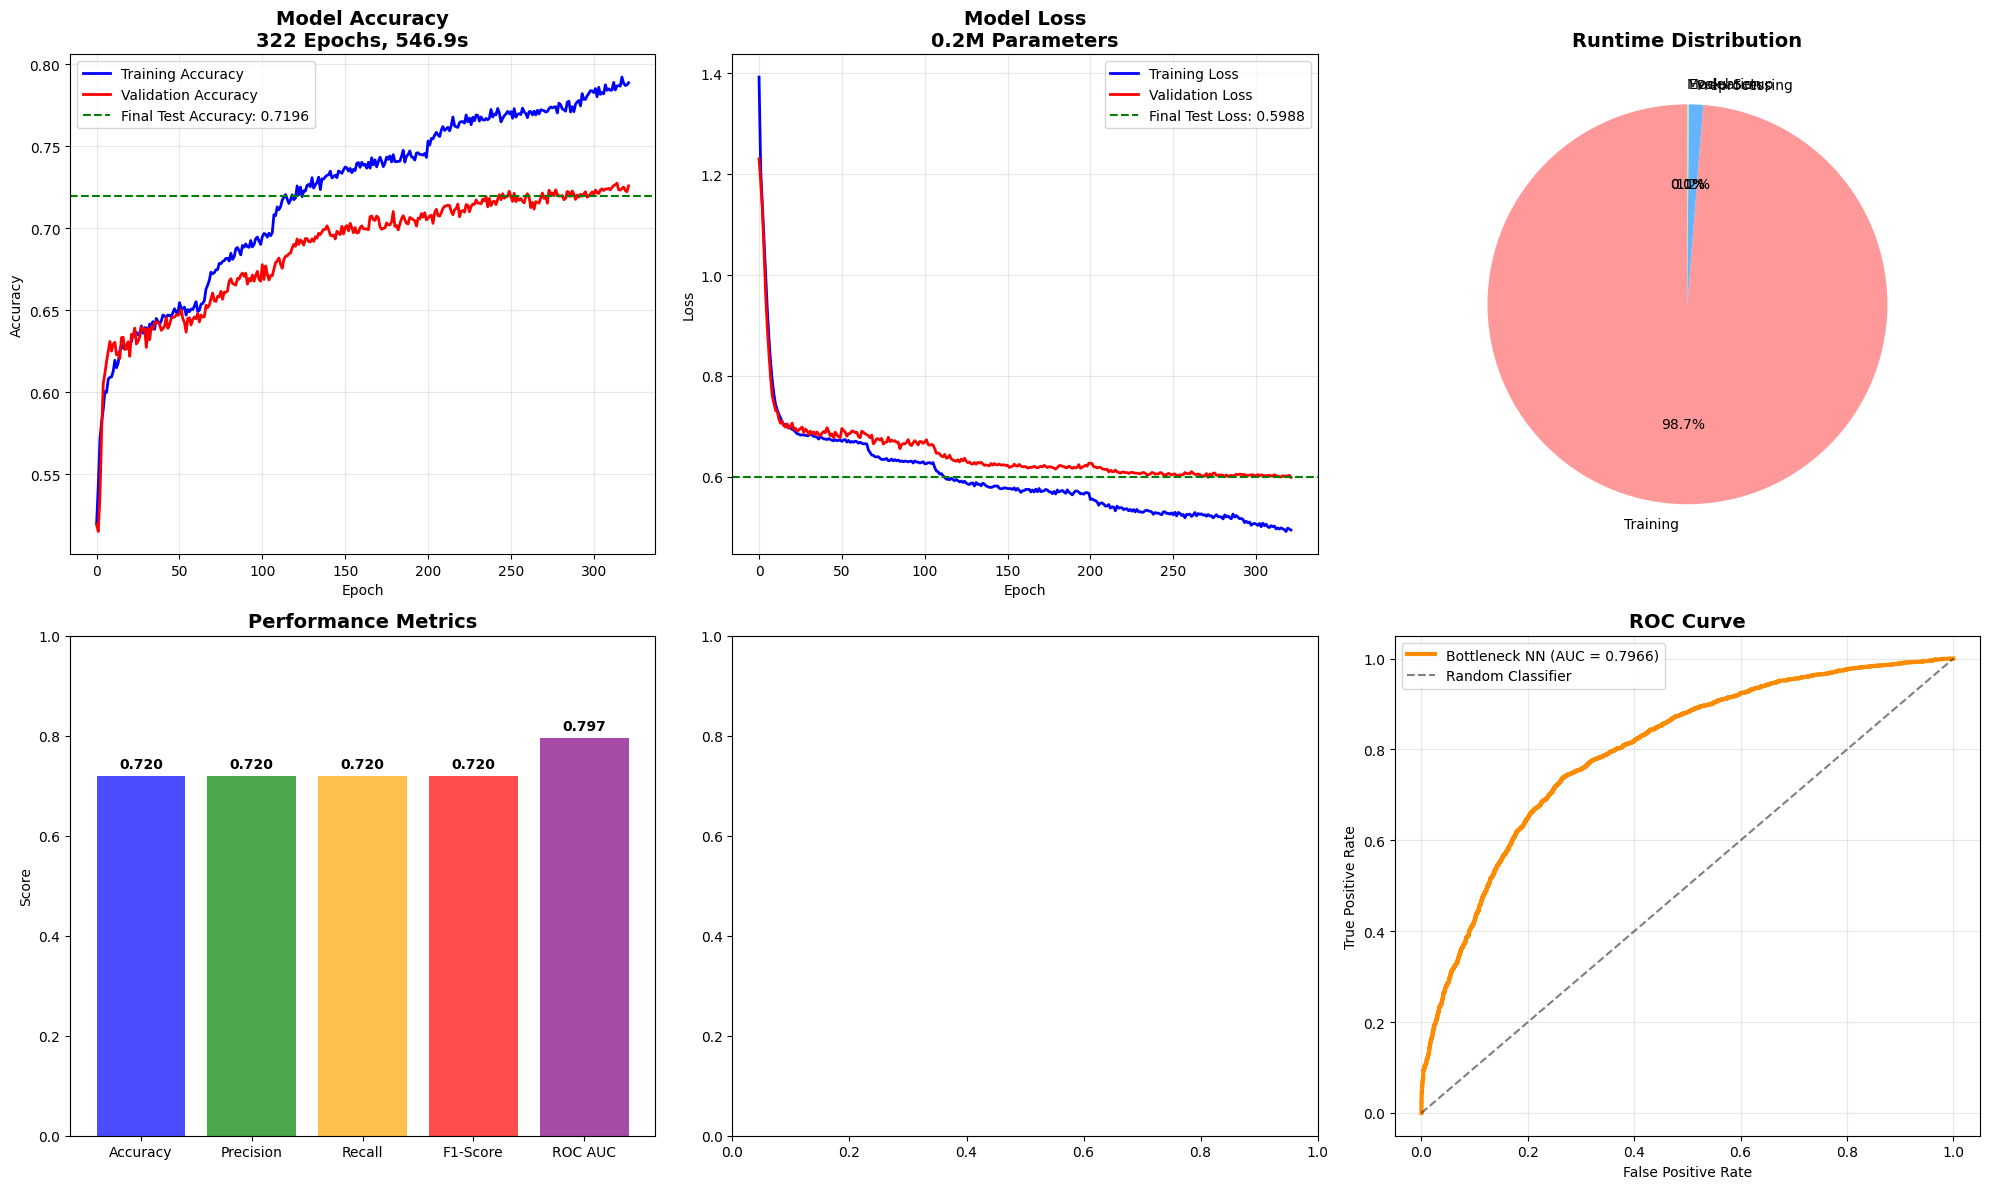

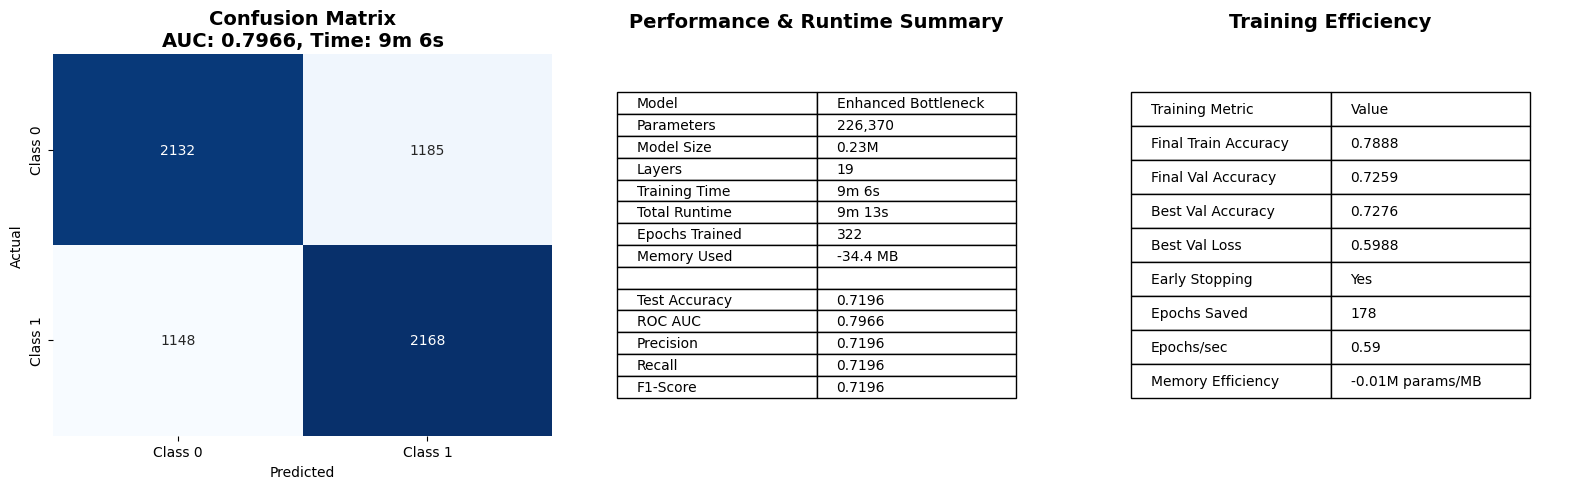


🏁 TRAINING COMPLETED SUCCESSFULLY!
   Enhanced Bottleneck: 0.23M parameters
   Achieved 0.7966 ROC AUC in 9m 6s
   Memory efficiency: -0.01M parameters per MB
   Training speed: 0.59 epochs/second


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
import time
import psutil
import os

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # Convert to MB

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)

    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()

    return X_selected, y_smote, selected_features, scaler, selector

# Start overall timer
overall_start_time = time.time()

# Preprocess data
preprocess_start = time.time()
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)
preprocess_time = time.time() - preprocess_start

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Enhanced Bottleneck Architecture with Early Stopping
def create_enhanced_bottleneck_early_stop(input_dim):
    """Bottleneck architecture with enhanced regularization"""
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),  # Bottleneck
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(2, activation='softmax')
    ])
    return model

# Model creation and compilation timing
model_create_start = time.time()
bottleneck_model = create_enhanced_bottleneck_early_stop(X_train.shape[1])
model_create_time = time.time() - model_create_start

# Print model architecture with detailed size information
print("\n" + "="*80)
print("ENHANCED BOTTLENECK ARCHITECTURE - SIZE AND RUNTIME ANALYSIS")
print("="*80)
print(f"Input shape: {X_train.shape[1]}")
print(f"Total layers: {len(bottleneck_model.layers)}")
print(f"Total parameters: {bottleneck_model.count_params():,}")
print(f"Model size: {bottleneck_model.count_params() / 1e6:.2f} Million parameters")
print(f"Model creation time: {model_create_time:.2f} seconds")

# Calculate memory footprint (approximate)
param_memory_mb = (bottleneck_model.count_params() * 4) / (1024 * 1024)  # 4 bytes per float32
print(f"Estimated parameter memory: {param_memory_mb:.2f} MB")

# Print layer details with parameter counts
print("\nLayer details (Parameters per layer):")
total_params_calculated = 0
for i, layer in enumerate(bottleneck_model.layers):
    layer_type = layer.__class__.__name__
    units = layer.units if hasattr(layer, 'units') else 'N/A'

    # Calculate parameters for this layer
    if hasattr(layer, 'units'):
        if i == 0:  # First layer
            layer_params = (X_train.shape[1] * units) + units  # weights + biases
        else:
            prev_units = bottleneck_model.layers[i-1].units if hasattr(bottleneck_model.layers[i-1], 'units') else X_train.shape[1]
            layer_params = (prev_units * units) + units  # weights + biases

        # Add BatchNormalization parameters (4 per unit: gamma, beta, moving_mean, moving_variance)
        if i < len(bottleneck_model.layers) - 1 and bottleneck_model.layers[i+1].__class__.__name__ == 'BatchNormalization':
            layer_params += units * 4

        total_params_calculated += layer_params
        print(f"  Layer {i+1}: {layer_type} - {units} units | ~{layer_params:,} parameters")
    else:
        print(f"  Layer {i+1}: {layer_type}")

print(f"\nTotal calculated parameters: {total_params_calculated:,}")
print("="*80)

# Enhanced training configuration with 500 epochs
epochs = 500
batch_size = 32

# Enhanced callbacks with early stopping
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=50,  # Increased patience for 500 epochs
        restore_best_weights=True,
        verbose=1,
        min_delta=0.0001
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20,  # Increased patience for learning rate reduction
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_bottleneck_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Compile model with appropriate optimizer
compile_start = time.time()
optimizer = Adam(learning_rate=0.0005)
bottleneck_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)
compile_time = time.time() - compile_start

print(f"\n🚀 STARTING TRAINING WITH 500 EPOCHS")
print(f"Early stopping patience: 50 epochs")
print(f"Learning rate reduction patience: 20 epochs")
print(f"Batch size: {batch_size}")
print(f"Model compilation time: {compile_time:.2f} seconds")
print(f"Memory usage before training: {get_memory_usage():.2f} MB")

# Start training timer
training_start_time = time.time()
memory_before_training = get_memory_usage()

# Train model with 500 epochs
history = bottleneck_model.fit(
    X_train, y_train_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_cat),
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

# Calculate training time and memory usage
training_time = time.time() - training_start_time
memory_after_training = get_memory_usage()
memory_used_during_training = memory_after_training - memory_before_training

minutes = int(training_time // 60)
seconds = int(training_time % 60)

print(f"\n✅ TRAINING COMPLETED")
print(f"Total training time: {minutes}m {seconds}s")
print(f"Actual epochs trained: {len(history.history['loss'])}")
print(f"Memory used during training: {memory_used_during_training:.2f} MB")
print(f"Final memory usage: {memory_after_training:.2f} MB")

# Evaluation timing
eval_start = time.time()
test_loss, test_accuracy, test_precision, test_recall = bottleneck_model.evaluate(X_test, y_test_cat, verbose=0)
eval_time = time.time() - eval_start

prediction_start = time.time()
y_pred_proba = bottleneck_model.predict(X_test)
prediction_time = time.time() - prediction_start

# Calculate additional metrics
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Calculate total runtime
total_runtime = time.time() - overall_start_time
total_minutes = int(total_runtime // 60)
total_seconds = int(total_runtime % 60)

# Print comprehensive results with runtime information
print("\n" + "="*90)
print("ENHANCED BOTTLENECK MODEL RESULTS - COMPREHENSIVE RUNTIME ANALYSIS")
print("="*90)
print(f"Model: Enhanced Bottleneck Architecture")
print(f"Parameters: {bottleneck_model.count_params():,}")
print(f"Model Size: {bottleneck_model.count_params() / 1e6:.2f} Million parameters")
print(f"Layers: {len(bottleneck_model.layers)}")
print(f"\n⏱️  RUNTIME BREAKDOWN:")
print(f"  Preprocessing time: {preprocess_time:.2f} seconds")
print(f"  Model creation time: {model_create_time:.2f} seconds")
print(f"  Model compilation time: {compile_time:.2f} seconds")
print(f"  Training time: {training_time:.2f} seconds ({minutes}m {seconds}s)")
print(f"  Evaluation time: {eval_time:.2f} seconds")
print(f"  Prediction time: {prediction_time:.2f} seconds")
print(f"  Total runtime: {total_runtime:.2f} seconds ({total_minutes}m {total_seconds}s)")
print(f"\n💾 MEMORY USAGE:")
print(f"  Memory used during training: {memory_used_during_training:.2f} MB")
print(f"  Final memory usage: {memory_after_training:.2f} MB")
print(f"\n📊 PERFORMANCE METRICS:")
print(f"  Test Accuracy: {test_accuracy:.4f}")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  ROC AUC: {roc_auc:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1-Score: {f1_score:.4f}")
print(f"\n📈 CLASS-WISE METRICS:")
print(f"  Class 0 - Precision: {report['0']['precision']:.4f}, Recall: {report['0']['recall']:.4f}, F1: {report['0']['f1-score']:.4f}")
print(f"  Class 1 - Precision: {report['1']['precision']:.4f}, Recall: {report['1']['recall']:.4f}, F1: {report['1']['f1-score']:.4f}")
print(f"\n⚡ EFFICIENCY METRICS:")
print(f"  Epochs per second: {len(history.history['loss']) / training_time:.2f}")
print(f"  Parameters processed per second: {(bottleneck_model.count_params() * len(history.history['loss'])) / training_time:,.0f}")
print(f"  AUC per million parameters: {roc_auc / (bottleneck_model.count_params() / 1e6):.4f}")
print("="*90)

# Plot comprehensive training history with runtime information
plt.figure(figsize=(20, 12))

# 1. Accuracy plot
plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='red')
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Final Test Accuracy: {test_accuracy:.4f}')
plt.title(f'Model Accuracy\n{len(history.history["loss"])} Epochs, {training_time:.1f}s', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Loss plot
plt.subplot(2, 3, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='red')
plt.axhline(y=test_loss, color='green', linestyle='--', label=f'Final Test Loss: {test_loss:.4f}')
plt.title(f'Model Loss\n{bottleneck_model.count_params()/1e6:.1f}M Parameters', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Runtime breakdown pie chart
plt.subplot(2, 3, 3)
runtime_components = {
    'Training': training_time,
    'Preprocessing': preprocess_time,
    'Evaluation': eval_time + prediction_time,
    'Model Setup': model_create_time + compile_time
}
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(runtime_components.values(), labels=runtime_components.keys(), autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Runtime Distribution', fontsize=14, fontweight='bold')

# 4. Performance metrics bar chart
plt.subplot(2, 3, 4)
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
metrics_values = [test_accuracy, test_precision, test_recall, f1_score, roc_auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']
bars = plt.bar(metrics_names, metrics_values, color=colors, alpha=0.7)
plt.title('Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{value:.3f}',
             ha='center', va='bottom', fontweight='bold')

# 5. Learning rate plot
plt.subplot(2, 3, 5)
if 'lr' in history.history:
    plt.plot(history.history['lr'], linewidth=2, color='purple')
    plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)

# 6. ROC Curve
plt.subplot(2, 3, 6)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, linewidth=3, label=f'Bottleneck NN (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced Confusion Matrix with runtime info
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix\nAUC: {roc_auc:.4f}, Time: {minutes}m {seconds}s', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Enhanced Performance Summary Table
plt.subplot(1, 3, 2)
plt.axis('off')
performance_data = [
    ["Model", "Enhanced Bottleneck"],
    ["Parameters", f"{bottleneck_model.count_params():,}"],
    ["Model Size", f"{bottleneck_model.count_params()/1e6:.2f}M"],
    ["Layers", len(bottleneck_model.layers)],
    ["Training Time", f"{minutes}m {seconds}s"],
    ["Total Runtime", f"{total_minutes}m {total_seconds}s"],
    ["Epochs Trained", len(history.history['loss'])],
    ["Memory Used", f"{memory_used_during_training:.1f} MB"],
    ["", ""],
    ["Test Accuracy", f"{test_accuracy:.4f}"],
    ["ROC AUC", f"{roc_auc:.4f}"],
    ["Precision", f"{test_precision:.4f}"],
    ["Recall", f"{test_recall:.4f}"],
    ["F1-Score", f"{f1_score:.4f}"]
]

table = plt.table(cellText=performance_data,
                 cellLoc='left',
                 loc='center',
                 bbox=[0.1, 0.1, 0.8, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)
plt.title('Performance & Runtime Summary', fontsize=14, fontweight='bold', pad=20)

# Training History Summary with Efficiency
plt.subplot(1, 3, 3)
plt.axis('off')
training_stats = [
    ["Training Metric", "Value"],
    ["Final Train Accuracy", f"{history.history['accuracy'][-1]:.4f}"],
    ["Final Val Accuracy", f"{history.history['val_accuracy'][-1]:.4f}"],
    ["Best Val Accuracy", f"{max(history.history['val_accuracy']):.4f}"],
    ["Best Val Loss", f"{min(history.history['val_loss']):.4f}"],
    ["Early Stopping", "Yes" if len(history.history['loss']) < epochs else "No"],
    ["Epochs Saved", f"{epochs - len(history.history['loss'])}" if len(history.history['loss']) < epochs else "0"],
    ["Epochs/sec", f"{len(history.history['loss']) / training_time:.2f}"],
    ["Memory Efficiency", f"{bottleneck_model.count_params() / 1e6 / memory_used_during_training:.2f}M params/MB"]
]

table2 = plt.table(cellText=training_stats,
                  cellLoc='left',
                  loc='center',
                  bbox=[0.1, 0.1, 0.8, 0.8])
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.scale(1, 1.8)
plt.title('Training Efficiency', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Final comprehensive summary
print(f"\n🏁 TRAINING COMPLETED SUCCESSFULLY!")
print(f"   Enhanced Bottleneck: {bottleneck_model.count_params()/1e6:.2f}M parameters")
print(f"   Achieved {roc_auc:.4f} ROC AUC in {minutes}m {seconds}s")
print(f"   Memory efficiency: {bottleneck_model.count_params() / 1e6 / memory_used_during_training:.2f}M parameters per MB")
print(f"   Training speed: {len(history.history['loss']) / training_time:.2f} epochs/second")

# bottleneck per layer number of neurons increase kore network wider kora

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
import time
import psutil
import os

print("TensorFlow Version:", tf.__version__)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Function to get memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # Convert to MB

# Start overall timer
overall_start_time = time.time()

# Load dataset
# df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Preprocessing pipeline (same as shallow)
def preprocess_data(df):
    """Preprocess the dataset"""
    df_cleaned = df.copy()
    X = df_cleaned.drop(columns=["classification"])
    y = df_cleaned["classification"]

    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_scaled, y)

    # Feature Selection with RandomForest
    rf_selector = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_selector.fit(X_smote, y_smote)
    selector = SelectFromModel(rf_selector, threshold="median", prefit=True)
    X_selected = selector.transform(X_smote)
    selected_features = X.columns[selector.get_support()].tolist()

    return X_selected, y_smote, selected_features, scaler, selector

# Preprocess data with timing
preprocess_start = time.time()
X_processed, y_processed, selected_features, scaler, selector = preprocess_data(df)
preprocess_time = time.time() - preprocess_start

print("Selected Features:", selected_features)
print("Processed data shape:", X_processed.shape)
print(f"Preprocessing time: {preprocess_time:.2f} seconds")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

# Convert to categorical for neural network
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Enhanced Wider Bottleneck Architectures
def create_wider_bottleneck_v1(input_dim):
    """Wider bottleneck architecture with significantly increased neurons"""
    model = Sequential([
        # Encoder - Much wider
        Dense(2048, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Bottleneck - Wider compression
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu', name='bottleneck'),  # Wider bottleneck
        BatchNormalization(),
        Dropout(0.3),

        # Decoder - Much wider expansion
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        Dropout(0.2),

        Dense(2, activation='softmax')
    ])
    return model

def create_wider_bottleneck_v2(input_dim):
    """Even wider architecture with massive layers"""
    model = Sequential([
        # Massive encoder
        Dense(4096, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.002)),
        BatchNormalization(),
        Dropout(0.7),

        Dense(2048, activation='relu', kernel_regularizer=l2(0.002)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Wide bottleneck
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(512, activation='relu', name='wide_bottleneck'),  # Very wide bottleneck
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Massive decoder
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(2048, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        Dropout(0.2),

        Dense(128, activation='relu'),
        Dropout(0.1),

        Dense(2, activation='softmax')
    ])
    return model

def create_wider_bottleneck_v3(input_dim):
    """Extremely wide architecture with gradual compression/expansion"""
    model = Sequential([
        # Extremely wide input
        Dense(3072, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(2048, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1536, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(768, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Wide bottleneck section
        Dense(512, activation='relu', name='bottleneck_1'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(384, activation='relu', name='bottleneck_2'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu', name='bottleneck_3'),
        BatchNormalization(),
        Dropout(0.3),

        # Expansion back
        Dense(384, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(768, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(768, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(512, activation='relu'),
        Dropout(0.2),

        Dense(256, activation='relu'),
        Dropout(0.2),

        Dense(128, activation='relu'),
        Dropout(0.1),

        Dense(2, activation='softmax')
    ])
    return model

# Create wider bottleneck models with timing
model_creation_times = {}
wider_models = {}

model_creation_start = time.time()
wider_models['Wider_Bottleneck_11L'] = create_wider_bottleneck_v1(X_train.shape[1])
model_creation_times['Wider_Bottleneck_11L'] = time.time() - model_creation_start

model_creation_start = time.time()
wider_models['Massive_Bottleneck_16L'] = create_wider_bottleneck_v2(X_train.shape[1])
model_creation_times['Massive_Bottleneck_16L'] = time.time() - model_creation_start

model_creation_start = time.time()
wider_models['Extreme_Bottleneck_18L'] = create_wider_bottleneck_v3(X_train.shape[1])
model_creation_times['Extreme_Bottleneck_18L'] = time.time() - model_creation_start

# Print model architectures and sizes with detailed runtime information
print("\n" + "="*90)
print("WIDER BOTTLENECK ARCHITECTURES - COMPREHENSIVE SIZE & RUNTIME ANALYSIS")
print("="*90)

for name, model in wider_models.items():
    model.build((None, X_train.shape[1]))
    total_params = model.count_params()
    model_size_mb = (total_params * 4) / (1024 * 1024)  # 4 bytes per float32 parameter

    print(f"\n{name}:")
    print(f"  Total layers: {len(model.layers)}")
    print(f"  Total parameters: {total_params:,}")
    print(f"  Model size: {total_params / 1e6:.2f} Million parameters")
    print(f"  Memory footprint: {model_size_mb:.2f} MB")
    print(f"  Model creation time: {model_creation_times[name]:.3f} seconds")

    # Print layer details with parameter estimates
    print(f"\n  Layer details:")
    total_calculated_params = 0
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'units'):
            # Calculate parameters for this layer
            if i == 0:  # First layer
                layer_params = (X_train.shape[1] * layer.units) + layer.units  # weights + biases
            else:
                prev_layer = model.layers[i-1]
                prev_units = prev_layer.units if hasattr(prev_layer, 'units') else X_train.shape[1]
                layer_params = (prev_units * layer.units) + layer.units  # weights + biases

            # Add BatchNormalization parameters if next layer is BatchNorm
            if i < len(model.layers) - 1 and model.layers[i+1].__class__.__name__ == 'BatchNormalization':
                layer_params += layer.units * 4  # gamma, beta, moving_mean, moving_variance

            total_calculated_params += layer_params
            print(f"    Layer {i+1}: {layer.__class__.__name__} - {layer.units:,} neurons | ~{layer_params:,} params")
        else:
            print(f"    Layer {i+1}: {layer.__class__.__name__}")

    print(f"  Total calculated parameters: {total_calculated_params:,}")
    print("-" * 70)

# Training configuration
epochs = 200
batch_size = 32

# Enhanced callbacks for wider networks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-7, verbose=1),
]

# Train and evaluate wider models with comprehensive timing
results_wider = []

plt.figure(figsize=(18, 12))

for i, (name, model) in enumerate(wider_models.items()):
    print(f"\n{'='*90}")
    print(f"🚀 TRAINING {name}")
    print(f"   Model Parameters: {model.count_params():,}")
    print(f"   Model Size: {model.count_params()/1e6:.2f}M")
    print(f"   Total Layers: {len(model.layers)}")
    print(f"{'='*90}")

    # Adjust optimizer based on model size
    if 'Massive' in name or 'Extreme' in name:
        optimizer = Adam(learning_rate=0.0003)
        current_batch_size = 24  # Smaller batch size for very large models
    else:
        optimizer = Adam(learning_rate=0.0005)
        current_batch_size = batch_size

    # Compile model with timing
    compile_start = time.time()
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    compile_time = time.time() - compile_start

    # Memory usage before training
    memory_before = get_memory_usage()

    # Start training timer
    start_time = time.time()

    # Train model
    history = model.fit(
        X_train, y_train_cat,
        epochs=epochs,
        batch_size=current_batch_size,
        validation_data=(X_test, y_test_cat),
        callbacks=callbacks,
        verbose=1
    )

    # End timing and memory measurement
    training_time = time.time() - start_time
    memory_after = get_memory_usage()
    memory_used = memory_after - memory_before

    minutes = int(training_time // 60)
    seconds = int(training_time % 60)

    # Evaluation timing
    eval_start = time.time()
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    eval_time = time.time() - eval_start

    # Prediction timing
    pred_start = time.time()
    y_pred_proba = model.predict(X_test, verbose=0)
    pred_time = time.time() - pred_start
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    report = classification_report(y_test, y_pred, output_dict=True)

    # Calculate efficiency metrics
    epochs_trained = len(history.history['loss'])
    epochs_per_second = epochs_trained / training_time
    params_per_second = (model.count_params() * epochs_trained) / training_time

    # Store comprehensive results
    results_wider.append({
        'Model': name,
        'Parameters': model.count_params(),
        'Model_Size_M': model.count_params() / 1e6,
        'Layers': len(model.layers),
        'Model_Creation_Time': model_creation_times[name],
        'Compile_Time': compile_time,
        'Training_Time_Seconds': training_time,
        'Training_Time_Formatted': f"{minutes}m {seconds}s",
        'Evaluation_Time': eval_time,
        'Prediction_Time': pred_time,
        'Memory_Used_MB': memory_used,
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss,
        'ROC_AUC': roc_auc,
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Training_Epochs': epochs_trained,
        'Epochs_Per_Second': epochs_per_second,
        'Params_Per_Second': params_per_second,
        'Efficiency_Score': roc_auc / (model.count_params() / 1e6)  # AUC per million parameters
    })

    # Print runtime summary for this model
    print(f"\n⏱️  RUNTIME SUMMARY for {name}:")
    print(f"   Model creation: {model_creation_times[name]:.3f}s")
    print(f"   Compilation: {compile_time:.3f}s")
    print(f"   Training: {training_time:.2f}s ({minutes}m {seconds}s)")
    print(f"   Evaluation: {eval_time:.3f}s")
    print(f"   Prediction: {pred_time:.3f}s")
    print(f"   Memory used: {memory_used:.2f} MB")
    print(f"   Epochs/second: {epochs_per_second:.2f}")
    print(f"   Parameters/second: {params_per_second:,.0f}")

    # Plot training history
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.plot(history.history['loss'], label='Training Loss', linestyle='--', alpha=0.7)
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', alpha=0.7)
    plt.title(f'{name}\n{model.count_params()/1e6:.1f}M Params | {minutes}m {seconds}s\nAcc: {test_accuracy:.3f} | AUC: {roc_auc:.3f}', fontsize=10)
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate total runtime
total_runtime = time.time() - overall_start_time
total_minutes = int(total_runtime // 60)
total_seconds = int(total_runtime % 60)

# Results analysis
results_df_wider = pd.DataFrame(results_wider)
print("\n" + "="*100)
print("WIDER BOTTLENECK MODELS - COMPREHENSIVE RESULTS WITH RUNTIME ANALYSIS")
print("="*100)

# Print detailed results table
detailed_cols = ['Model', 'Model_Size_M', 'Layers', 'Training_Time_Formatted', 'Training_Epochs',
                'Test_Accuracy', 'ROC_AUC', 'F1_0', 'F1_1', 'Epochs_Per_Second', 'Efficiency_Score']
print(results_df_wider[detailed_cols].round(3))

# Best wider model
best_wider = results_df_wider.loc[results_df_wider['ROC_AUC'].idxmax()]
print(f"\n🎯 BEST WIDER BOTTLENECK MODEL: {best_wider['Model']}")
print(f"   ROC AUC: {best_wider['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_wider['Test_Accuracy']:.3f}")
print(f"   Model Size: {best_wider['Model_Size_M']:.2f}M parameters")
print(f"   Training Time: {best_wider['Training_Time_Formatted']}")
print(f"   Efficiency: {best_wider['Efficiency_Score']:.4f} AUC per million parameters")
print(f"   Epochs/second: {best_wider['Epochs_Per_Second']:.2f}")

# Print overall runtime summary
print(f"\n📊 OVERALL RUNTIME SUMMARY:")
print(f"   Total execution time: {total_minutes}m {total_seconds}s")
print(f"   Preprocessing time: {preprocess_time:.2f}s")
print(f"   Total training time (all models): {results_df_wider['Training_Time_Seconds'].sum():.2f}s")

# Comprehensive comparison plots with runtime info
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC Curves
colors = ['blue', 'red', 'green']
for i, (name, model) in enumerate(wider_models.items()):
    y_pred_proba = model.predict(X_test, verbose=0)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
    axes[0, 0].plot(fpr, tpr, linewidth=2, color=colors[i],
                   label=f'{name} (AUC = {auc_score:.3f})')

axes[0, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curves - Wider Bottleneck NNs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Model Size vs Performance with Runtime
scatter = axes[0, 1].scatter(results_df_wider['Model_Size_M'], results_df_wider['ROC_AUC'],
                  s=results_df_wider['Training_Time_Seconds']/10,
                  c=results_df_wider['Efficiency_Score'], cmap='viridis', alpha=0.7)
for i, row in results_df_wider.iterrows():
    axes[0, 1].annotate(f"{row['Model']}\n{row['Training_Time_Formatted']}",
                       (row['Model_Size_M'], row['ROC_AUC']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0, 1].set_xlabel('Model Size (Million Parameters)')
axes[0, 1].set_ylabel('ROC AUC')
axes[0, 1].set_title('Model Size vs Performance\n(Size = Training Time, Color = Efficiency)')
plt.colorbar(scatter, ax=axes[0, 1], label='Efficiency (AUC per M params)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Runtime breakdown
runtime_components = ['Model_Creation_Time', 'Compile_Time', 'Training_Time_Seconds',
                     'Evaluation_Time', 'Prediction_Time']
runtime_data = results_df_wider[['Model'] + runtime_components]

x = np.arange(len(results_df_wider))
width = 0.15
bottom = np.zeros(len(results_df_wider))

for j, component in enumerate(runtime_components):
    values = results_df_wider[component].values
    axes[1, 0].bar(x + j*width, values, width, label=component.replace('_', ' '), bottom=bottom)
    bottom += values

axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('Time (Seconds)')
axes[1, 0].set_title('Runtime Breakdown by Component')
axes[1, 0].set_xticks(x + width*2)
axes[1, 0].set_xticklabels(results_df_wider['Model'], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Efficiency Analysis
efficiency_metrics = ['Epochs_Per_Second', 'Efficiency_Score']
x = np.arange(len(results_df_wider))
width = 0.35

for j, metric in enumerate(efficiency_metrics):
    values = results_df_wider[metric].values
    axes[1, 1].bar(x + j*width, values, width, label=metric.replace('_', ' '))

axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Efficiency Metrics Comparison')
axes[1, 1].set_xticks(x + width/2)
axes[1, 1].set_xticklabels(results_df_wider['Model'], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Enhanced Confusion Matrix with runtime info
best_wider_model_name = best_wider['Model']
best_wider_model = wider_models[best_wider_model_name]
y_pred_best_wider = np.argmax(best_wider_model.predict(X_test, verbose=0), axis=1)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best_wider)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_wider_model_name}\nAUC: {best_wider["ROC_AUC"]:.3f}', fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Enhanced Performance Summary Table with Runtime
plt.subplot(1, 3, 2)
plt.axis('off')
performance_data = [
    ["Model", best_wider['Model']],
    ["Parameters", f"{best_wider['Parameters']:,}"],
    ["Model Size", f"{best_wider['Model_Size_M']:.2f}M"],
    ["Layers", best_wider['Layers']],
    ["Training Time", best_wider['Training_Time_Formatted']],
    ["Epochs Trained", best_wider['Training_Epochs']],
    ["Epochs/sec", f"{best_wider['Epochs_Per_Second']:.2f}"],
    ["Memory Used", f"{best_wider['Memory_Used_MB']:.1f} MB"],
    ["", ""],
    ["Test Accuracy", f"{best_wider['Test_Accuracy']:.3f}"],
    ["ROC AUC", f"{best_wider['ROC_AUC']:.3f}"],
    ["F1 Score Class 0", f"{best_wider['F1_0']:.3f}"],
    ["F1 Score Class 1", f"{best_wider['F1_1']:.3f}"],
    ["Efficiency", f"{best_wider['Efficiency_Score']:.4f}"]
]

table = plt.table(cellText=performance_data,
                 cellLoc='left',
                 loc='center',
                 bbox=[0.1, 0.1, 0.8, 0.8])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.8)
plt.title('Best Model: Performance & Runtime', fontsize=14, pad=20)

# Runtime Comparison
plt.subplot(1, 3, 3)
models = results_df_wider['Model']
training_times = results_df_wider['Training_Time_Seconds']
efficiency = results_df_wider['Efficiency_Score']

bars = plt.bar(models, training_times, color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
plt.title('Training Time Comparison', fontsize=12)
plt.ylabel('Training Time (Seconds)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels and efficiency scores
for bar, time_val, eff in zip(bars, training_times, efficiency):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{time_val:.0f}s\nEff: {eff:.3f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Final comprehensive summary
print(f"\n🏁 WIDER BOTTLENECK TRAINING COMPLETED!")
print(f"   Total execution: {total_minutes}m {total_seconds}s")
print(f"   Best model: {best_wider['Model']} ({best_wider['Model_Size_M']:.1f}M params)")
print(f"   Best AUC: {best_wider['ROC_AUC']:.4f} in {best_wider['Training_Time_Formatted']}")
print(f"   Best efficiency: {best_wider['Efficiency_Score']:.4f} AUC per million parameters")

TensorFlow Version: 2.10.1
Selected Features: ['blood pressure', 'specific gravity', 'albumin', 'sugar', 'blood glucose random', 'blood urea', 'sodium', 'potassium', 'hemoglobin', 'packed cell volume', 'white blood cell count', 'red blood cell count']
Processed data shape: (33164, 12)
Preprocessing time: 5.74 seconds
Training set: (26531, 12), Test set: (6633, 12)

WIDER BOTTLENECK ARCHITECTURES - COMPREHENSIVE SIZE & RUNTIME ANALYSIS

Wider_Bottleneck_11L:
  Total layers: 30
  Total parameters: 4,185,474
  Model size: 4.19 Million parameters
  Memory footprint: 15.97 MB
  Model creation time: 2.834 seconds

  Layer details:
    Layer 1: Dense - 2,048 neurons | ~34,816 params
    Layer 2: BatchNormalization
    Layer 3: Dropout
    Layer 4: Dense - 1,024 neurons | ~17,408 params
    Layer 5: BatchNormalization
    Layer 6: Dropout
    Layer 7: Dense - 512 neurons | ~8,704 params
    Layer 8: BatchNormalization
    Layer 9: Dropout
    Layer 10: Dense - 256 neurons | ~4,352 params
    L